#### Import 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.nonparametric.kde import KDEUnivariate
import plotly.figure_factory as ff

sns.set_theme(style="darkgrid")

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import data

In [5]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [6]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1M_School closing  C1M_Flag  C2M_Workplace closing  C2M_Flag  \
0                 0.0       NaN                    0.0       NaN   
1                 0.0       NaN                    0.0       NaN   
2                 0.0       NaN                    0.0       NaN   
3                 0.0       NaN                    0.0       NaN   
4                 0.0       NaN                    0.0       NaN   

   C3M_Cancel public events  C3M_Flag  C4M_Restrictions on gatherings  \
0                       0.0       NaN                             0.0   
1                       0.0       NaN                             0.0   
2                       0.0       NaN                             0.0   
3                       0.0       NaN                             0.0   
4                       0.0       NaN                             0.0   

   C4M_Flag  C5M_Close public transport  C5M_Flag  \
0       NaN                         0.0       NaN   
1       NaN                         0.0       NaN   
2       NaN                         0.0       NaN   
3       NaN                         0.0       NaN   
4       NaN                         0.0       NaN   

   C6M_Stay at home requirements  C6M_Flag  \
0                            0.0       NaN   
1                            0.0       NaN   
2                            0.0       NaN   
3                            0.0       NaN   
4                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       N

##### View the output of df.head() in a tabular format.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryName' is dropped to avoid redundancy.



#### Converting 'Date' to datetime.

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [9]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Additional Data from OWID

In [10]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
owid = pd.read_csv(url)


In [11]:
owid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         0.0                  NaN   
1                 NaN           NaN         0.0                  NaN   
2                 NaN           NaN         0.0                  NaN   
3                 NaN           NaN         0.0                  NaN   
4                 NaN           NaN         0.0                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    0.0   
1                      NaN                    0.0   
2                      NaN                    0.0   
3                      NaN                    0.0   
4                      NaN                    0.0   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     0.0                              NaN                NaN   
1                     0.0                              NaN                NaN   
2                     0.0                              NaN                NaN   
3                     0.0                              NaN                NaN   
4                     0.0                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN                 NaN   

   new_tests_smoothed_per_

In [12]:
owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390760 entries, 0 to 390759
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    390760 non-null  object 
 1   continent                                   372041 non-null  object 
 2   location                                    390760 non-null  object 
 3   date                                        390760 non-null  object 
 4   total_cases                                 351749 non-null  float64
 5   new_cases                                   379668 non-null  float64
 6   new_cases_smoothed                          378438 non-null  float64
 7   total_deaths                                329441 non-null  float64
 8   new_deaths                                  379991 non-null  float64
 9   new_deaths_smoothed                         378761 non-null  float64
 

In [13]:
countries = df['CountryCode'].unique()
print("Number of countries in the dataset: ", len(countries))

countriesOWID = owid['iso_code'].unique()
print("Number of countries in owid dataset: ", len(countriesOWID))

Number of countries in the dataset:  185
Number of countries in owid dataset:  255


In [14]:
countriesWithOwidData = np.intersect1d(countries, countriesOWID)
# missing_countries = np.setdiff1d(countries, countriesWithOwidData)
# print(missing_countries)

In [15]:
df = df[df['CountryCode'].isin(countriesWithOwidData)]
df['CountryCode'].nunique()

184

In [16]:
df.shape

(201664, 53)

### Adding selected columns from owid dataset to a temporary dataset

In [17]:
owid['date'] = pd.to_datetime(owid['date'], format='%Y-%m-%d')

additional_data = owid[owid['iso_code'].isin(countriesWithOwidData) & 
                    (owid['date'] >= start_date) & 
                    (owid['date'] <= end_date)][['iso_code', 'date', 'population', 'gdp_per_capita', 'life_expectancy', 'hospital_beds_per_thousand']]

In [18]:
additional_data.isna().sum()

iso_code                          0
date                              0
population                        0
gdp_per_capita                12001
life_expectancy                   0
hospital_beds_per_thousand    29047
dtype: int64

In [19]:
additional_data.nunique()

iso_code                       184
date                          1096
population                     184
gdp_per_capita                 173
life_expectancy                175
hospital_beds_per_thousand      97
dtype: int64

In [20]:
num_unique_values = additional_data.groupby('iso_code')['gdp_per_capita'].nunique()
countriesWithNoGDP = num_unique_values[num_unique_values < 1].index
countriesWithNoGDP

Index(['AND', 'CUB', 'FRO', 'GRL', 'GUM', 'LIE', 'MCO', 'SOM', 'SYR', 'TWN',
       'VIR'],
      dtype='object', name='iso_code')

In [21]:
additional_data = additional_data[~additional_data['iso_code'].isin(countriesWithNoGDP)]
additional_data.isna().sum()

iso_code                          0
date                              0
population                        0
gdp_per_capita                    0
life_expectancy                   0
hospital_beds_per_thousand    22506
dtype: int64

In [22]:
num_unique_values = additional_data.groupby('iso_code')['hospital_beds_per_thousand'].nunique()
countriesWithNoBeds = num_unique_values[num_unique_values < 1].index
countriesWithNoBeds

Index(['ABW', 'AGO', 'BMU', 'CIV', 'COD', 'COG', 'HKG', 'LSO', 'MAC', 'MRT',
       'NAM', 'NGA', 'PNG', 'PRI', 'PSE', 'RWA', 'SEN', 'SLE', 'SSD', 'TCD',
       'VUT'],
      dtype='object', name='iso_code')

#### 21 Countries have missing values for hosiptal beds per thousand

In [23]:
additional_data = additional_data[~additional_data['iso_code'].isin(countriesWithNoBeds)]
additional_data.isna().sum()

iso_code                      0
date                          0
population                    0
gdp_per_capita                0
life_expectancy               0
hospital_beds_per_thousand    0
dtype: int64

In [24]:
df = df.merge(additional_data, left_on=['CountryCode', 'Date'], right_on=['iso_code','date'], how='outer')

In [25]:
df.head()

CountryCode Jurisdiction       Date  C1M_School closing  C1M_Flag  \
0         ABW    NAT_TOTAL 2020-01-01                 0.0       NaN   
1         ABW    NAT_TOTAL 2020-01-02                 0.0       NaN   
2         ABW    NAT_TOTAL 2020-01-03                 0.0       NaN   
3         ABW    NAT_TOTAL 2020-01-04                 0.0       NaN   
4         ABW    NAT_TOTAL 2020-01-05                 0.0       NaN   

   C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                    0.0       NaN                       0.0       NaN   
1                    0.0       NaN                       0.0       NaN   
2                    0.0       NaN                       0.0       NaN   
3                    0.0       NaN                       0.0       NaN   
4                    0.0       NaN                       0.0       NaN   

   C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                             0.0       NaN                         0.0   
1                             0.0       NaN                         0.0   
2                             0.0       NaN                         0.0   
3                             0.0       NaN                         0.0   
4                             0.0       NaN                         0.0   

   C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0       NaN                            0.0       NaN   
1       NaN                            0.0       NaN   
2       NaN                            0.0       NaN   
3       NaN                            0.0       NaN   
4       NaN                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       NaN   
1                        0.0                   0.0       NaN   
2                        0.0                   0.0       NaN   
3                        0.0                   0.0       NaN   
4                        0.0               

In [26]:
population_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['population'].first().to_dict()
gdp_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['gdp_per_capita'].first().to_dict()
Bed_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['hospital_beds_per_thousand'].first().to_dict()
Expentancy_values = df.loc[df['Date'] == pd.Timestamp('2020-01-05')].groupby('CountryCode')['life_expectancy'].first().to_dict()

column_values = {
    'population': population_values,
    'gdp_per_capita': gdp_values,
    'life_expectancy' : Expentancy_values,
    'hospital_beds_per_thousand' : Bed_values
}

mask = (df['Date'] < pd.Timestamp('2020-01-05'))

for column, values in column_values.items():
    df.loc[mask, column] = df.loc[mask, 'CountryCode'].map(values)

In [27]:
df.head()

CountryCode Jurisdiction       Date  C1M_School closing  C1M_Flag  \
0         ABW    NAT_TOTAL 2020-01-01                 0.0       NaN   
1         ABW    NAT_TOTAL 2020-01-02                 0.0       NaN   
2         ABW    NAT_TOTAL 2020-01-03                 0.0       NaN   
3         ABW    NAT_TOTAL 2020-01-04                 0.0       NaN   
4         ABW    NAT_TOTAL 2020-01-05                 0.0       NaN   

   C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                    0.0       NaN                       0.0       NaN   
1                    0.0       NaN                       0.0       NaN   
2                    0.0       NaN                       0.0       NaN   
3                    0.0       NaN                       0.0       NaN   
4                    0.0       NaN                       0.0       NaN   

   C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                             0.0       NaN                         0.0   
1                             0.0       NaN                         0.0   
2                             0.0       NaN                         0.0   
3                             0.0       NaN                         0.0   
4                             0.0       NaN                         0.0   

   C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0       NaN                            0.0       NaN   
1       NaN                            0.0       NaN   
2       NaN                            0.0       NaN   
3       NaN                            0.0       NaN   
4       NaN                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       NaN   
1                        0.0                   0.0       NaN   
2                        0.0                   0.0       NaN   
3                        0.0                   0.0       NaN   
4                        0.0               

In [28]:
df.shape

(201664, 59)

In [29]:
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': CountryCode
 ABW    1096
 OMN    1096
 MYS    1096
 NAM    1096
 NER    1096
        ... 
 GIN    1096
 GMB    1096
 GRC    1096
 GRL    1096
 ZWE    1096
 Name: count, Length: 184, dtype: int64,
 'Jurisdiction': Jurisdiction
 NAT_TOTAL    201664
 Name: count, dtype: int64,
 'C1M_School closing': C1M_School closing
 0.0    74426
 1.0    55439
 3.0    41060
 2.0    30739
 Name: count, dtype: int64,
 'C1M_Flag': C1M_Flag
 1.0    106116
 NaN     74426
 0.0     21122
 Name: count, dtype: int64,
 'C2M_Workplace closing': C2M_Workplace closing
 0.0    68862
 2.0    63829
 1.0    51701
 3.0    17272
 Name: count, dtype: int64,
 'C2M_Flag': C2M_Flag
 1.0    105720
 NaN     68862
 0.0     27082
 Name: count, dtype: int64,
 'C3M_Cancel public events': C3M_Cancel public events
 2.0    84447
 0.0    64114
 1.0    53103
 Name: count, dtype: int64,
 'C3M_Flag': C3M_Flag
 1.0    117991
 NaN     64114
 0.0     19559
 Name: count, dtype: int64,
 'C4M_Restrictions on gatherings': C4M_Res


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [30]:
df = df.drop(columns=['Jurisdiction','iso_code','date'])
print(df.shape)

(201664, 56)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')


### Renaming columns

In [32]:

df.columns = [col.split('_')[0] if ' ' in col else col for col in df.columns]
df = df.rename(columns={'population': 'Population', 'gdp_per_capita':'GDP_Per_Capita', 'life_expectancy':'Life_Expectancy', 'hospital_beds_per_thousand':'Hospital_Beds_Per_Thousand'})
df.head(1)

CountryCode       Date  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  C4M  \
0         ABW 2020-01-01  0.0       NaN  0.0       NaN  0.0       NaN  0.0   

   C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  E1_Flag  \
0       NaN  0.0       NaN  0.0       NaN  0.0       NaN   0.0  0.0      NaN   

    E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  H6M_Flag   H7  \
0  0.0  0.0  0.0  0.0      NaN  0.0  0.0  0.0  0.0  0.0       NaN  0.0   

   H7_Flag  H8M  H8M_Flag  V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G  \
0      NaN  0.0       NaN   0    0  NaN  NaN  NaN            NaN  NaN  NaN   

   V3  V4  ConfirmedCases  ConfirmedDeaths MajorityVaccinated  \
0   0 NaN             0.0              0.0                 NV   

   PopulationVaccinated  StringencyIndex_Average  \
0                   0.0                      0.0   

   GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
0                              0.0                             0.0   

   EconomicSupportIndex  Population  GDP_Per_Capita  Life_Expectancy  \
0                   0.0         NaN             NaN              NaN   

   Hospital_Beds_Per_Thousand  
0                         NaN

In [33]:
df.shape

(201664, 56)

In [34]:
df.dtypes

CountryCode                              category
Date                               datetime64[ns]
C1M                                       float64
C1M_Flag                                  float64
C2M                                       float64
C2M_Flag                                  float64
C3M                                       float64
C3M_Flag                                  float64
C4M                                       float64
C4M_Flag                                  float64
C5M                                       float64
C5M_Flag                                  float64
C6M                                       float64
C6M_Flag                                  float64
C7M                                       float64
C7M_Flag                                  float64
C8EV                                      float64
E1                                        float64
E1_Flag                                   float64
E2                                        float64


### Dealing With Missing Values

In [35]:
na_values = df.isna().sum()

In [36]:
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

In [37]:
missing_values = df.isnull().groupby(df['CountryCode']).any()

In [38]:
countries_with_no_missing_values = missing_values[~missing_values.any(axis=1)].index.tolist()
countries_with_no_missing_values

[]

In [39]:
missing_values1 = df.isnull().groupby(df['CountryCode']).sum()

In [40]:
countries_sumMissing = missing_values1.sum(axis=1)
totalValues = 58088
countriesMissProb = (countries_sumMissing/totalValues) * 100
print(countriesMissProb.sort_values(ascending=True))
print(len(countriesMissProb))


CountryCode
CHN     9.007024
DEU    11.236400
GRC    11.840656
IDN    12.000757
QAT    12.171189
         ...    
CIV    29.067966
COD    29.190194
TCD    29.290043
SEN    30.560529
VUT    32.621195
Length: 184, dtype: float64
184


#### Drop entries where 'ConfirmedCases', ConfirmedDeaths' and additional columns from OWID are NaNs

In [41]:
df_ccd = df

df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths', 'Population', 'GDP_Per_Capita', 'Life_Expectancy', 'Hospital_Beds_Per_Thousand'])
print(df.shape)

(165496, 56)


In [42]:
whichCountries = set(df_ccd['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountries)

{'MRT', 'SOM', 'NGA', 'TCD', 'SYR', 'SSD', 'PNG', 'FRO', 'CUB', 'COG', 'CIV', 'BMU', 'MAC', 'GRL', 'LSO', 'VIR', 'HKG', 'VUT', 'AND', 'PRI', 'GUM', 'LIE', 'ABW', 'SLE', 'COD', 'MCO', 'NAM', 'PSE', 'RWA', 'TWN', 'SEN', 'AGO', 'TKM'}


In [43]:
len(whichCountries)

33

#### Drop rows where 'MajorityVaccinated' column has missing values

In [44]:
#df_vacc = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
df_vc = df

In [45]:
df = df.dropna(subset=['MajorityVaccinated'])
print(df.shape)

(164400, 56)


In [46]:
df_vc.shape[0] - df.shape[0]

1096

In [47]:
whichCountry = set(df_vc['CountryCode'].unique()) - set(df['CountryCode'].unique())
print(whichCountry)

{'ERI'}


#### 'ERI' had missing values for Majority Vaccinated

#### Removing duplicates

In [48]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [49]:
df = df.reset_index(drop=True)

In [50]:
print(df.shape)

(164400, 56)


 We didn't have any duplicate entries in the dataset.

In [51]:
#df.to_csv('output2.csv', index=False)

#### Missing Values Graph

In [52]:
na_values = df.isna().sum()
fig = go.Figure(layout=go.Layout(
        autosize=False,
        width=800,
        height=800
    ))
fig.add_trace(go.Bar(
    y = na_values.index,
    x = na_values.values,
    customdata = na_values.values,
    orientation='h'
))

fig.update_layout(
    title='Number of missing values in each column',
    xaxis_title='Missing values',
    yaxis_title='Columns',
    hovermode='closest',
    yaxis=dict(
        tickmode='array',
        tickvals=list(range(len(na_values.index))),
        ticktext=na_values.index
    )
)

fig.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164400 entries, 0 to 164399
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CountryCode                      164400 non-null  category      
 1   Date                             164400 non-null  datetime64[ns]
 2   C1M                              164400 non-null  float64       
 3   C1M_Flag                         106650 non-null  float64       
 4   C2M                              164400 non-null  float64       
 5   C2M_Flag                         110144 non-null  float64       
 6   C3M                              164400 non-null  float64       
 7   C3M_Flag                         113265 non-null  float64       
 8   C4M                              164400 non-null  float64       
 9   C4M_Flag                         103137 non-null  float64       
 10  C5M                              164400 non-

### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

#### Creating a new column: Mortality Rate

In [54]:
df['Mortality Rate'] = (df['ConfirmedDeaths'] / df['Population']) * 1000

In [55]:
helper_df = pd.read_csv('../helpers/output.csv')
helper_df['Column_Name'] = [col.split('_')[0] if ' ' in col else col for col in helper_df['Column_Name'].values]
helper_df['Column_Name'].values

array(['CountryName', 'Date', 'C1M', 'C1M_Flag', 'C2M', 'C2M_Flag', 'C3M',
       'C3M_Flag', 'C4M', 'C4M_Flag', 'C5M', 'C5M_Flag', 'C6M',
       'C6M_Flag', 'C7M', 'C7M_Flag', 'C8EV', 'E1', 'E1_Flag', 'E2', 'E3',
       'E4', 'H1', 'H1_Flag', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H6M_Flag',
       'H7', 'H7_Flag', 'H8M', 'H8M_Flag', 'V1', 'V2A', 'V2B', 'V2C',
       'V2D', 'V2E_Education', 'V2F', 'V2G', 'V3', 'V4', 'ConfirmedCases',
       'ConfirmedDeaths', 'MajorityVaccinated', 'PopulationVaccinated',
       'StringencyIndex_Average', 'GovernmentResponseIndex_Average',
       'ContainmentHealthIndex_Average', 'EconomicSupportIndex',
       'Population', 'GDP_Per_Capita', 'Life_Expectancy',
       'Hospital_Beds_Per_Thousand', 'Mortality Rate'], dtype=object)

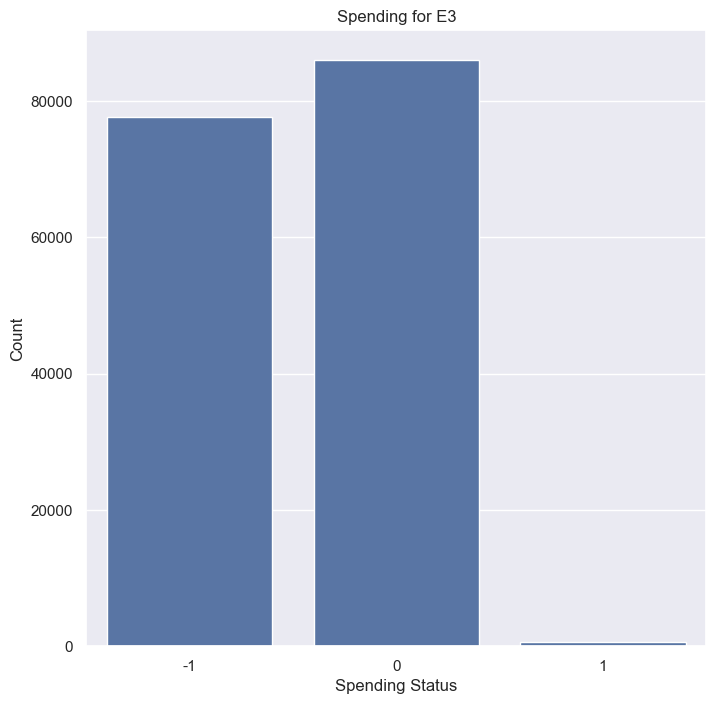

Mean : 173720676.38166294, Median : 0.0, MAX : 1957600000000.0
Corresponding Country is : USA


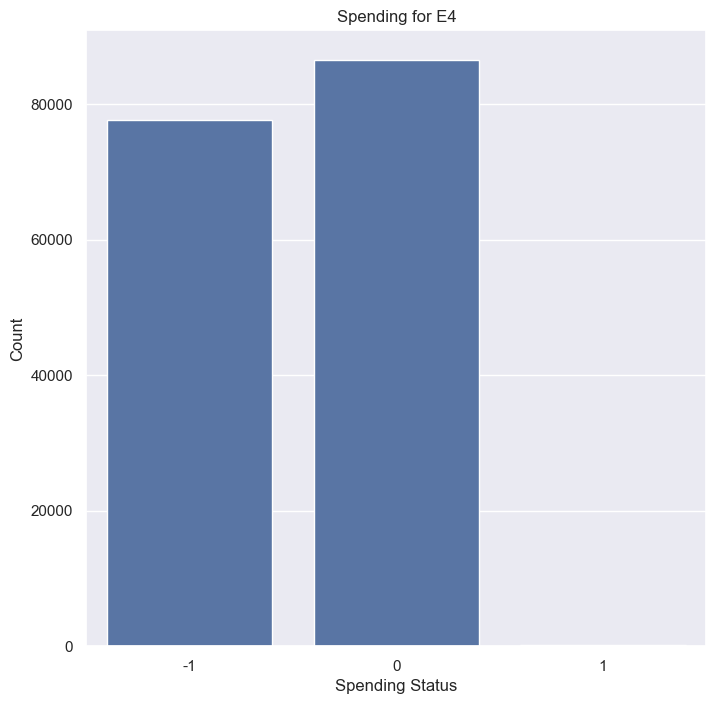

Mean : 10009803.470394785, Median : 0.0, MAX : 834353051822.0
Corresponding Country is : JPN


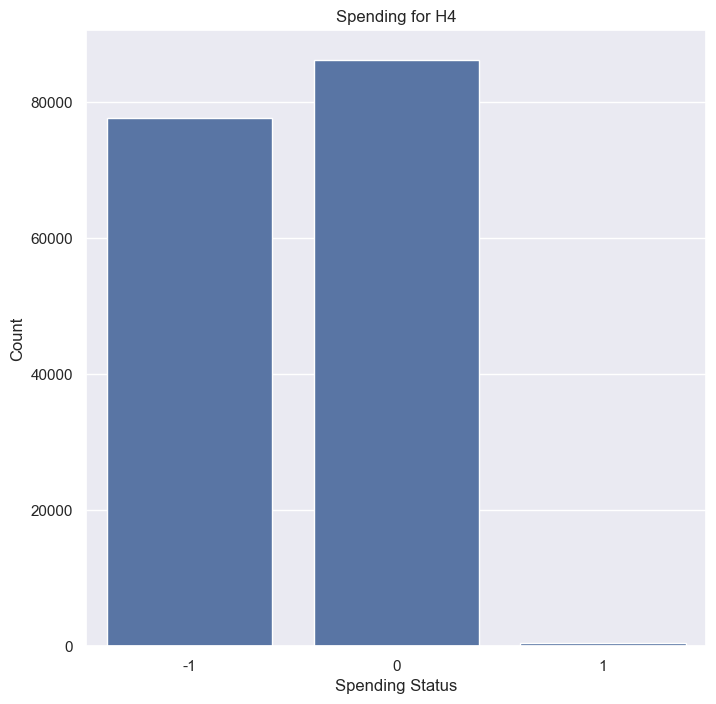

Mean : 9731971.685593475, Median : 0.0, MAX : 242400000000.0
Corresponding Country is : USA


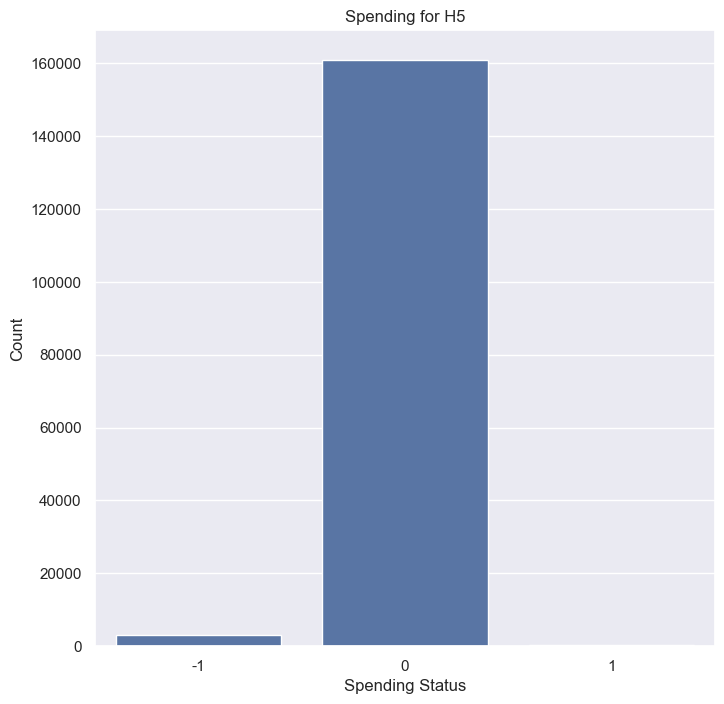

Mean : 501396.22317506187, Median : 0.0, MAX : 15750000000.0
Corresponding Country is : GBR


In [56]:
columns_here = ['E3', 'E4', 'H4', 'H5']
for column in columns_here:
    df[column + '__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else (0 if x == 0 else 1))
    plt.figure(figsize=(8, 8))
    sns.countplot(x=df[column + '__'])
    #plt.legend(labels=['Missing', 'No Spending', 'Spending'], loc='upper right')
    plt.xlabel('Spending Status')
    plt.ylabel('Count')
    plt.title('Spending for ' + column)
    plt.show()
    print(f'Mean : {df[column].mean()}, Median : {df[column].median()}, MAX : {df[column].max()}')
    print(f'Corresponding Country is : {df[df[column] == df[column].max()]["CountryCode"].values[0]}')
    df.drop(column + '__', axis=1, inplace=True)

In [57]:
helper_df.columns

Index(['Column_Name', 'Description', 'Measurement', 'customDescription',
       'Measurement_2'],
      dtype='object')

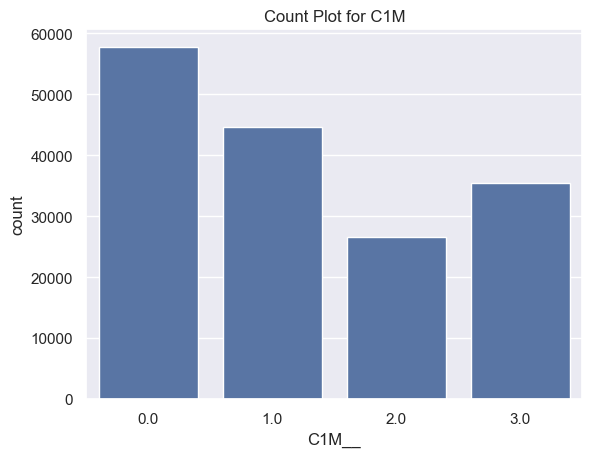

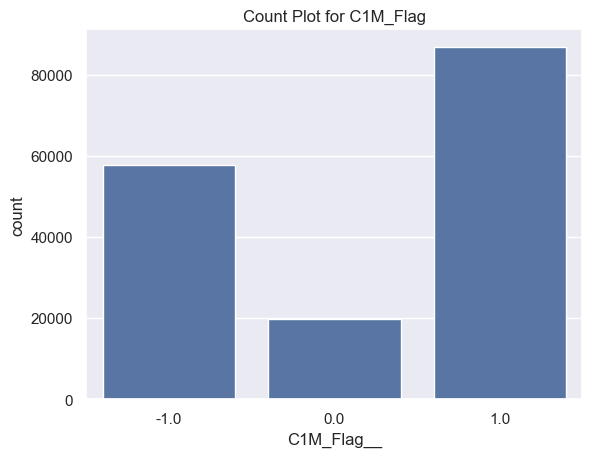

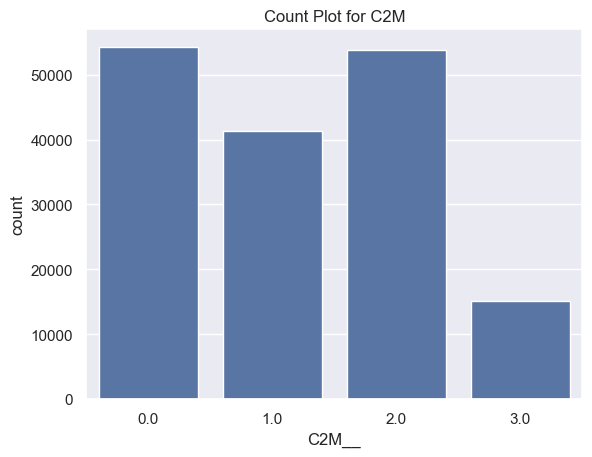

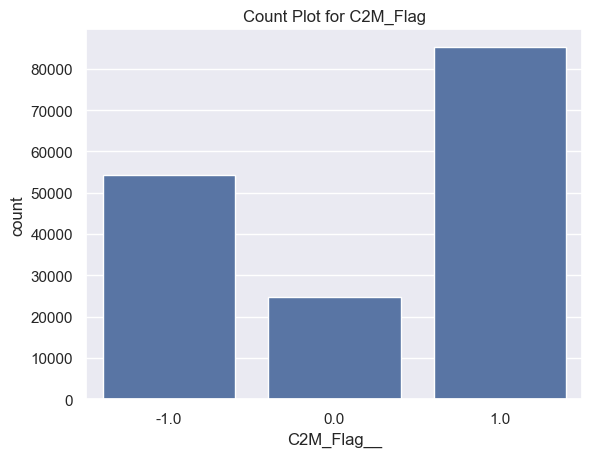

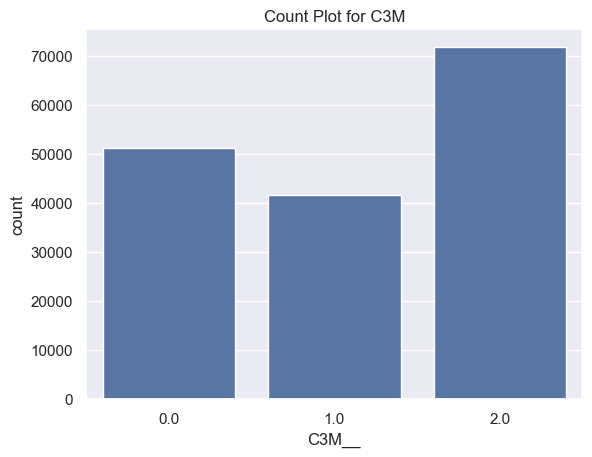

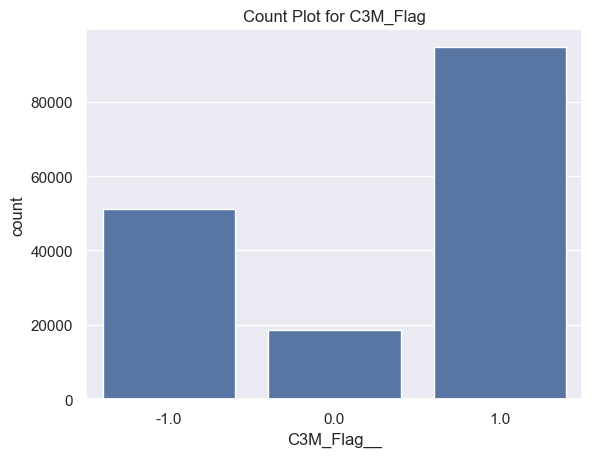

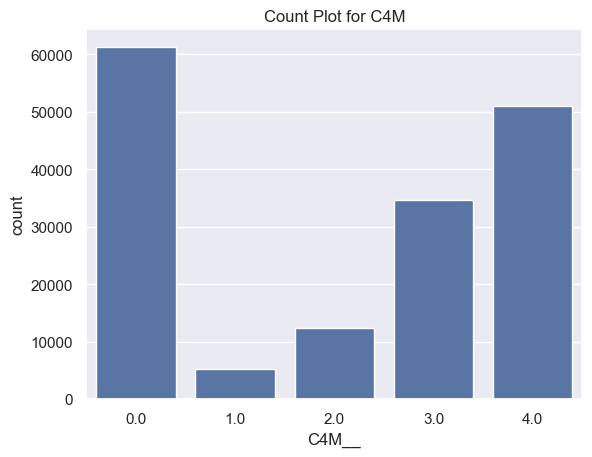

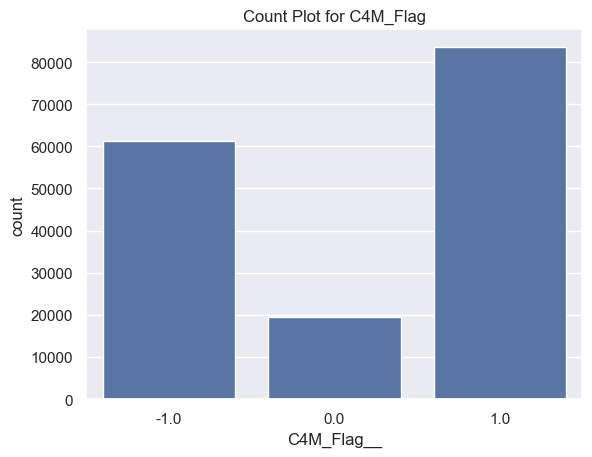

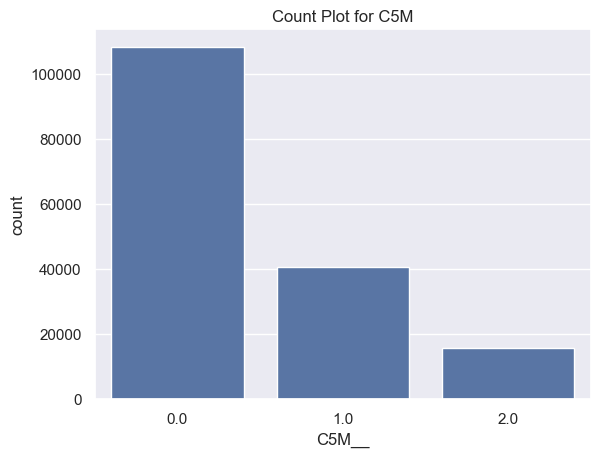

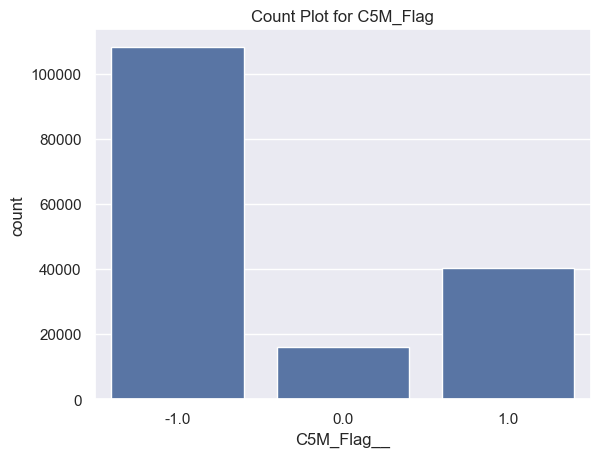

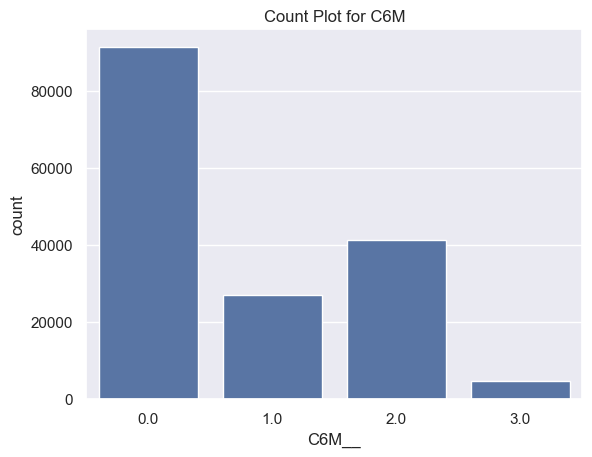

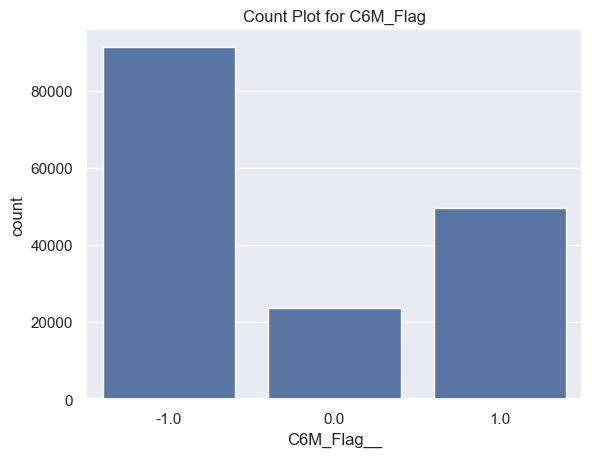

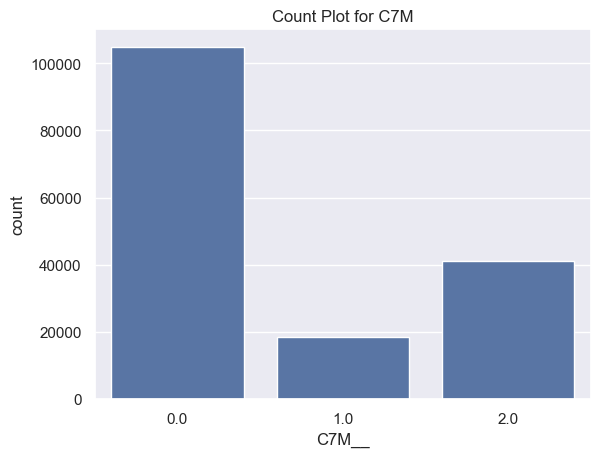

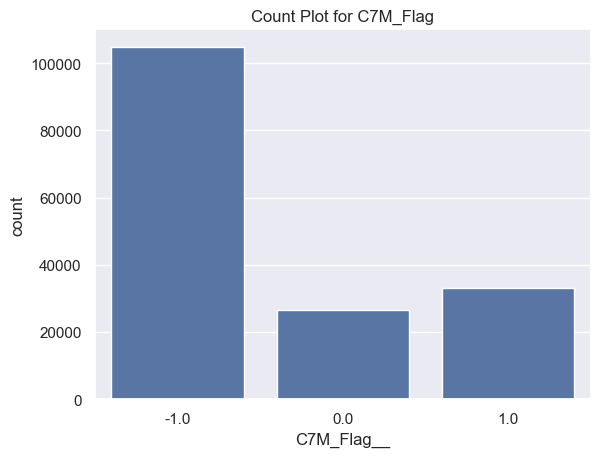

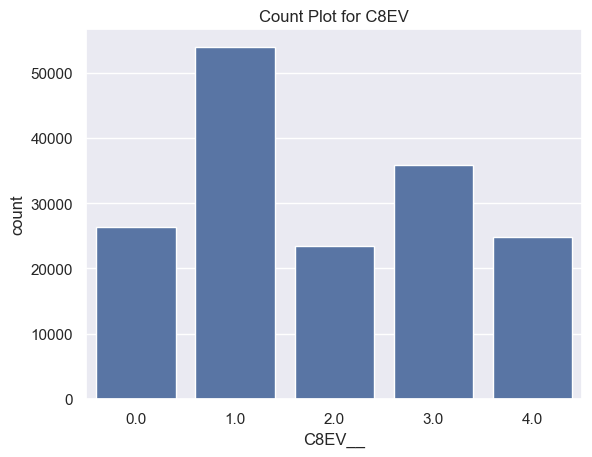

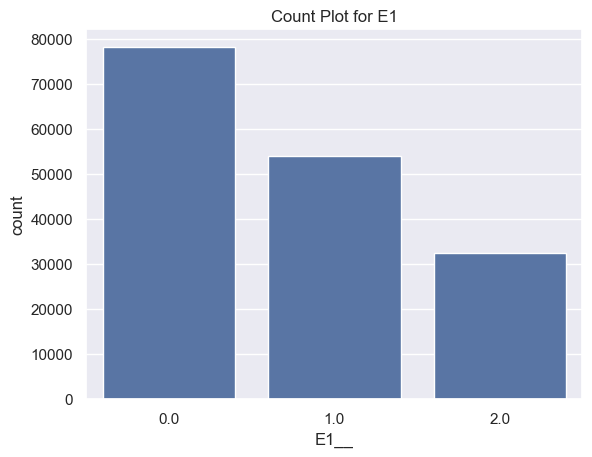

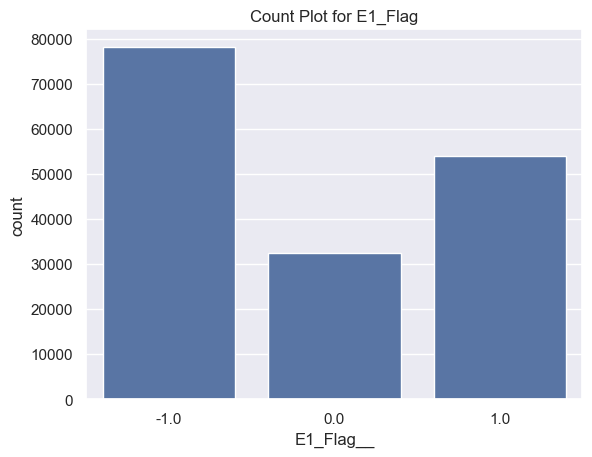

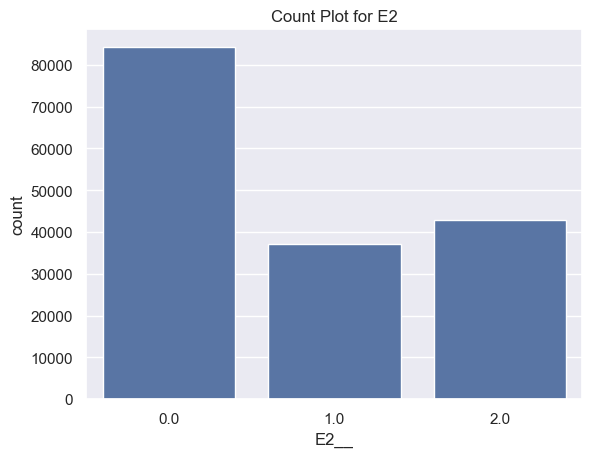

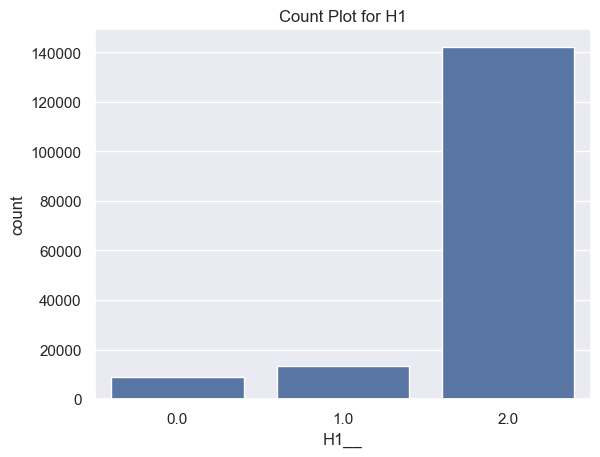

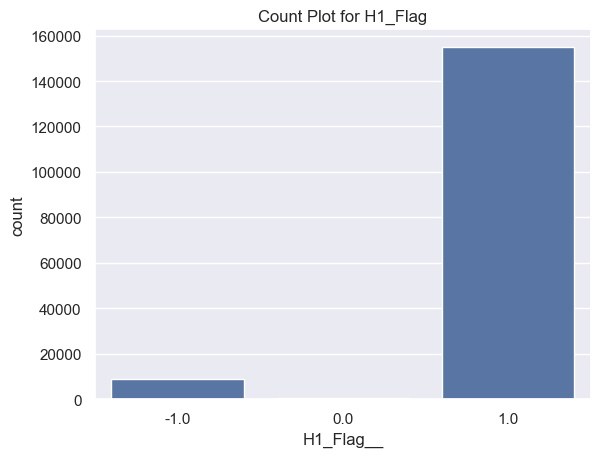

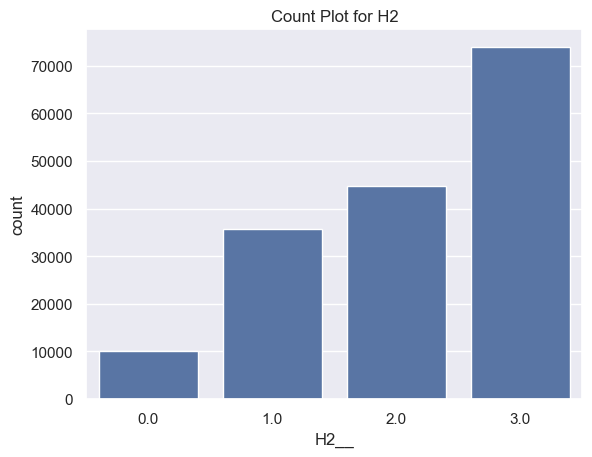

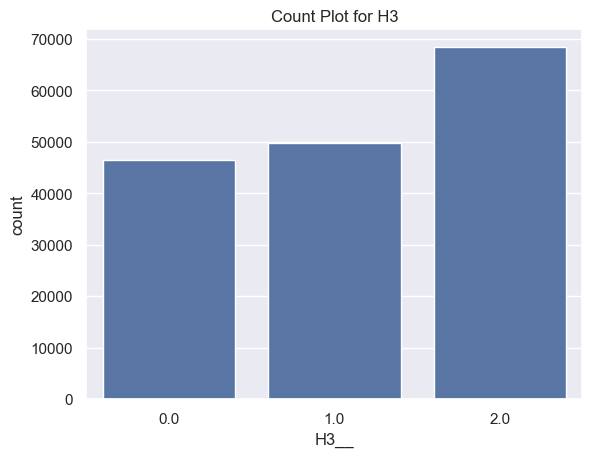

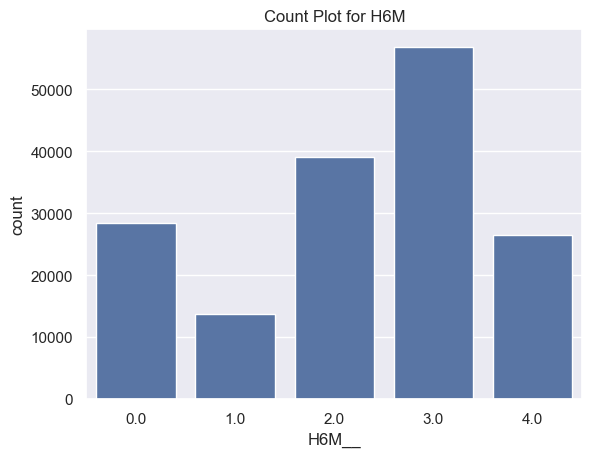

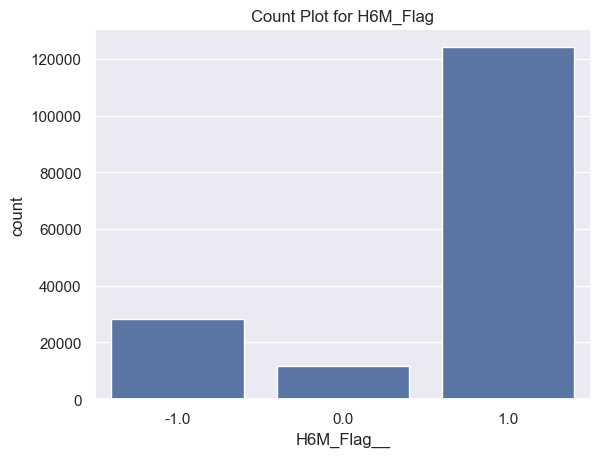

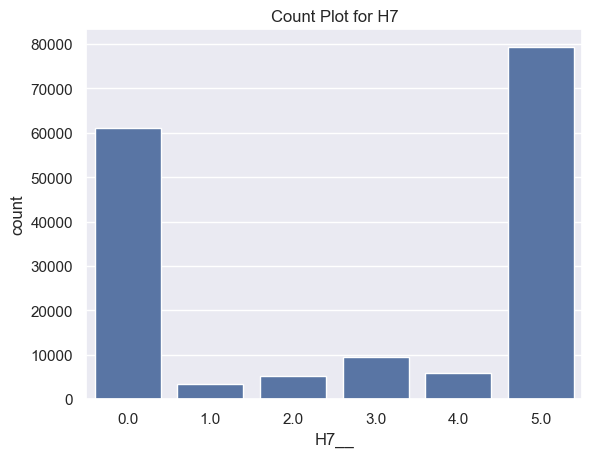

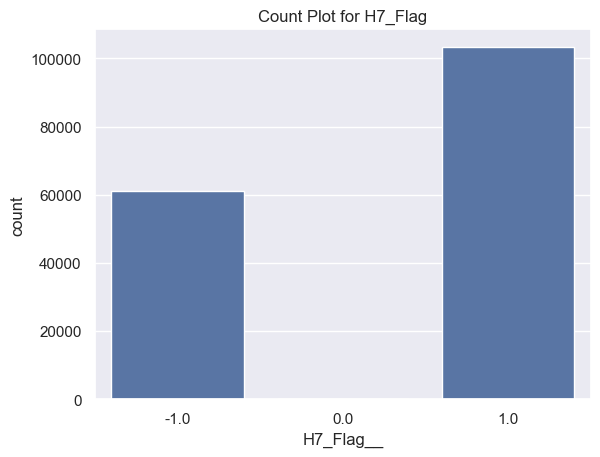

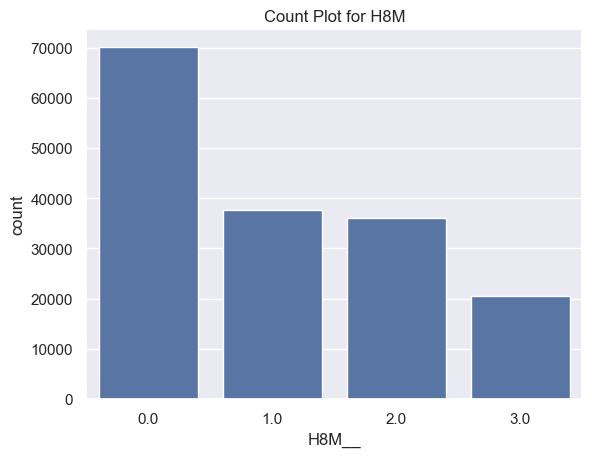

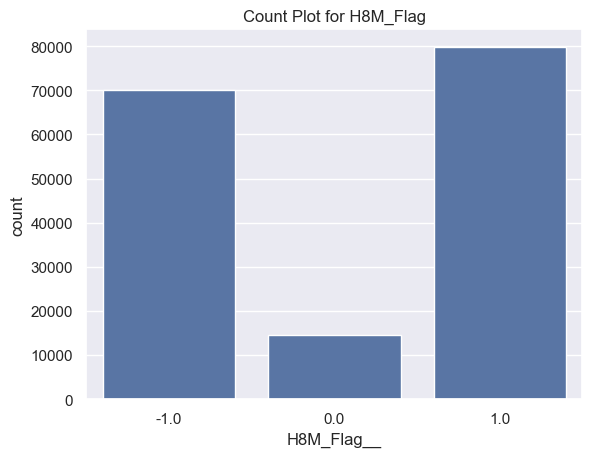

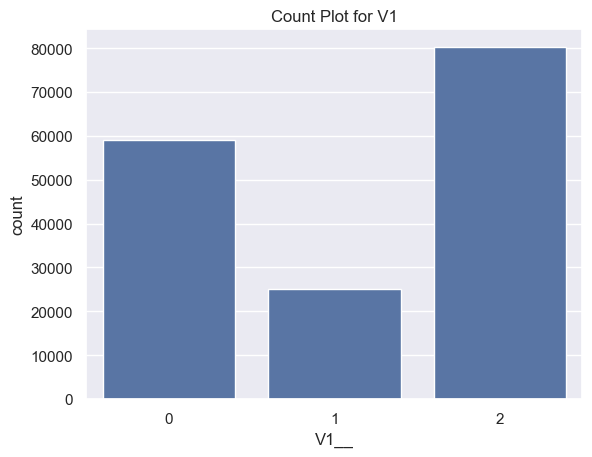

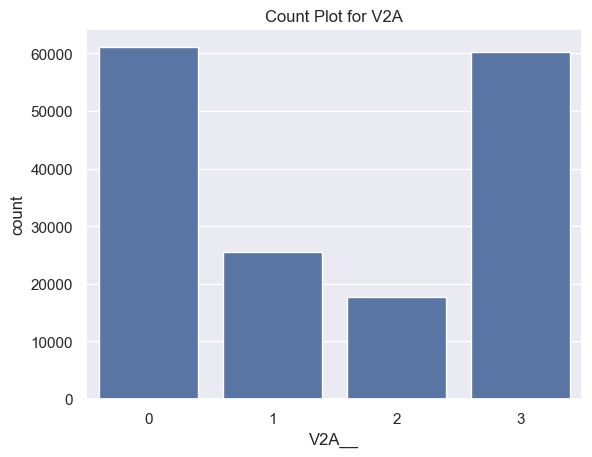

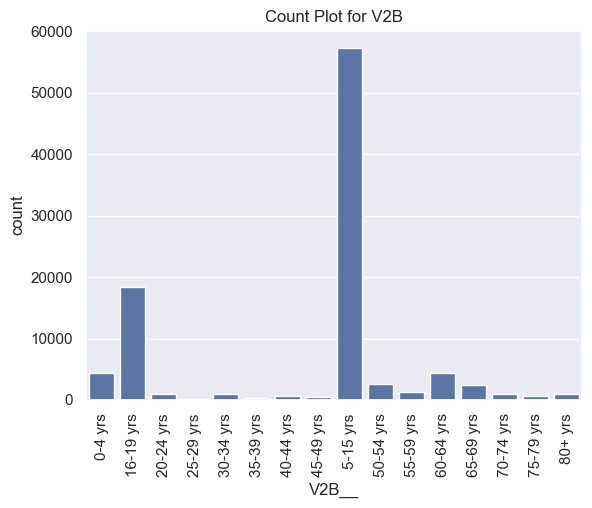

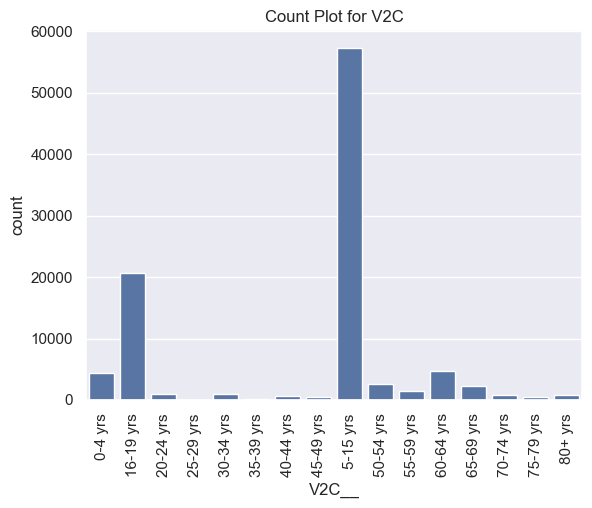

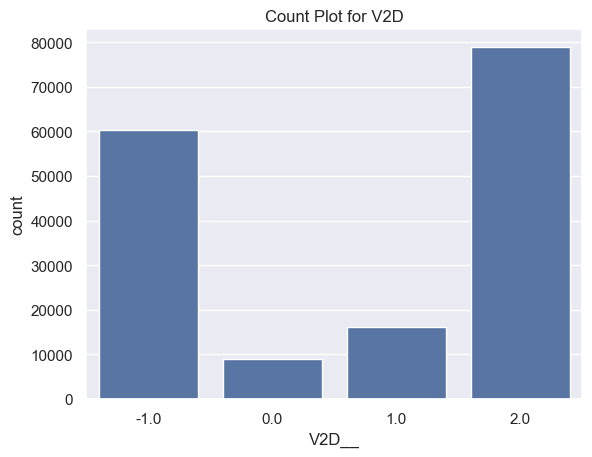

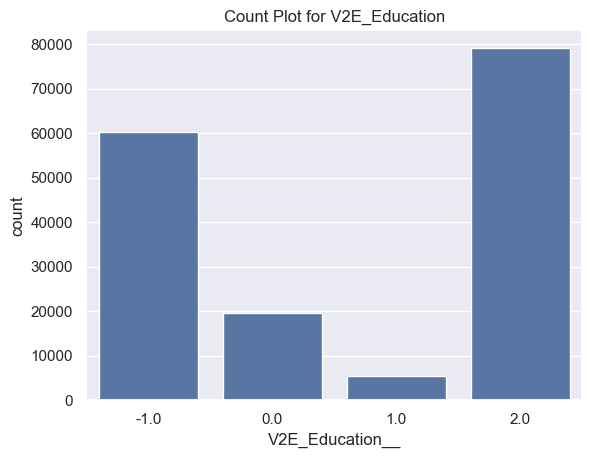

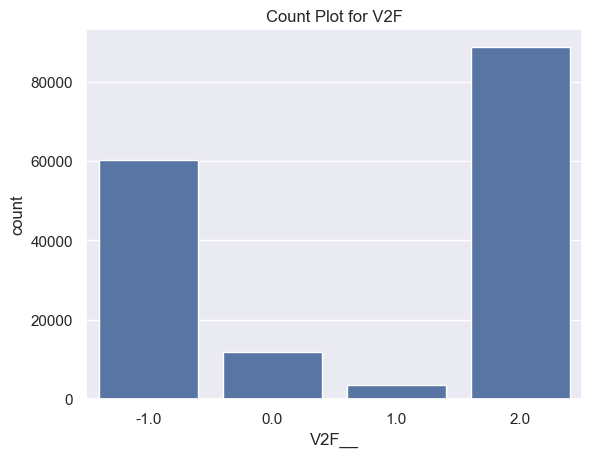

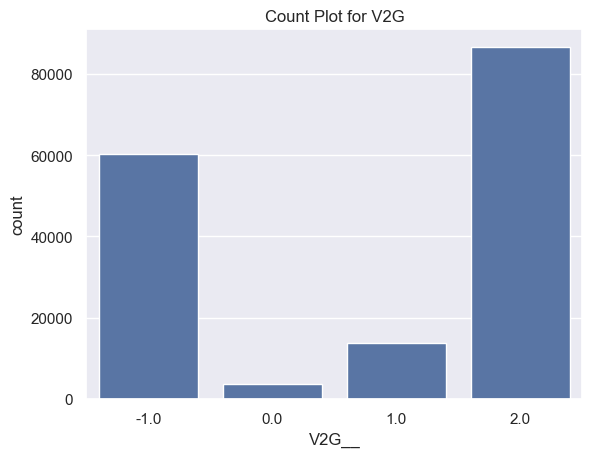

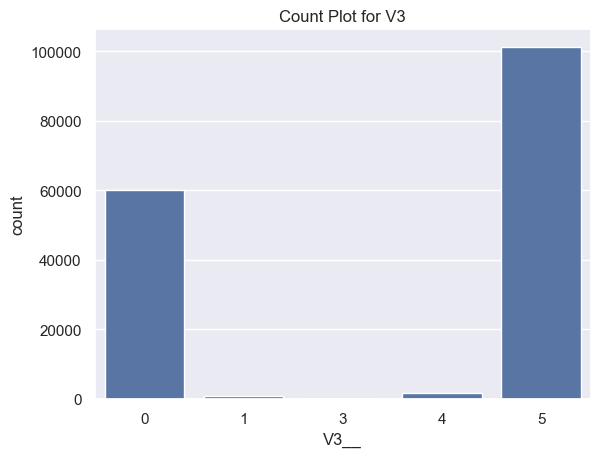

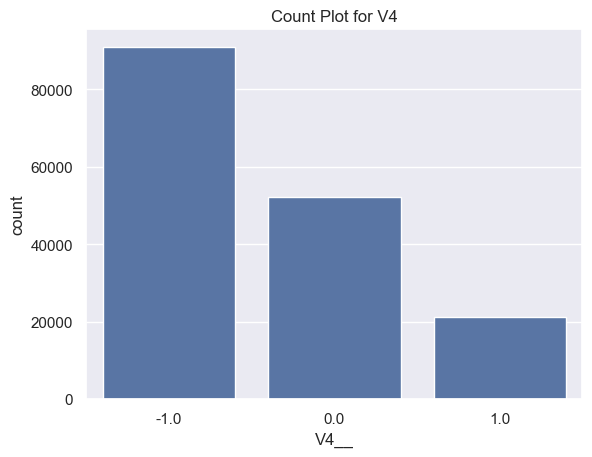

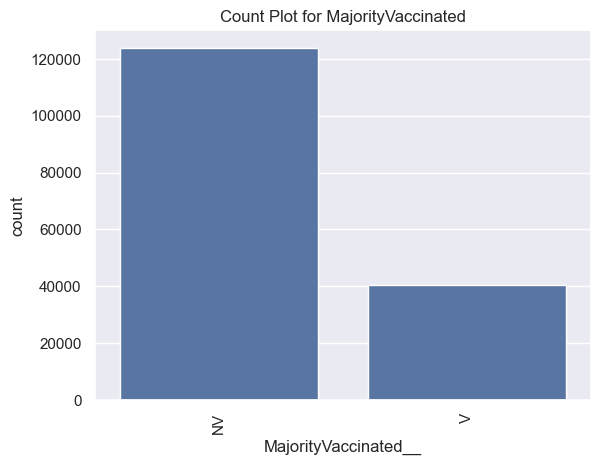

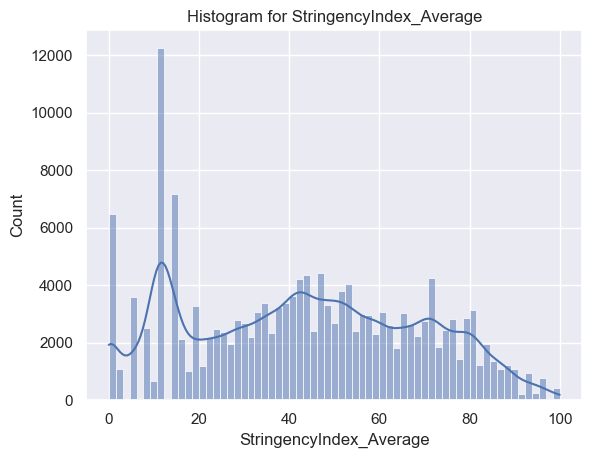

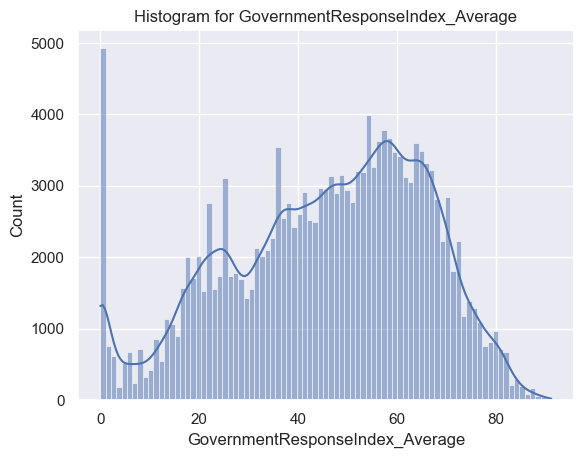

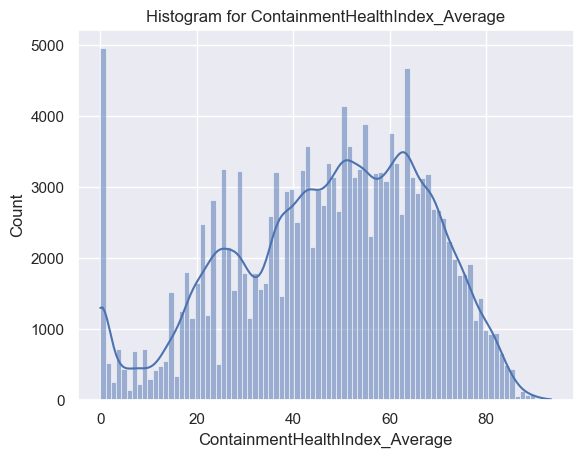

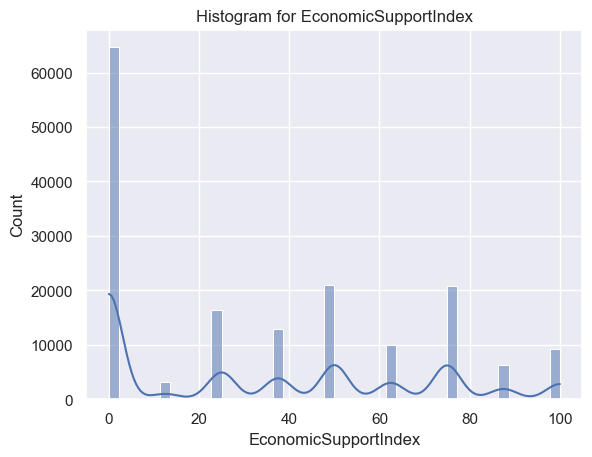

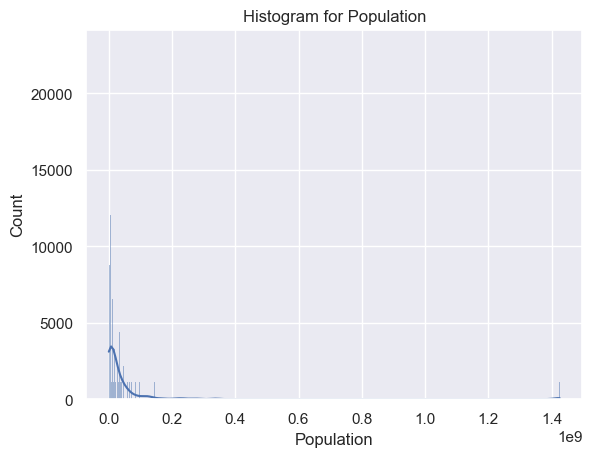

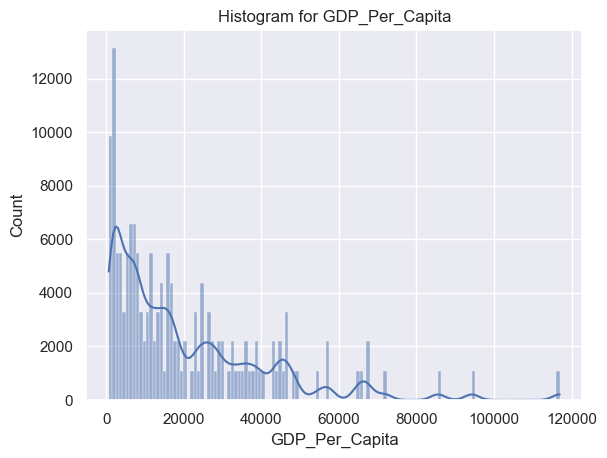

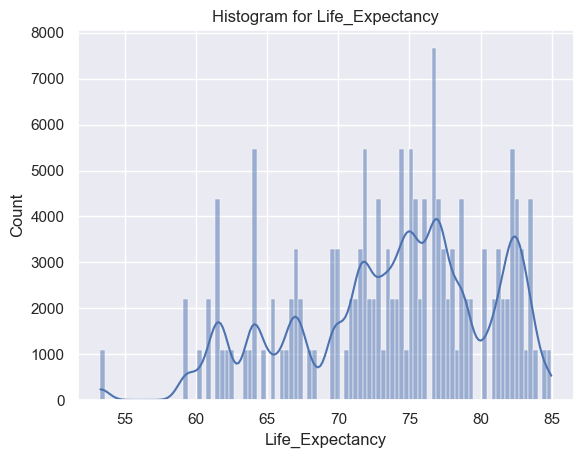

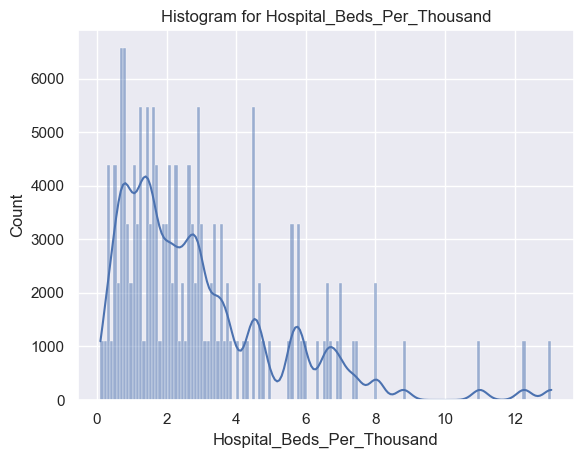

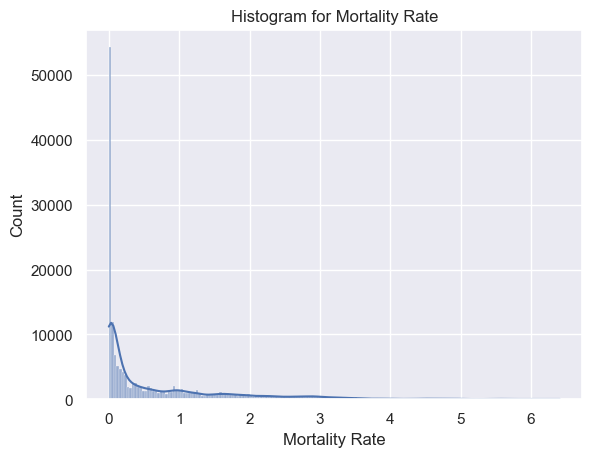

In [58]:
#helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')
def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['BinaryFlag', 'Binary', 'Categorical', 'Ordinal']:
        # Count plot for categorical and binary data
        #df[column + '_temp'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
        if measurement_info == 'Categorical':
            df[column+'__'] = df[column].apply(lambda x: 'Missing' if pd.isnull(x) else x)
            sns.countplot(x=df[column+'__'])
            plt.title(f'Count Plot for {column}')
            plt.xticks(rotation=90)
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        else: 
            df[column+'__'] = df[column].apply(lambda x: -1 if pd.isnull(x) else x)
            sns.countplot(data=df, x=column + '__')
            plt.title(f'Count Plot for {column}')
            plt.show()
            df.drop(column+'__', axis=1, inplace=True)
        #fig = go.Figure(data=go.Histogram(x=df[column]))
        #fig.update_layout(title_text=f'Count Plot for {column}', xaxis_title=column, yaxis_title='Count')
        #fig.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        df[column+'__'] = df[column].apply(lambda x: -99 if pd.isnull(x) else x)
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()
        df.drop(column+'__', axis=1, inplace=True)

exclude_columns = ['Date', 'CountryName', 'ConfirmedCases', 'ConfirmedDeaths', 'PopulationVaccinated', 'E3', 'E4', 'H4', 'H5']
columns_to_plot = [col for col in df.columns if col not in exclude_columns]


for column in columns_to_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement_2'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])

#### Considering nationwide policies only

Dropping it for now

In [59]:
'''
# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape
'''

"\n# columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'\nflag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]\n\n# flag columns have a value of 1,\ndf = df[(df[flag_columns] == 1).any(axis=1)]\n\ndf = df.drop(columns=flag_columns)\n\ndf.shape\n"

In [60]:
df.describe()

Date            C1M       C1M_Flag  \
count                         164400  164400.000000  106650.000000   
mean   2021-07-01 11:59:59.999999744       1.241648       0.813821   
min              2020-01-01 00:00:00       0.000000       0.000000   
25%              2020-09-30 18:00:00       0.000000       1.000000   
50%              2021-07-01 12:00:00       1.000000       1.000000   
75%              2022-04-01 06:00:00       2.000000       1.000000   
max              2022-12-31 00:00:00       3.000000       1.000000   
std                              NaN       1.147679       0.389253   

                 C2M       C2M_Flag            C3M       C3M_Flag  \
count  164400.000000  110144.000000  164400.000000  113265.000000   
mean        1.180852       0.774477       1.125316       0.836366   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         2.000000       1.000000       2.000000       1.000000   
max         3.000000       1.000000       2.000000       1.000000   
std         0.995892       0.417928       0.855393       0.369945   

                 C4M       C4M_Flag            C5M      C5M_Flag  \
count  164400.000000  103137.000000  164400.000000  56206.000000   
mean        2.053863       0.810408       0.436934      0.715493   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       1.000000       0.000000      0.000000   
50%         3.000000       1.000000       0.000000      1.000000   
75%         4.000000       1.000000       1.000000      1.000000   
max         4.000000       1.000000       2.000000      1.000000   
std         1.723572       0.391980       0.660396      0.451183   

                 C6M      C6M_Flag            C7M      C7M_Flag  \
count  164400.000000  73118.000000  164400.000000  59567.000000   
mean        0.753114      0.677562       0.612348      0.554317   
min         0.000000      0.000000       0.000000      0.000000   
25%         0.000000      0.000000       0.000000      0.000000   
50%         0.000000      1.000000       0.000000      1.000000   
75%         2.000000      1.000000       2.000000      1.000000   
max         3.000000      1.000000       2.000000      1.000000   
std         0.927041      0.467413       0.858731      0.497045   

                C8EV             E1       E1_Flag             E2  \
count  164400.000000  164400.000000  86251.000000  164400.000000   
mean        1.872251       0.721308      0.625280       0.748577   
min         0.000000       0.000000      0.000000       0.000000   
25%         1.000000       0.000000      0.000000       0.000000   
50%         2.000000       1.000000      1.000000       0.000000   
75%         3.000000       1.000000      1.000000       2.000000   
max         4.000000       2.000000      1.000000       2.000000   
std         1.331576       0.770947      0.484053       0.842977   

                 E3            E4             H1        H1_Flag  \
count  8.671400e+04  8.673100e+04  164400.000000  155493.000000   
mean   1.737207e+08  1.000980e+07       1.810639       0.996624   
min   -1.000000e-02  0.000000e+00       0.000000       0.000000   
25%    0.000000e+00  0.000000e+00       2.000000       1.000000   
50%    0.000000e+00  0.000000e+00       2.000000       1.000000   
75%    0.000000e+00  0.000000e+00       2.000000       1.000000   
max    1.957600e+12  8.343531e+11       2.000000       1.000000   
std    1.232536e+10  2.833454e+09       0.511725       0.058008   

                  H2             H3            H4            H5  \
count  164400.000000  164400.000000  8.670100e+04  1.612630e+05   
mean        2.111290       1.133887  9.731972e+06  5.013962e+05   
min         0.000000       0.000000 -1.000000e-02 -7.000000e-02   
25%         1.000000       0.000000  0.000000e+00  0.000000e+00   
50%       

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.
Dropping it

In [61]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

"\nmissing_values_count = df.isna().sum()\nmissing_values_count = missing_values_count[missing_values_count > 0]\n\ncolumn_data_types = df.dtypes\n\n# use mean, median, or mode for imputation, based on the data type\nimputation_strategy = {}\nfor column in missing_values_count.index:\n    if column_data_types[column] in ['float64', 'int64']:\n        imputation_strategy[column] = 'median'\n    else:\n        imputation_strategy[column] = 'mode'\n\n# imputation with a fallback\ndef impute_with_fallback(series, strategy):\n    if strategy == 'median':\n        global_fallback = series.median()\n        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))\n    elif strategy == 'mode':\n        global_fallback = series.mode().iloc[0] if not series.mode().empty else None\n        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))\n\nfor column, strategy in imputati

#### Fill NaNs with 0.

In [62]:
'''
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')
'''        

"\nfor col in df.columns:\n    if pd.api.types.is_numeric_dtype(df[col]):\n        df.loc[:, col] = df[col].fillna(0)\n    elif pd.api.types.is_categorical_dtype(df[col]):\n        if '0' not in df[col].cat.categories:\n            df[col] = df[col].cat.add_categories('0')\n        df.loc[:, col] = df[col].fillna('0')\n"

### Correlation Matrix

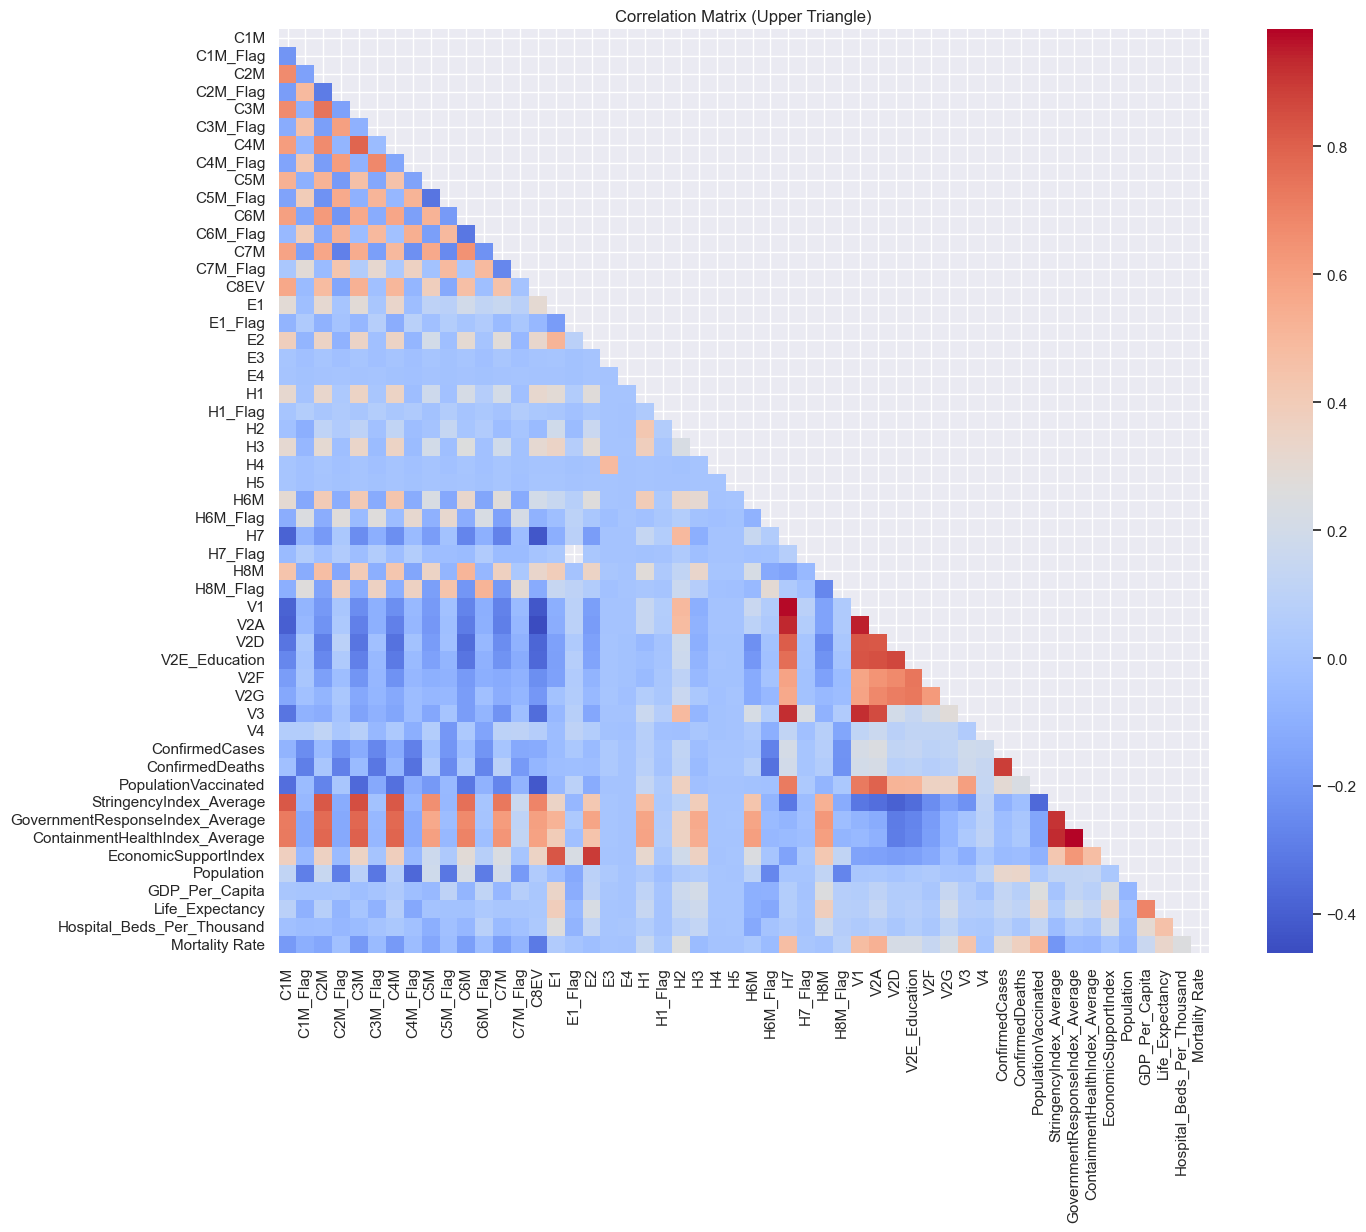

Columns: C1M and C2M, Correlation Coefficient: 0.67
Columns: H6M and StringencyIndex_Average, Correlation Coefficient: 0.44
Columns: H1 and H6M, Correlation Coefficient: 0.40
Columns: C5M and StringencyIndex_Average, Correlation Coefficient: 0.66
Columns: C2M and ContainmentHealthIndex_Average, Correlation Coefficient: 0.78
Columns: ContainmentHealthIndex_Average and H1, Correlation Coefficient: 0.58
Columns: C2M_Flag and C3M_Flag, Correlation Coefficient: 0.60
Columns: C5M and GovernmentResponseIndex_Average, Correlation Coefficient: 0.56
Columns: H7 and PopulationVaccinated, Correlation Coefficient: 0.72
Columns: C4M and StringencyIndex_Average, Correlation Coefficient: 0.82
Columns: C3M and C4M, Correlation Coefficient: 0.79
Columns: C4M and C8EV, Correlation Coefficient: 0.51
Columns: E3 and H4, Correlation Coefficient: 0.49
Columns: PopulationVaccinated and V2E_Education, Correlation Coefficient: 0.51
Columns: C1M and H8M, Correlation Coefficient: 0.44
Columns: C8EV and V2A, Corre

151

In [63]:
corr_matrix = df.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [64]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

### TSA

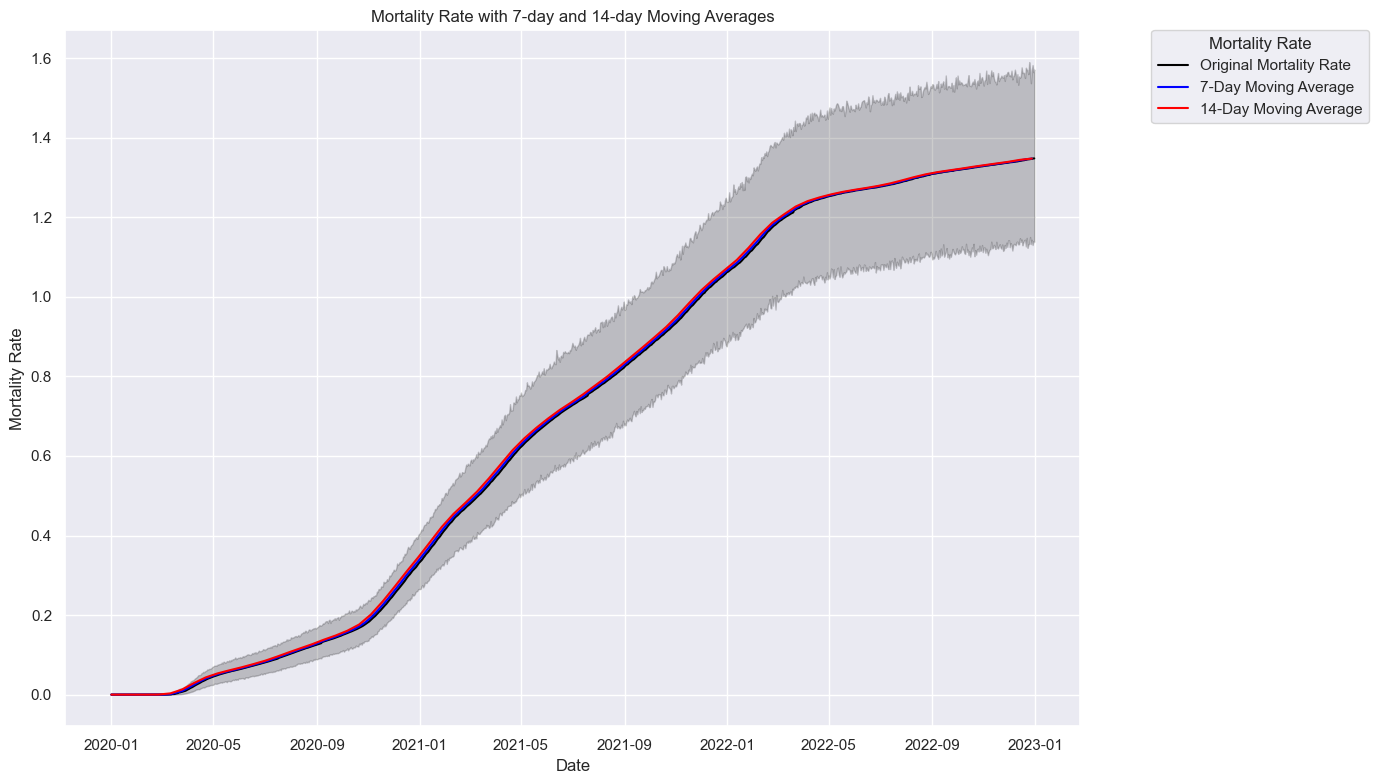

In [65]:
df_time = df.sort_values('Date')

df_time.set_index('Date', inplace=True)

df_time['7_day_MA_Mortality'] = df_time['Mortality Rate'].resample('7D').mean()
df_time['14_day_MA_Mortality'] = df_time['Mortality Rate'].resample('14D').mean()

df_time['7D_MA_ConfirmedCases'] = df_time['ConfirmedCases'].resample('7D').mean()
df_time['14D_MA_ConfirmedCases'] = df_time['ConfirmedCases'].resample('14D').mean()

df_time['7D_MA_ConfirmedDeaths'] = df_time['ConfirmedDeaths'].resample('7D').mean()
df_time['14D_MA_ConfirmedDeaths'] = df_time['ConfirmedDeaths'].resample('14D').mean()

#df_time['7_day_MA_Mortality'] = df_time['7_day_MA_Mortality'].fillna(method='ffill')
#df_time['14_day_MA_Mortality'] = df_time['14_day_MA_Mortality'].fillna(method='ffill')
#df_time['7D_MA_ConfirmedCases'] = df_time['7D_MA_ConfirmedCases'].fillna(method='ffill')
#df_time['14D_MA_ConfirmedDeaths'] = df_time['14D_MA_ConfirmedDeaths'].fillna(method='ffill')

df_time.reset_index(inplace=True)

plt.figure(figsize=(14, 8))

sns.lineplot(x='Date', y='Mortality Rate', data=df_time, label='Original Mortality Rate', color='black')
sns.lineplot(x='Date', y='7_day_MA_Mortality', data=df_time, label='7-Day Moving Average', color='blue')
sns.lineplot(x='Date', y='14_day_MA_Mortality', data=df_time, label='14-Day Moving Average', color='red')

plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate with 7-day and 14-day Moving Averages')
plt.legend(title = 'Mortality Rate', loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)

plt.tight_layout()

plt.show()

In [66]:
filteredTimeDf = df_time[['Date', 'Mortality Rate', '7_day_MA_Mortality', '14_day_MA_Mortality']]

filteredTimeDf.head(1)


Date  Mortality Rate  7_day_MA_Mortality  14_day_MA_Mortality
0 2020-01-01             0.0                 0.0                  0.0

In [67]:
filteredTimeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164400 entries, 0 to 164399
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 164400 non-null  datetime64[ns]
 1   Mortality Rate       164400 non-null  float64       
 2   7_day_MA_Mortality   23550 non-null   float64       
 3   14_day_MA_Mortality  11850 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.0 MB


In [68]:
def plot_mortality_rate(start_date, end_date):
    df_timefiltered = filteredTimeDf[(filteredTimeDf['Date'] >= start_date) & (filteredTimeDf['Date'] <= end_date)]

    plt.figure(figsize=(14, 8))

    sns.lineplot(x='Date', y='Mortality Rate', data=df_timefiltered, label='Original Mortality Rate', color='black')
    sns.lineplot(x='Date', y='7_day_MA_Mortality', data=df_timefiltered, label='7-Day Moving Average', color='blue')
    sns.lineplot(x='Date', y='14_day_MA_Mortality', data=df_timefiltered, label='14-Day Moving Average', color='red')

    plt.xlabel(f"Date : {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
    plt.ylabel('Mortality Rate')
    plt.title('Mortality Rate with 7-day and 14-day Moving Averages')
    plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)

    plt.tight_layout()

    plt.show()

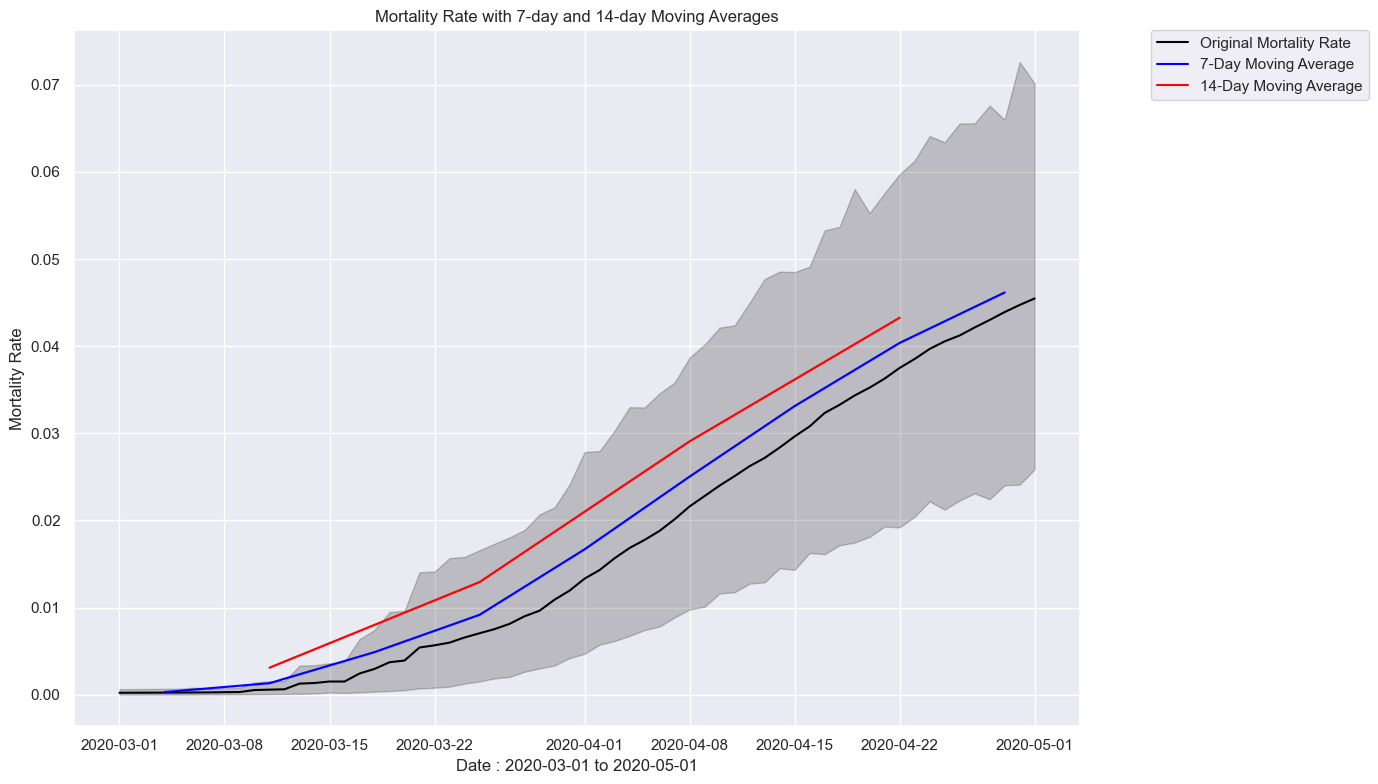

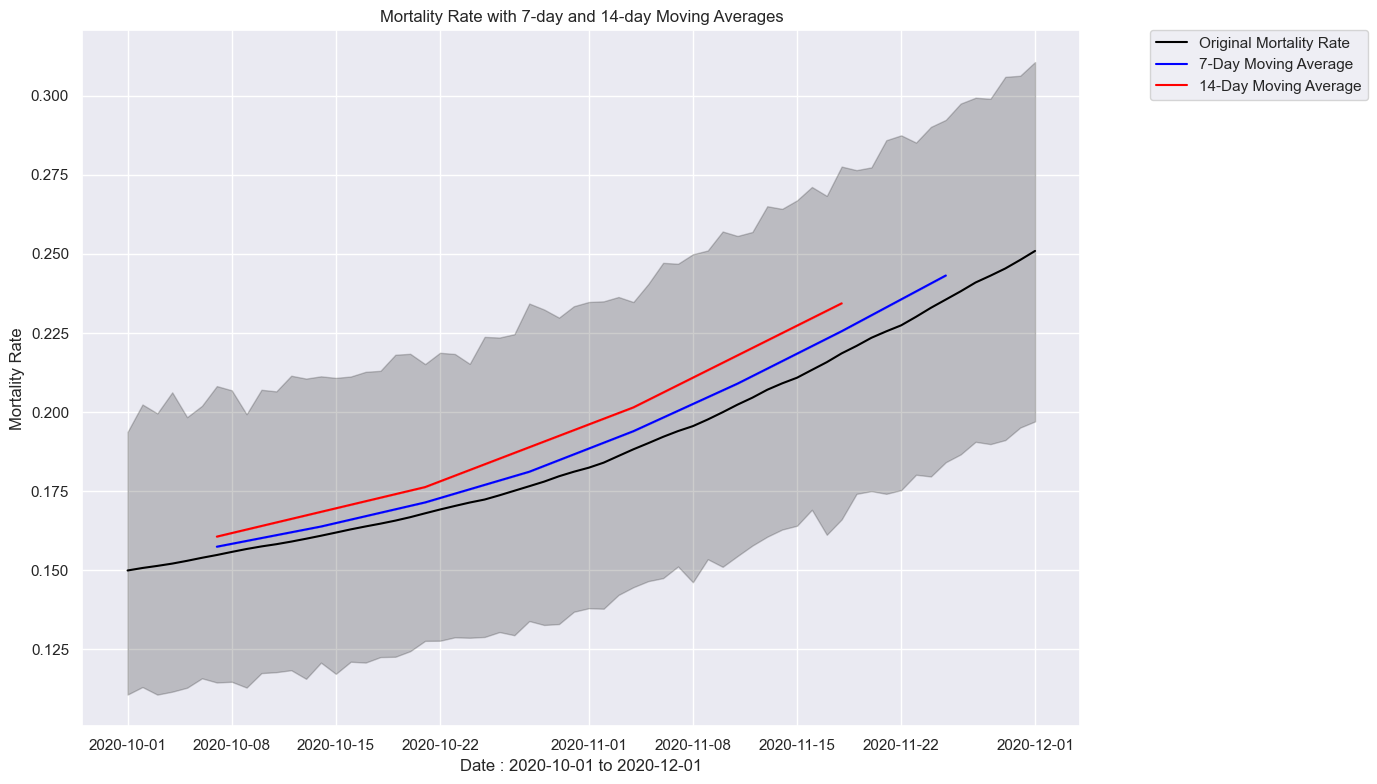

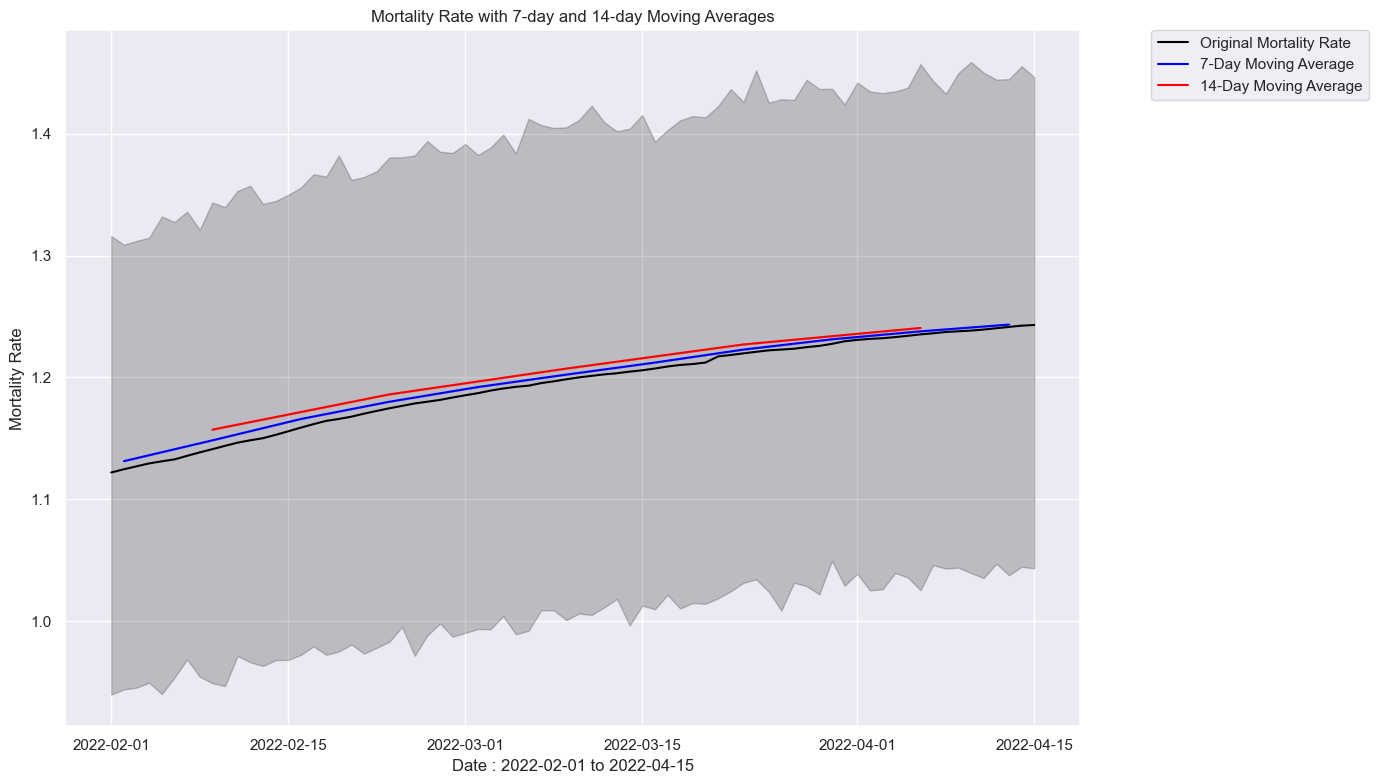

In [69]:
date_ranges = {
    "Period 1": (pd.to_datetime("2020-03-01"), pd.to_datetime("2020-05-01")),
    "Period 2": (pd.to_datetime("2020-10-01"), pd.to_datetime("2020-12-01")),
    "Period 3": (pd.to_datetime("2022-02-01"), pd.to_datetime("2022-04-15"))
}

for period, dates in date_ranges.items():
    plot_mortality_rate(dates[0], dates[1])

#### Confirmed Cases

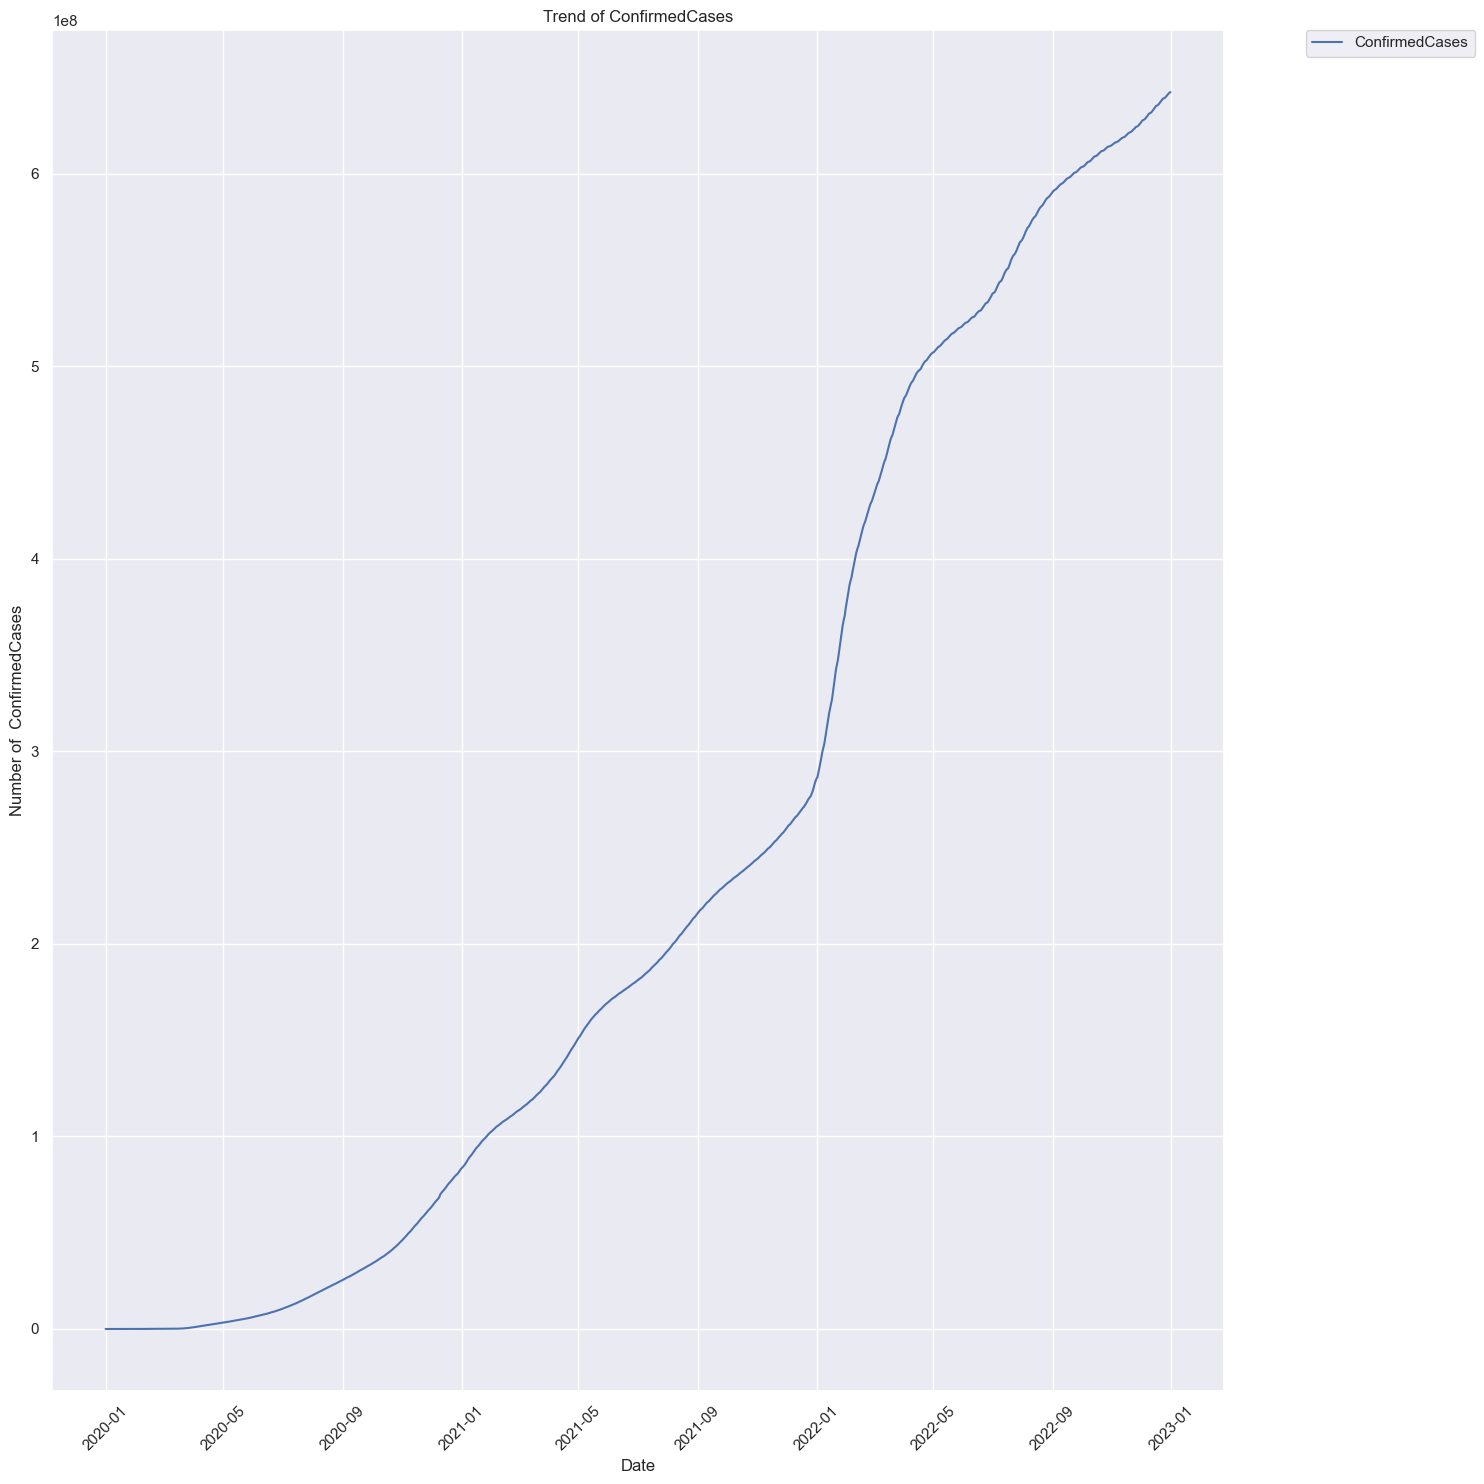

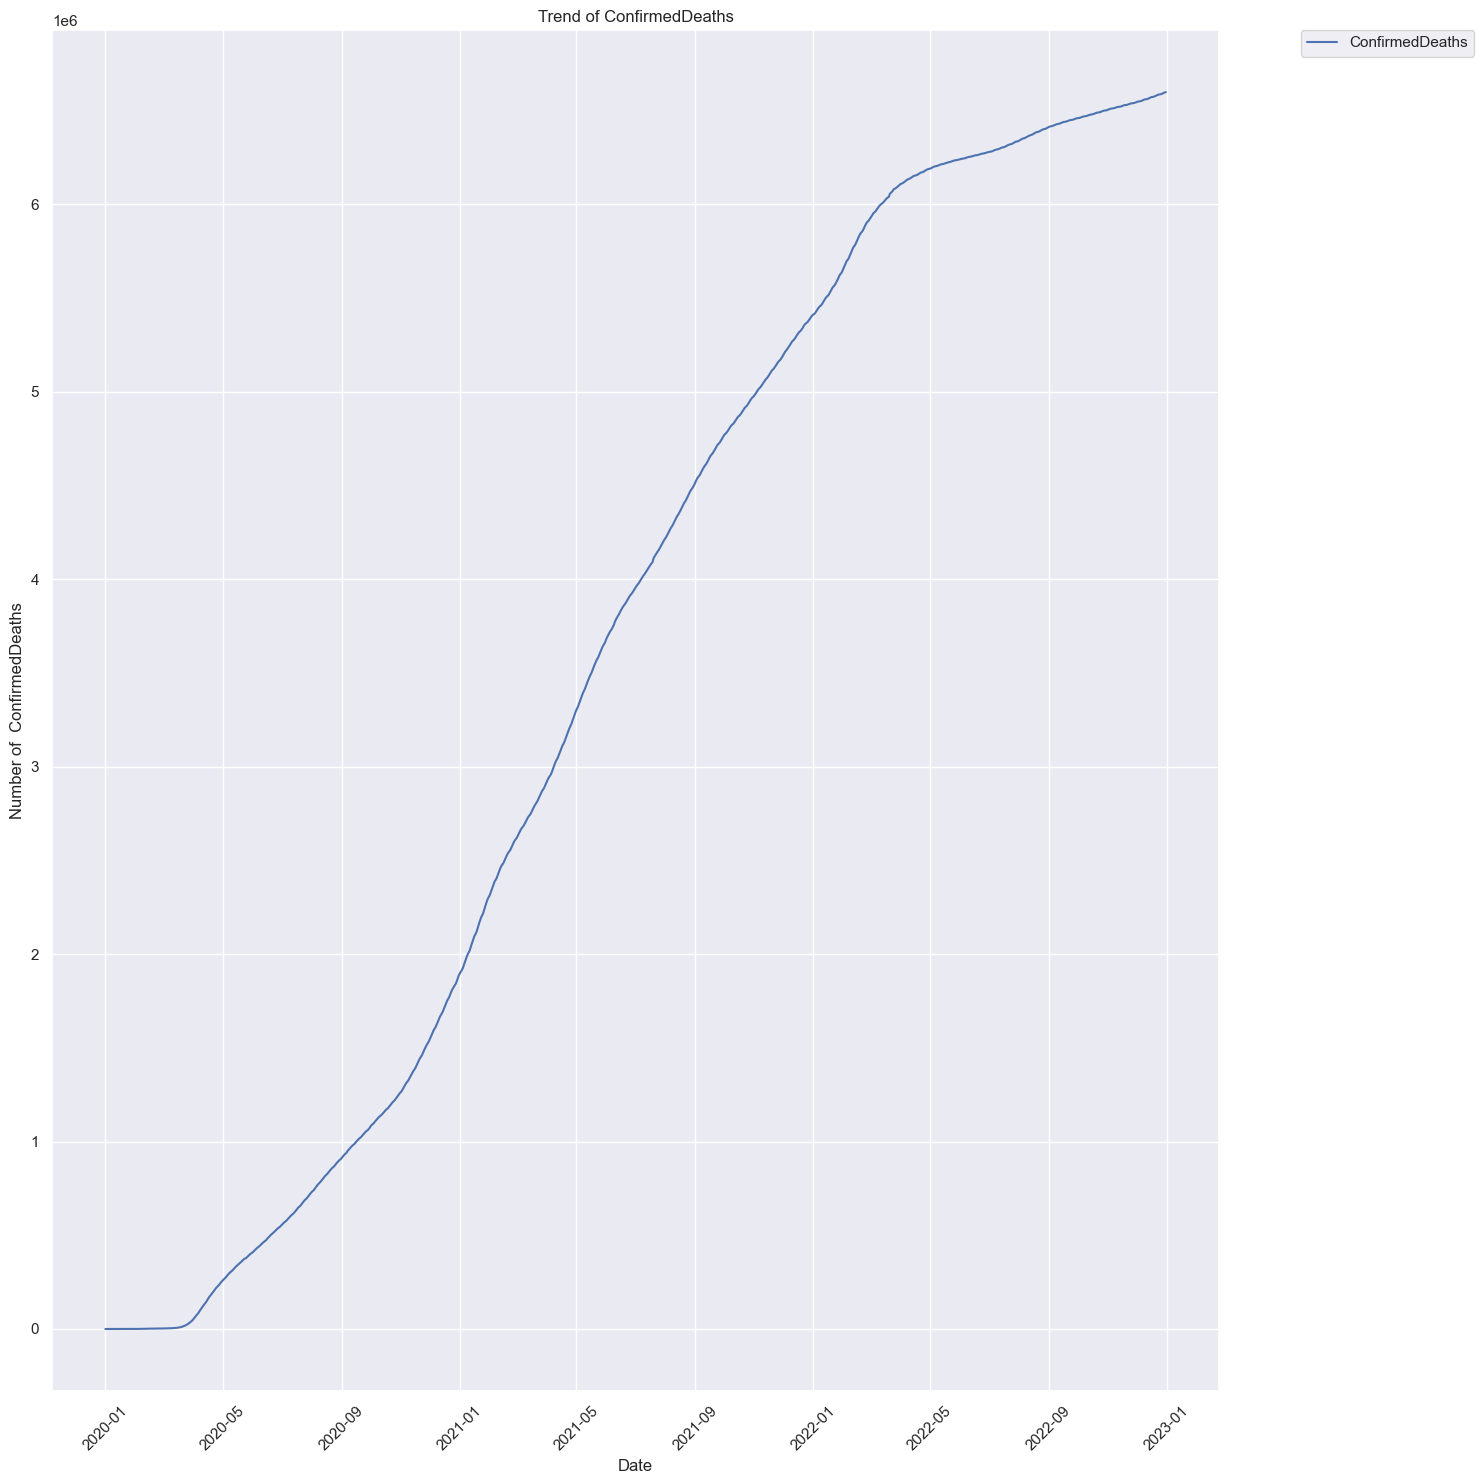

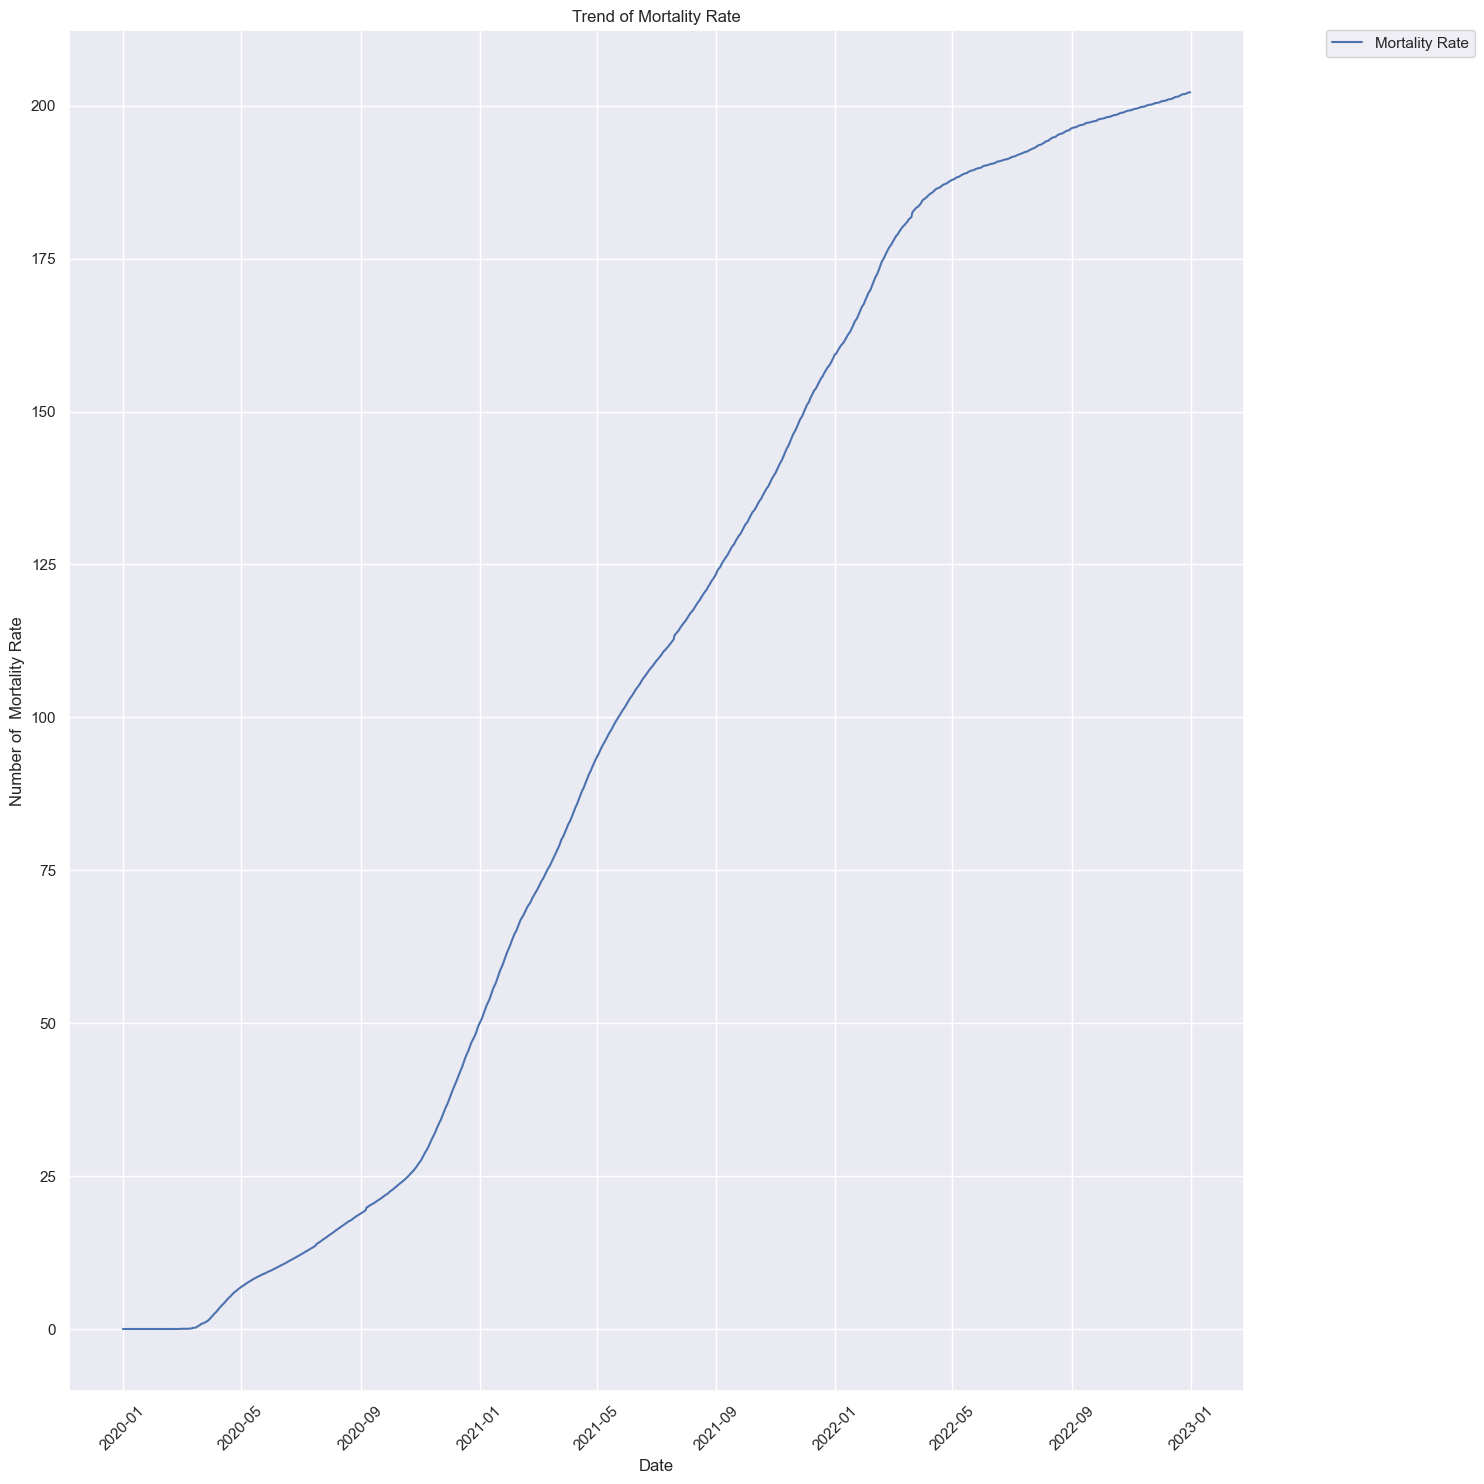

In [70]:
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

selected_columns = ['ConfirmedCases', 'ConfirmedDeaths', 'Mortality Rate']

for columns in selected_columns:
    plt.figure(figsize=(15, 15))       
    plt.plot(df_agg_date.index, df_agg_date[columns], label= columns)
    plt.title(f'Trend of {columns}')
    plt.xlabel('Date')
    plt.ylabel(f'Number of  {columns}')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.show()


In [71]:
print('The total number of covid-19 cases in our dataset is {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

The total number of covid-19 cases in our dataset is 642483411.0


In [72]:
df_agg_date.describe()

CountryCode          C1M     C1M_Flag          C2M     C2M_Flag  \
count       1096.0  1096.000000  1096.000000  1096.000000  1096.000000   
mean         150.0   186.247263    79.191606   177.127737    77.832117   
std            0.0   117.775299    39.059114    89.056445    31.211623   
min          150.0     0.000000     0.000000     0.000000     0.000000   
25%          150.0    55.000000    36.000000    78.000000    49.000000   
50%          150.0   198.000000    91.000000   214.000000    92.000000   
75%          150.0   265.000000   110.000000   241.000000    97.000000   
max          150.0   437.000000   142.000000   356.000000   122.000000   

               C3M     C3M_Flag          C4M     C4M_Flag          C5M  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean    168.797445    86.433394   308.079380    76.261861    65.540146   
std      83.952786    39.374599   175.318466    40.444289    41.537596   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      76.000000    47.000000   104.000000    32.750000    21.000000   
50%     208.000000   107.000000   403.000000    97.000000    76.000000   
75%     231.000000   113.000000   458.000000   106.000000    90.000000   
max     290.000000   140.000000   503.000000   131.000000   178.000000   

          C5M_Flag          C6M     C6M_Flag          C7M     C7M_Flag  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     36.692518   112.967153    45.202555    91.852190    30.126825   
std      22.291620    75.840718    32.225136    62.822007    23.561391   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.000000    22.000000     5.000000    20.000000     5.000000   
50%      41.000000   148.500000    54.000000   110.000000    34.000000   
75%      53.000000   172.000000    70.000000   135.000000    43.000000   
max      91.000000   270.000000   113.000000   251.000000   102.000000   

              C8EV           E1      E1_Flag           E2            E3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1.096000e+03   
mean    280.837591   108.196168    49.207117   112.286496  1.374454e+10   
std     147.441601    48.943307    19.834981    55.874893  1.176510e+11   
min       0.000000     0.000000     0.000000     0.000000 -1.000000e-02   
25%     140.000000    67.000000    31.000000    56.000000  0.000000e+00   
50%     307.000000   115.000000    58.000000   125.500000  0.000000e+00   
75%     382.000000   151.000000    64.000000   161.250000  0.000000e+00   
max     542.000000   166.000000    75.000000   186.000000  2.387742e+12   

                 E4           H1      H1_Flag           H2           H3  \
count  1.096000e+03  1096.000000  1096.000000  1096.000000  1096.000000   
mean   7.921170e+08   271.595803   141.394161   316.693431   170.083029   
std    2.521755e+10    51.550055    25.187765    88.528802    52.167148   
min    0.000000e+00     1.000000     1.000000     1.000000     5.000000   
25%    0.000000e+00   276.750000   146.000000   285.750000   137.000000   
50%    0.000000e+00   288.000000   148.000000   357.000000   189.000000   
75%    0.000000e+00   293.000000   149.000000   378.000000   208.000000   
max    8.347756e+11   296.000000   150.000000   393.000000   229.000000   

                 H4            H5          H6M     H6M_Flag           H7  \
count  1.096000e+03  1.096000e+03  1096.000000  1096.000000  1096.000000   
mean   7.698647e+08  7.377432e+07   335.680657   113.343978   422.092153   
std    9.221796e+09  7.147776e+08   124.850852    36.420945   334.684634   
min   -1.000000e-02 -7.000000e-02     1.000000     0.000000     0.000000   
25%    0.000000e+00  0.000000e+00   279.000000   112.000000     0.000000   
50%    0.000000e+00  0.000000e+00   399.000000   126.000000   595.000000   
75%    0.000000e+00  0.000000e+00   429.250000   135.000000   744.000000   
max    2.461622e+11  1.575000e+10   451.000000

In [73]:
df_agg_date.head()

CountryCode  C1M  C1M_Flag  C2M  C2M_Flag  C3M  C3M_Flag  C4M  \
Date                                                                        
2020-01-01          150  0.0       0.0  0.0       0.0  0.0       0.0  0.0   
2020-01-02          150  0.0       0.0  0.0       0.0  0.0       0.0  0.0   
2020-01-03          150  0.0       0.0  0.0       0.0  0.0       0.0  0.0   
2020-01-04          150  0.0       0.0  0.0       0.0  0.0       0.0  0.0   
2020-01-05          150  0.0       0.0  0.0       0.0  0.0       0.0  0.0   

            C4M_Flag  C5M  C5M_Flag  C6M  C6M_Flag  C7M  C7M_Flag  C8EV   E1  \
Date                                                                           
2020-01-01       0.0  0.0       0.0  0.0       0.0  0.0       0.0   0.0  0.0   
2020-01-02       0.0  0.0       0.0  0.0       0.0  0.0       0.0   1.0  0.0   
2020-01-03       0.0  0.0       0.0  0.0       0.0  0.0       0.0   1.0  0.0   
2020-01-04       0.0  0.0       0.0  0.0       0.0  0.0       0.0   1.0  0.0   
2020-01-05       0.0  0.0       0.0  0.0       0.0  0.0       0.0   1.0  0.0   

            E1_Flag   E2   E3   E4   H1  H1_Flag   H2   H3   H4   H5  H6M  \
Date                                                                        
2020-01-01      0.0  0.0  0.0  0.0  1.0      1.0  1.0  5.0  0.0  0.0  1.0   
2020-01-02      0.0  0.0  0.0  0.0  3.0      2.0  2.0  5.0  0.0  0.0  1.0   
2020-01-03      0.0  0.0  0.0  0.0  4.0      3.0  2.0  5.0  0.0  0.0  1.0   
2020-01-04      0.0  0.0  0.0  0.0  4.0      3.0  5.0  5.0  0.0  0.0  1.0   
2020-01-05      0.0  0.0  0.0  0.0  5.0      3.0  5.0  6.0  0.0  0.0  1.0   

            H6M_Flag   H7  H7_Flag  H8M  H8M_Flag  V1  V2A  V2B  V2C  V2D  \
Date                                                                        
2020-01-01       0.0  0.0      0.0  2.0       1.0   0    0    0    0  0.0   
2020-01-02       0.0  0.0      0.0  2.0       1.0   0    0    0    0  0.0   
2020-01-03       0.0  0.0      0.0  2.0       1.0   0    0    0    0  0.0   
2020-01-04       0.0  0.0      0.0  2.0       1.0   0    0    0    0  0.0   
2020-01-05       0.0  0.0      0.0  2.0       1.0   0    0    0    0  0.0   

            V2E_Education  V2F  V2G  V3   V4  ConfirmedCases  ConfirmedDeaths  \
Date                                                                            
2020-01-01            0.0  0.0  0.0   1  0.0             0.0              0.0   
2020-01-02            0.0  0.0  0.0   1  0.0             0.0              0.0   
2020-01-03            0.0  0.0  0.0   1  0.0             0.0              0.0   
2020-01-04            0.0  0.0  0.0   1  0.0             0.0              0.0   
2020-01-05            0.0  0.0  0.0   1  0.0             0.0              0.0   

            MajorityVaccinated  PopulationVaccinated  StringencyIndex_Average  \
Date                                                                            
2020-01-01                 150                   0.0                     5.56   
2020-01-02                 150                   0.0                    19.45   
2020-01-03                 150                   0.0                    25.01   
2020-01-04                 150                   0.0                    25.01   
2020-01-05                 150                   0.0                    27.79   

            GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
Date                                                                          
2020-01-01                            25.77                           29.46   
2020-01-02                            35.67                           40.77   
2020-01-03                            38.79                           44.34   
2020-01-04                            45.04                           51.48   
2020-01-05                            49.73                           56.83   

            EconomicSupportIndex    Population  GDP_Per_Capita  \
Date                                                             
2020-01-0

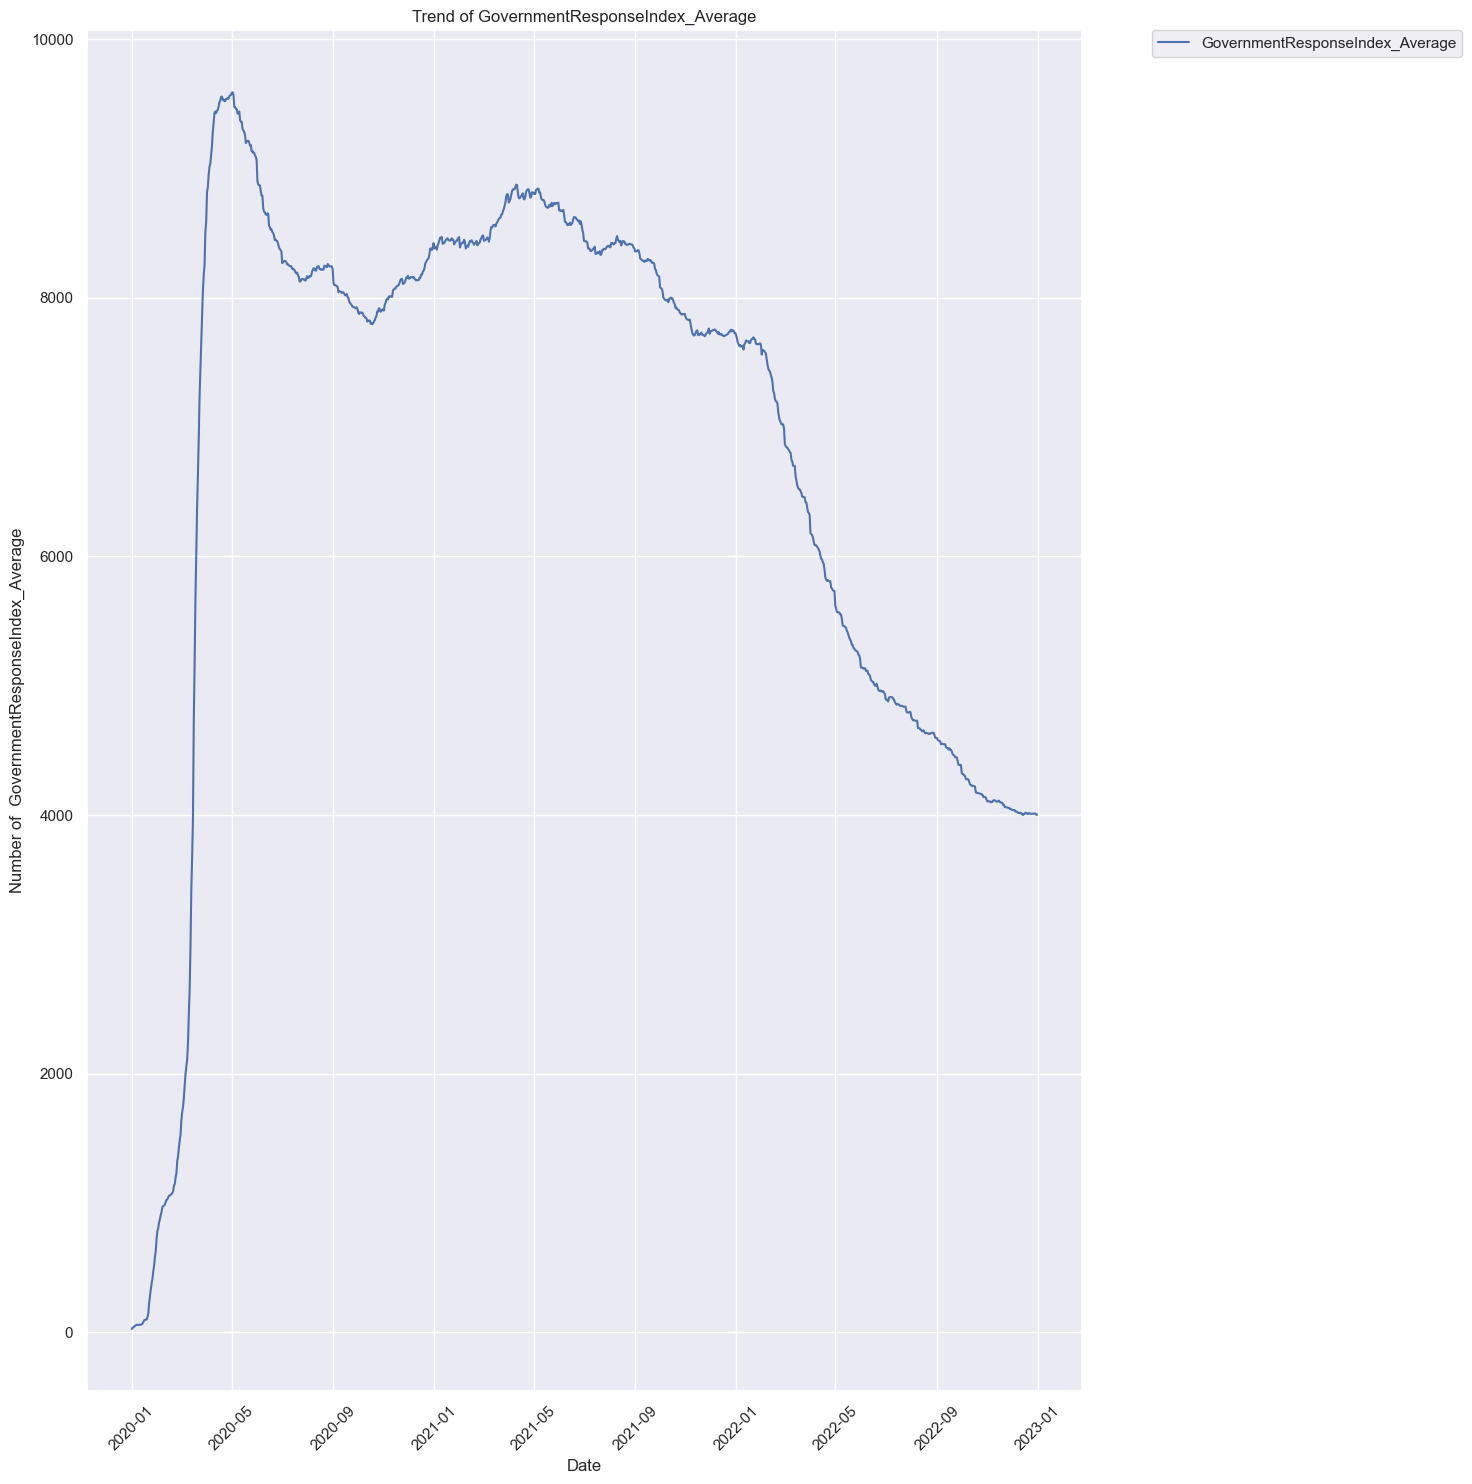

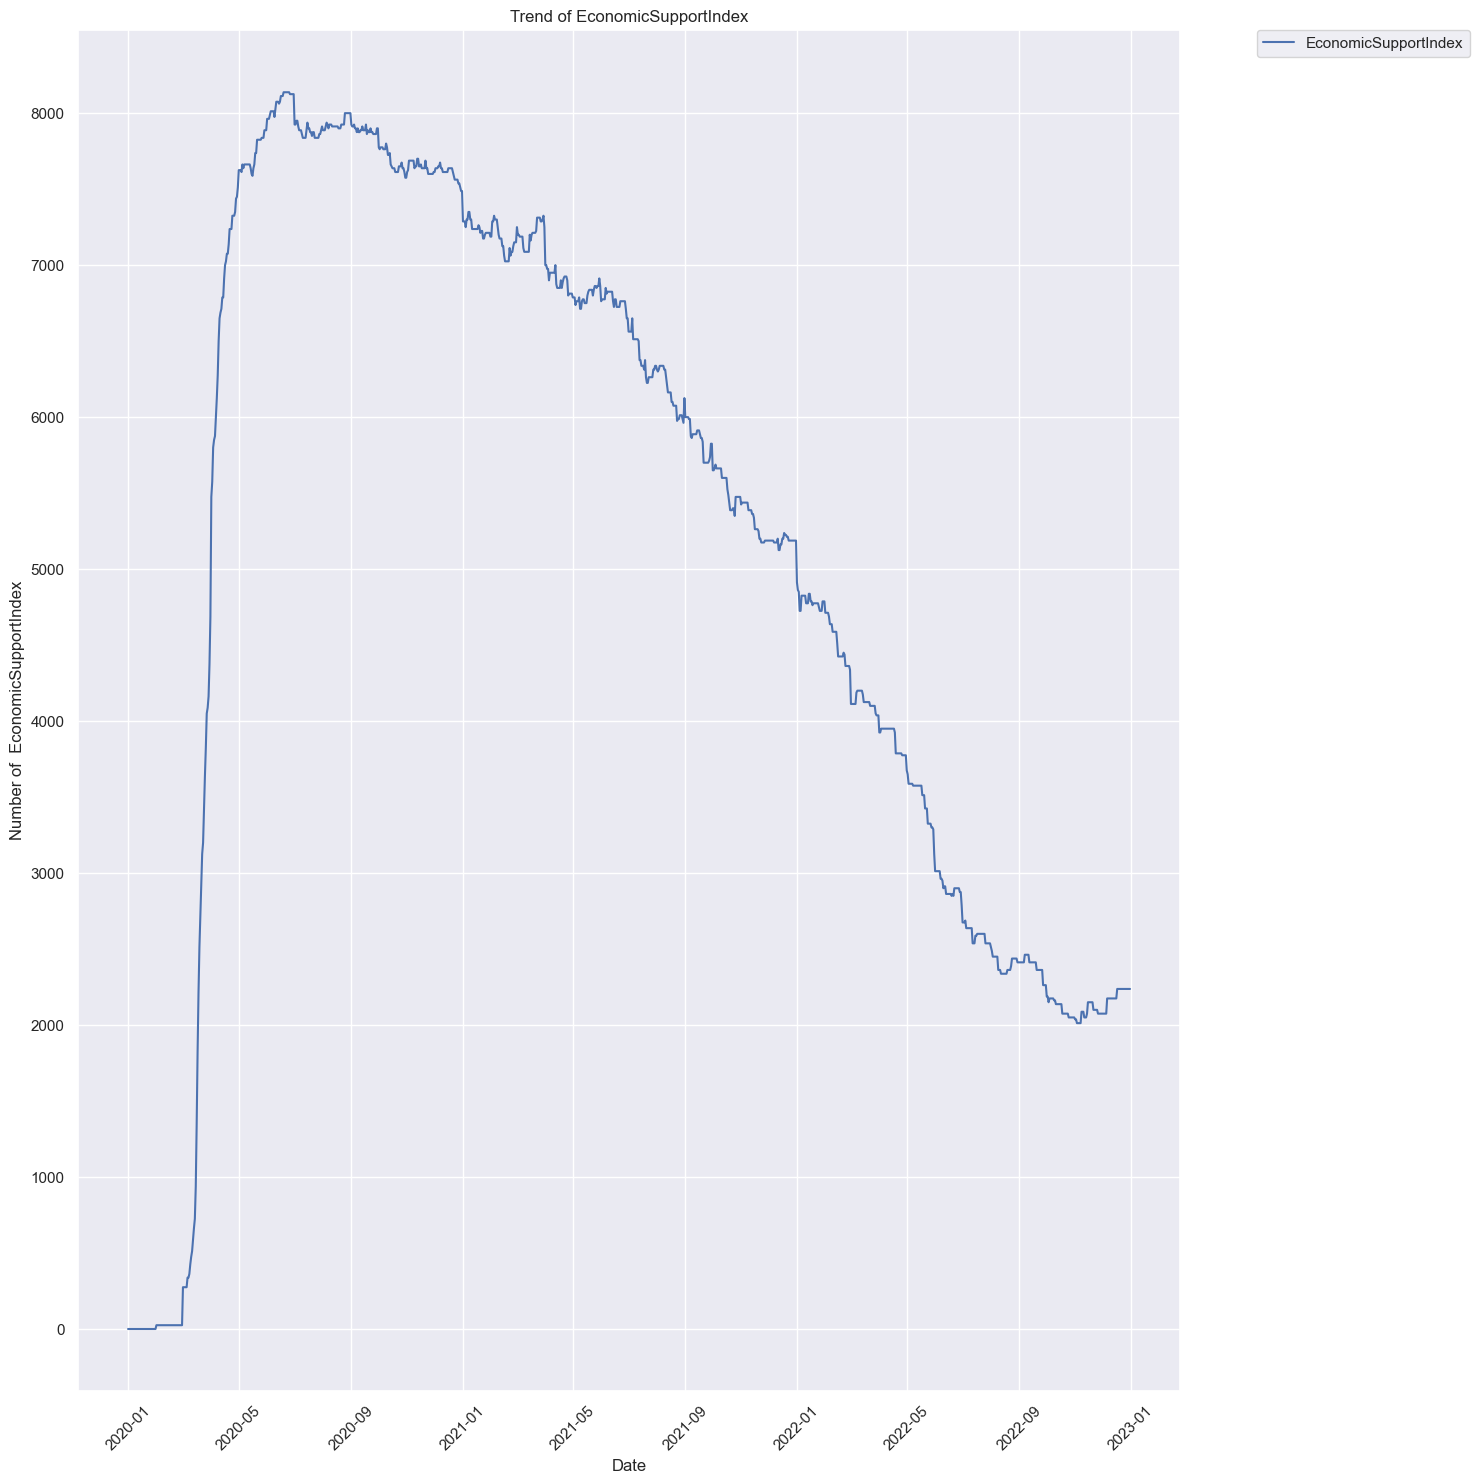

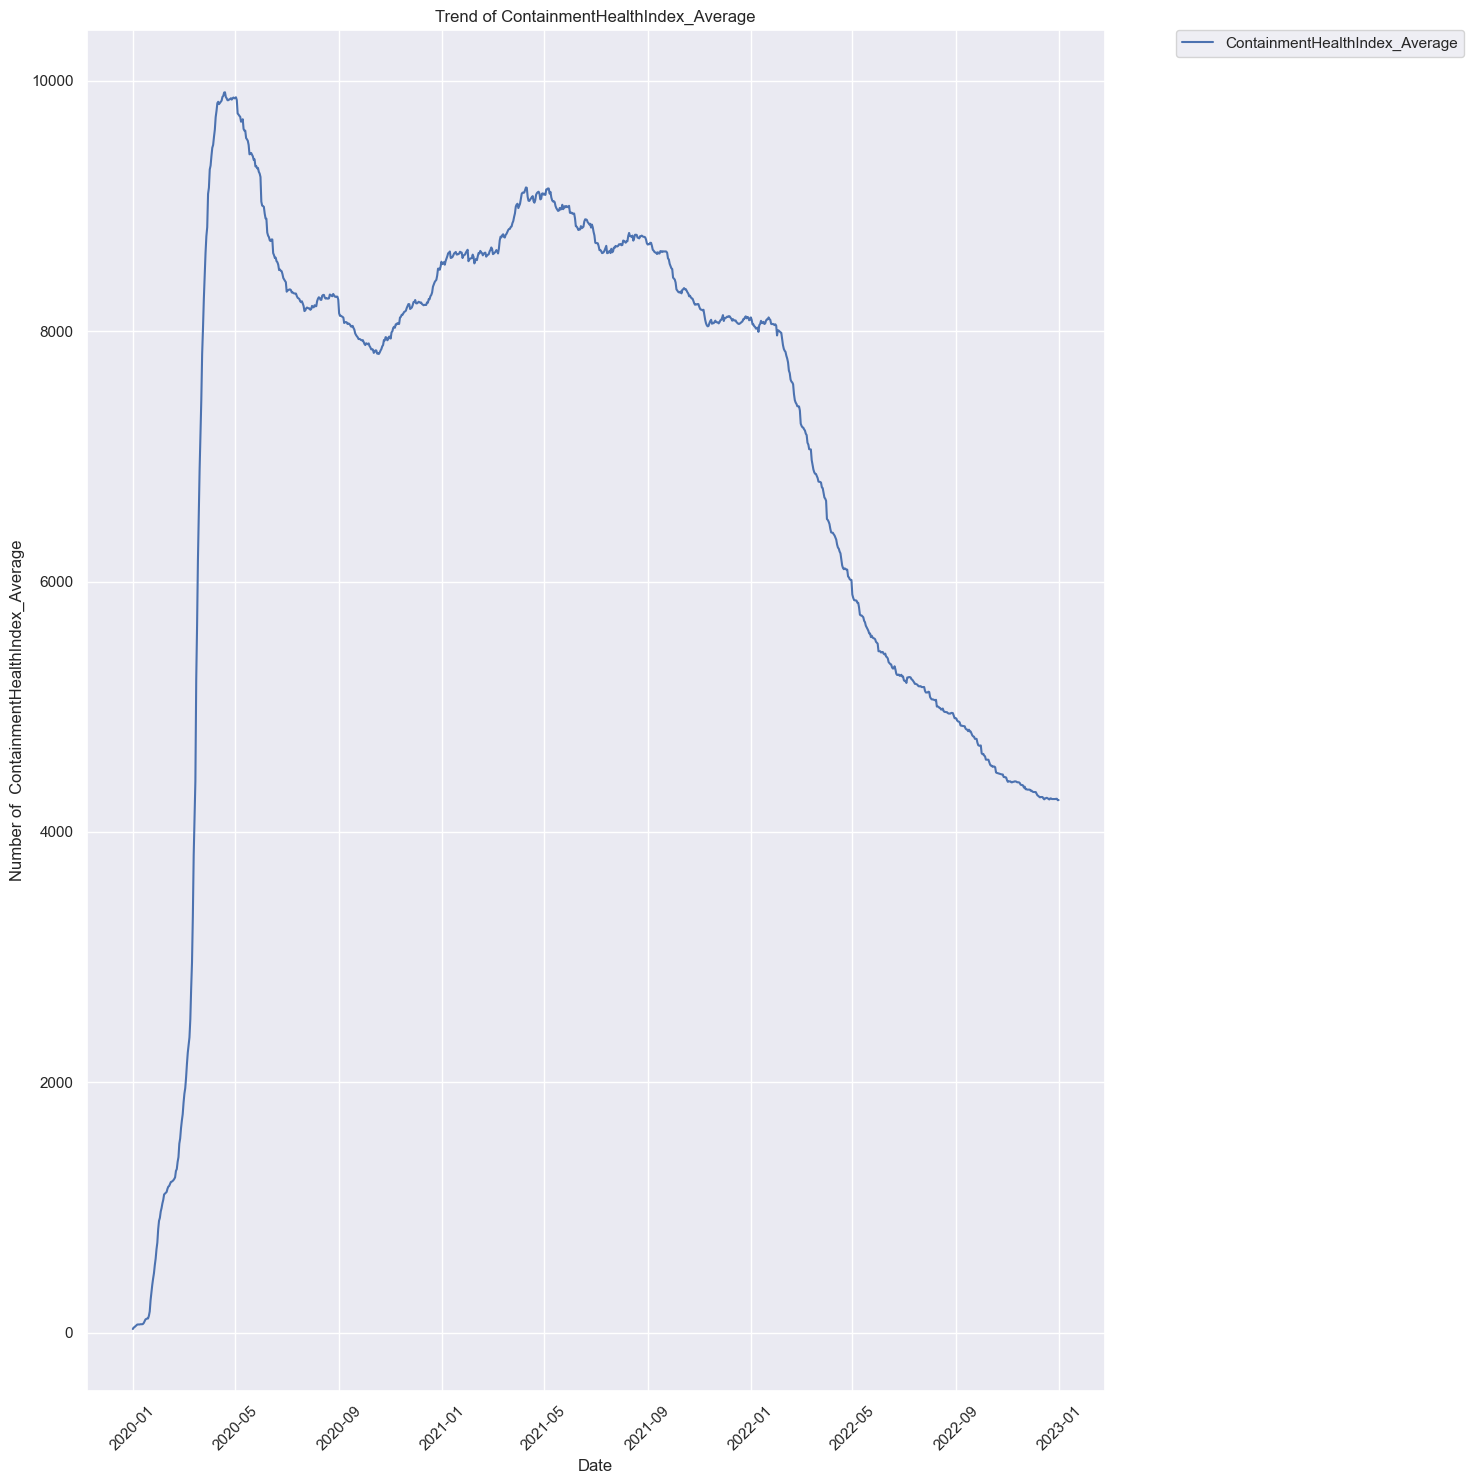

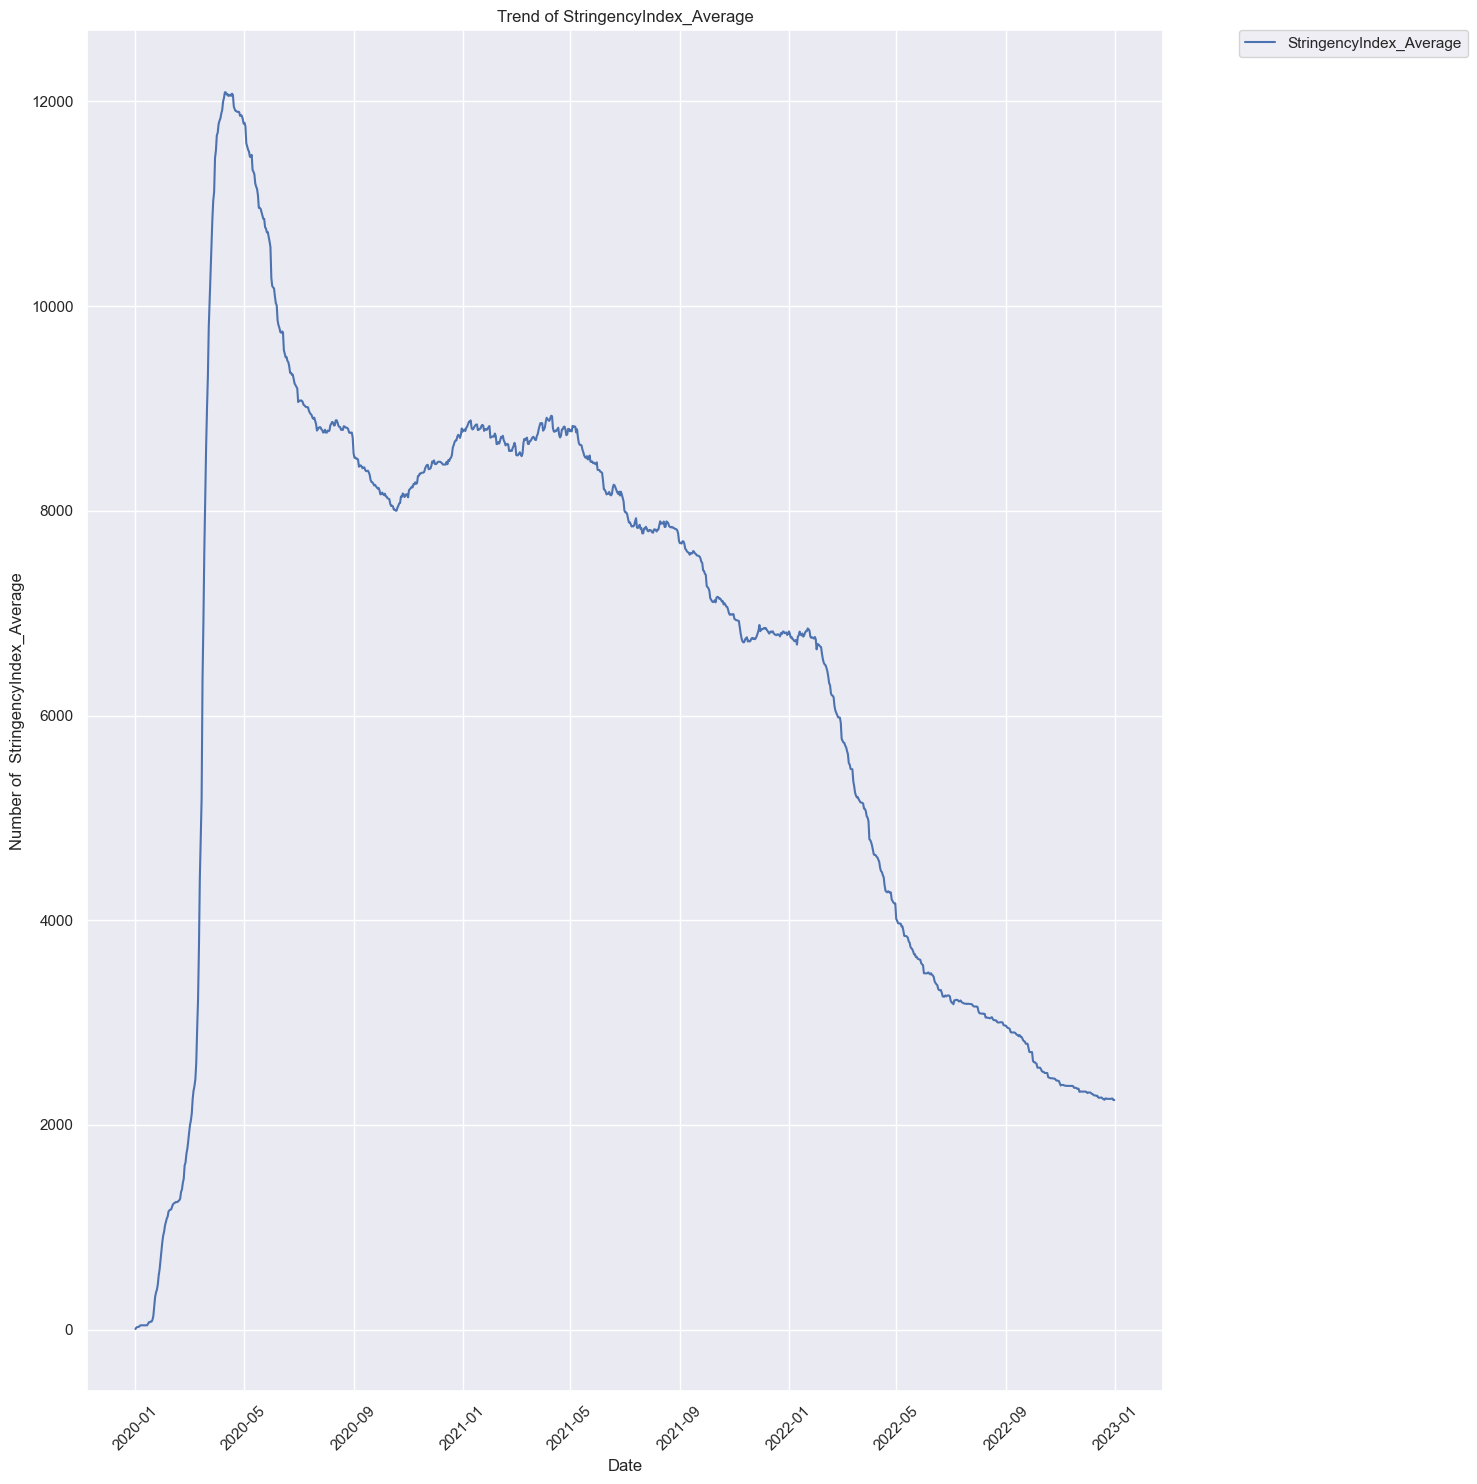

In [74]:
selected_columns = ['GovernmentResponseIndex_Average', 'EconomicSupportIndex', 'ContainmentHealthIndex_Average', 'StringencyIndex_Average']

for columns in selected_columns:
    plt.figure(figsize=(15, 15))       
    plt.plot(df_agg_date.index, df_agg_date[columns], label= columns)
    plt.title(f'Trend of {columns}')
    plt.xlabel('Date')
    plt.ylabel(f'Number of  {columns}')
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout()
    plt.show()

#### Monthly average 

In [71]:
#df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
#df_monthly.head(25)
#df_monthly.tail(25)

In [72]:
df_monthly.shape

(36, 56)

In [73]:
df_monthly['ConfirmedCases'] = df_monthly['ConfirmedCases'].replace(0, 1)
df_monthly['ConfirmedDeaths'] = df_monthly['ConfirmedDeaths'].replace(0, 1)
df_monthly['Mortality Rate'] = df_monthly['Mortality Rate'].replace(0, 1)


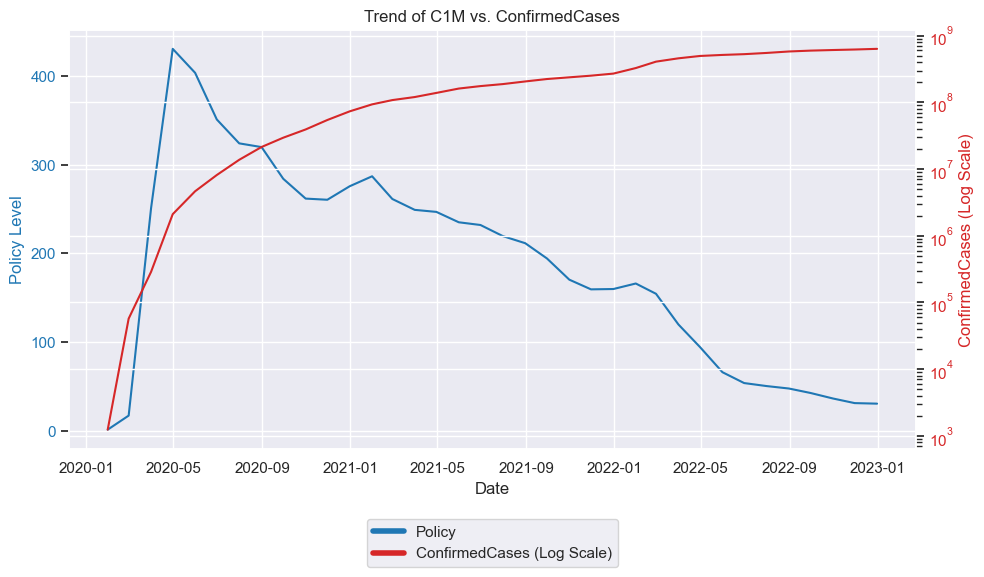

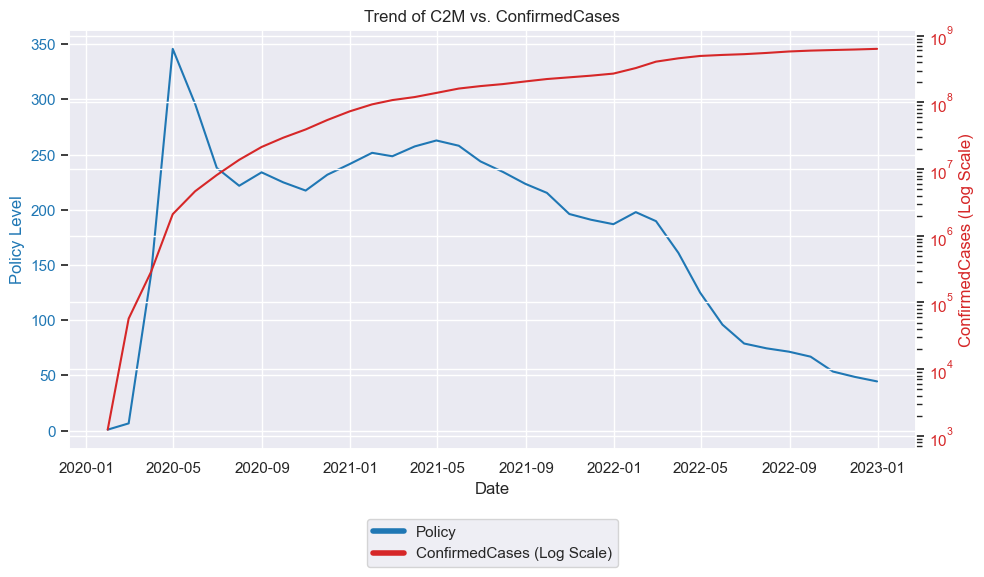

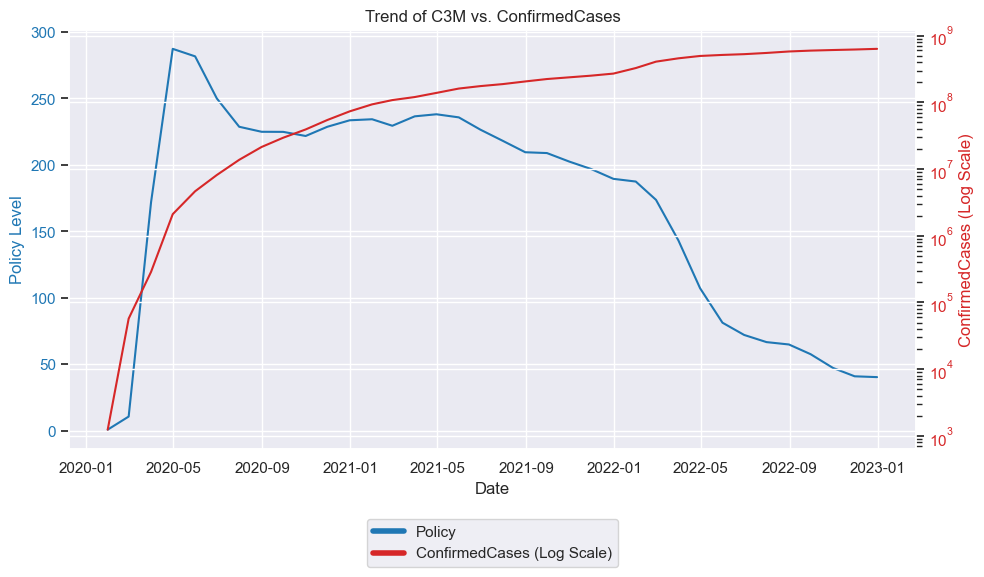

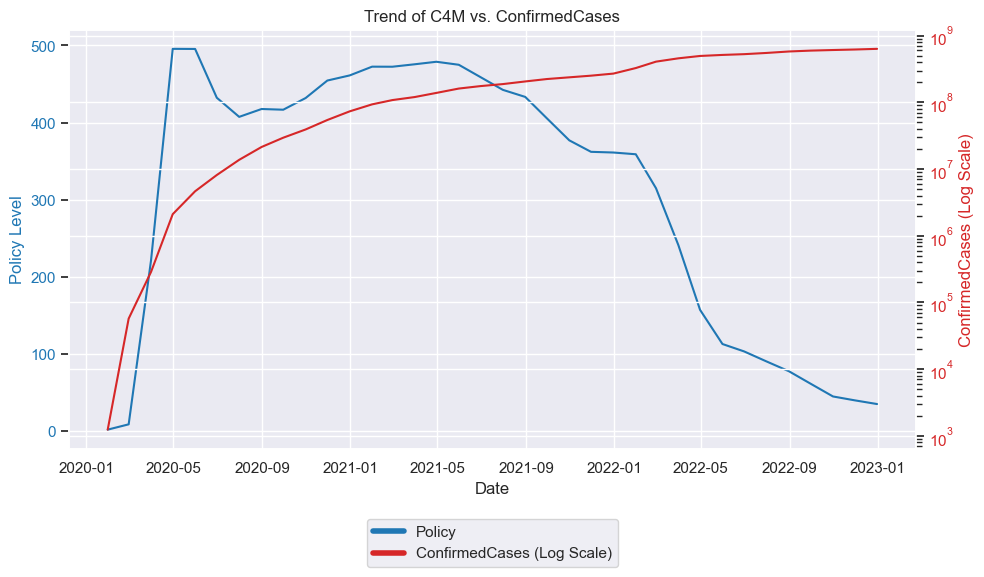

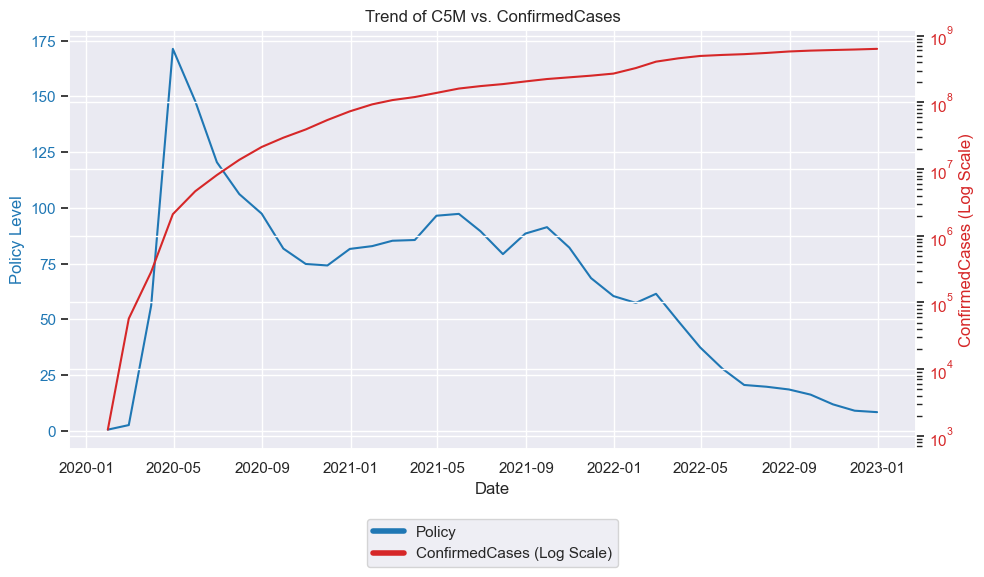

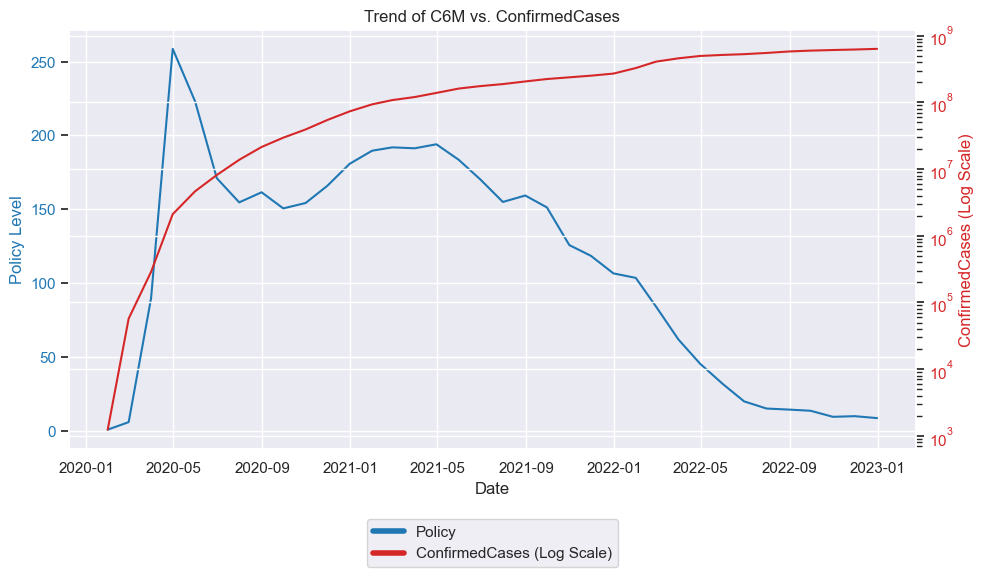

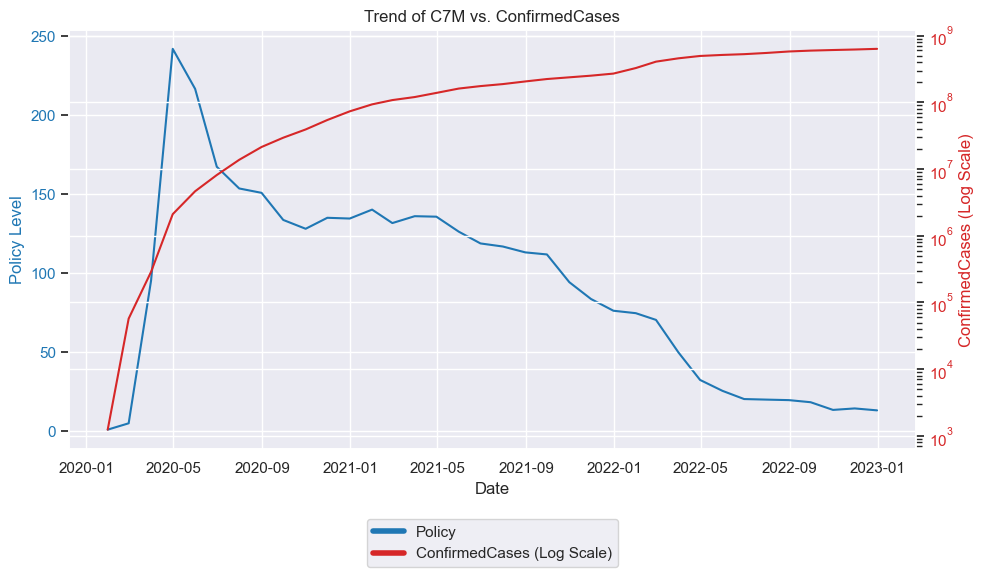

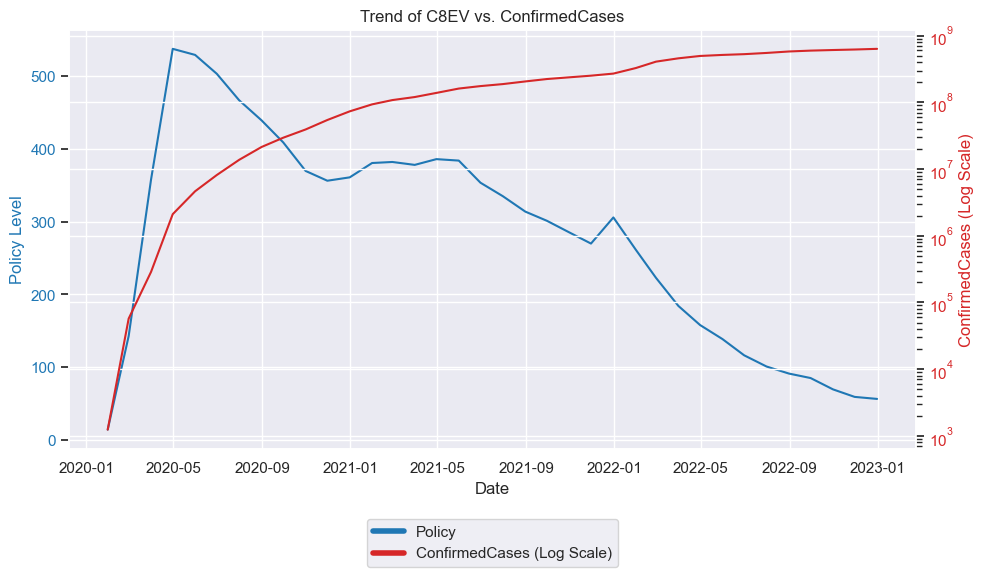

In [76]:
containment_policy_columns = ['C1M', 'C2M', 'C3M',
                              'C4M', 'C5M',
                              'C6M', 'C7M',
                              'C8EV']

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]

for policy in containment_policy_columns:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.lineplot(data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue', ax=ax1)
    ax1.set_ylabel('Policy Level', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.lineplot(data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red', ax=ax2)
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Trend of {policy} vs. ConfirmedCases')
    plt.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center',  bbox_to_anchor=(0.5, -0.15))

    plt.tight_layout()
    plt.show()

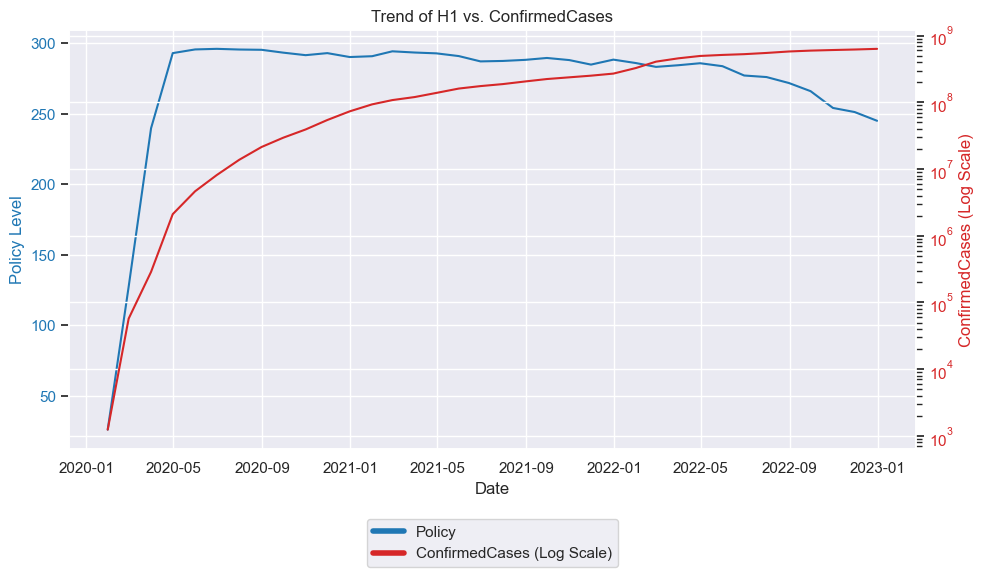

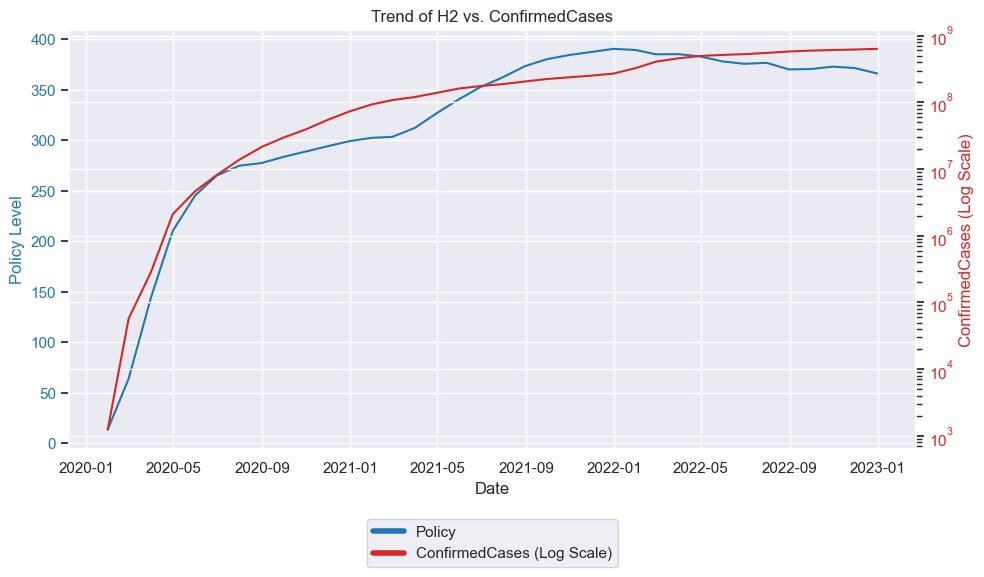

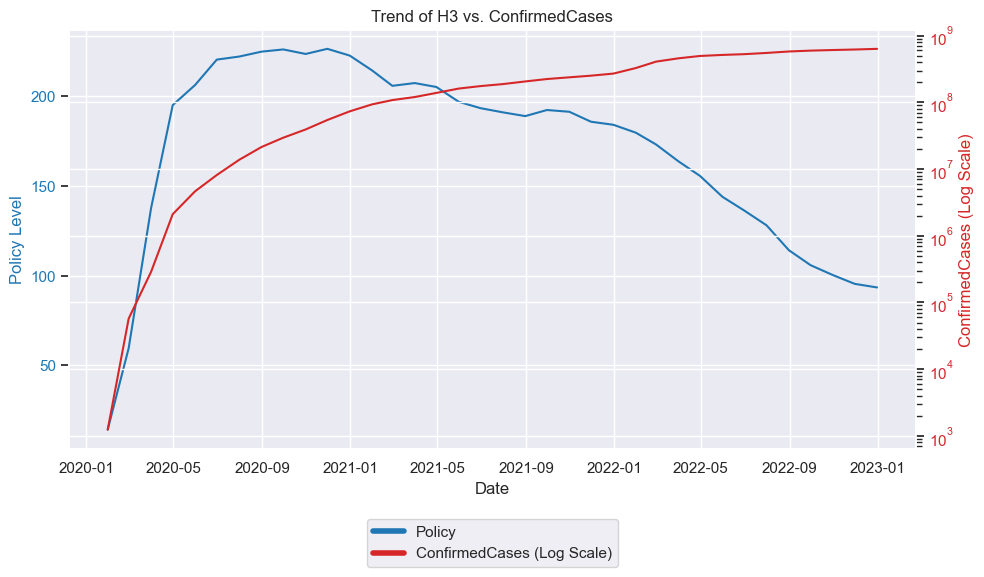

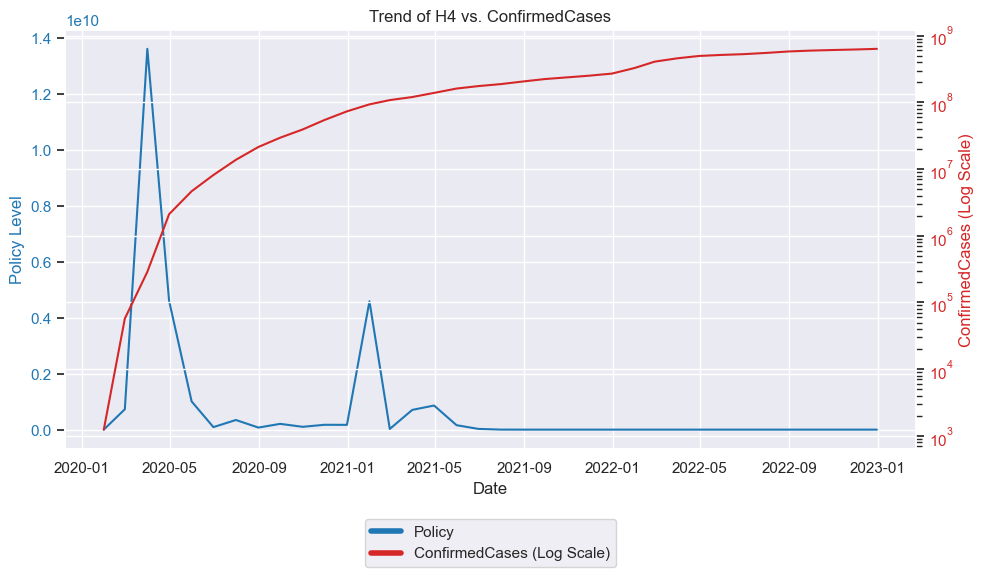

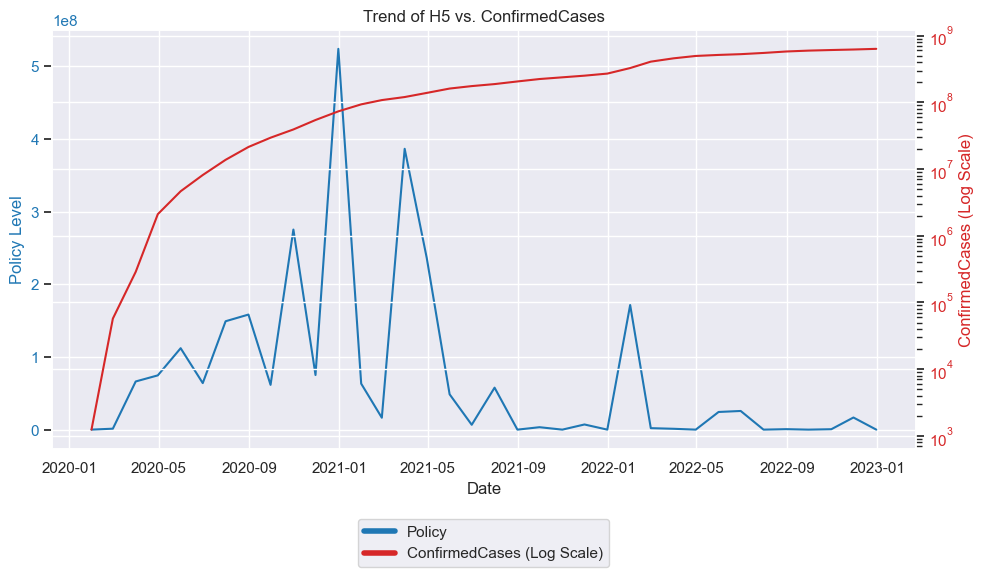

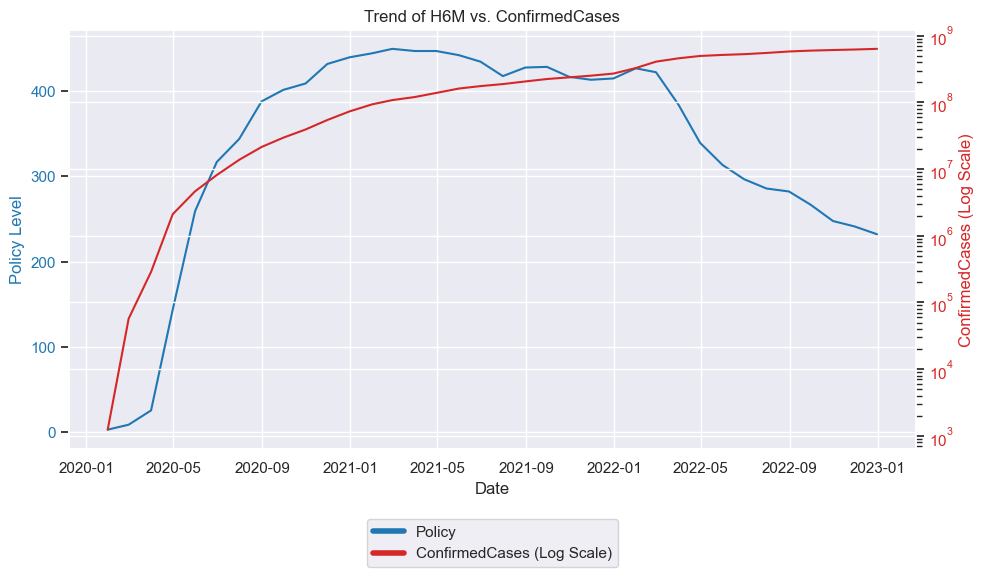

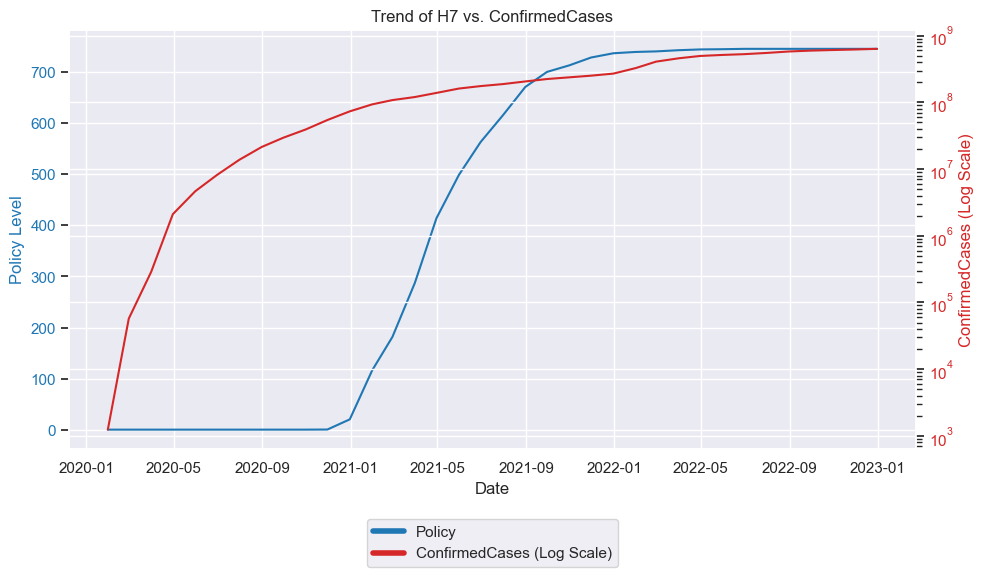

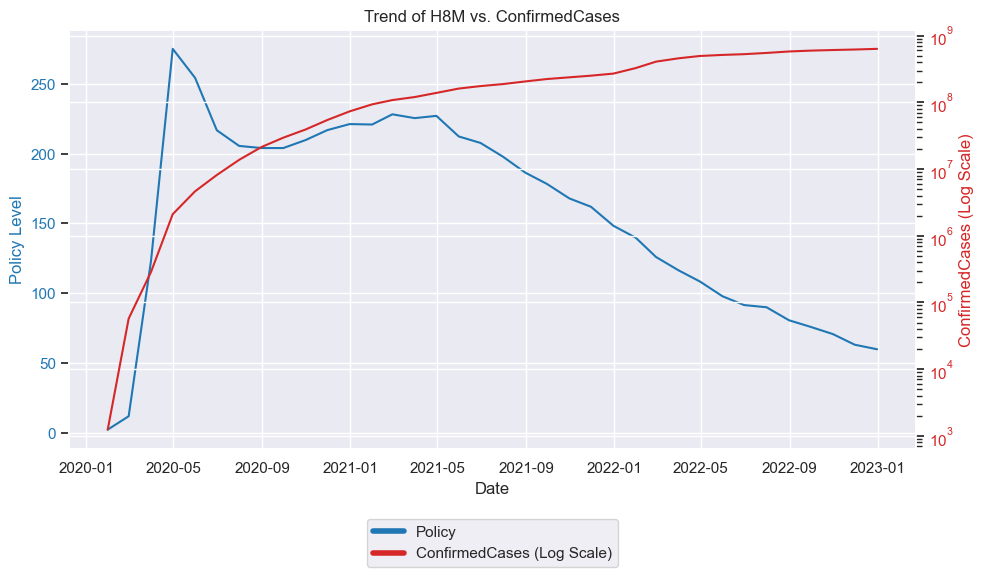

In [77]:
health_policy_columns = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H7', 'H8M']

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]

for policy in health_policy_columns:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.lineplot(data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue', ax=ax1)
    ax1.set_ylabel('Policy Level', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.lineplot(data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red', ax=ax2)
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Trend of {policy} vs. ConfirmedCases')
    plt.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', bbox_to_anchor=(0.5, -0.15))

    plt.tight_layout()
    plt.show()

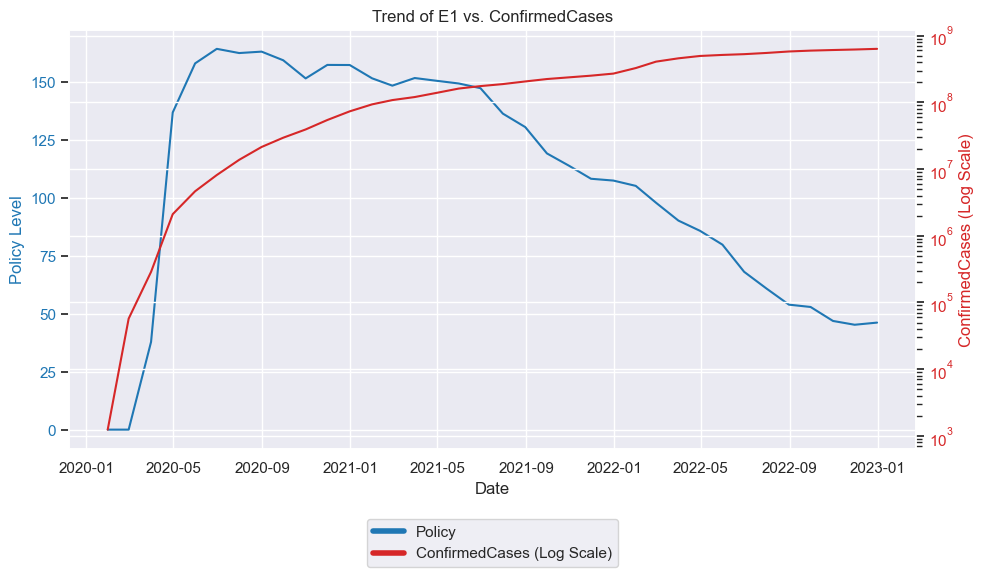

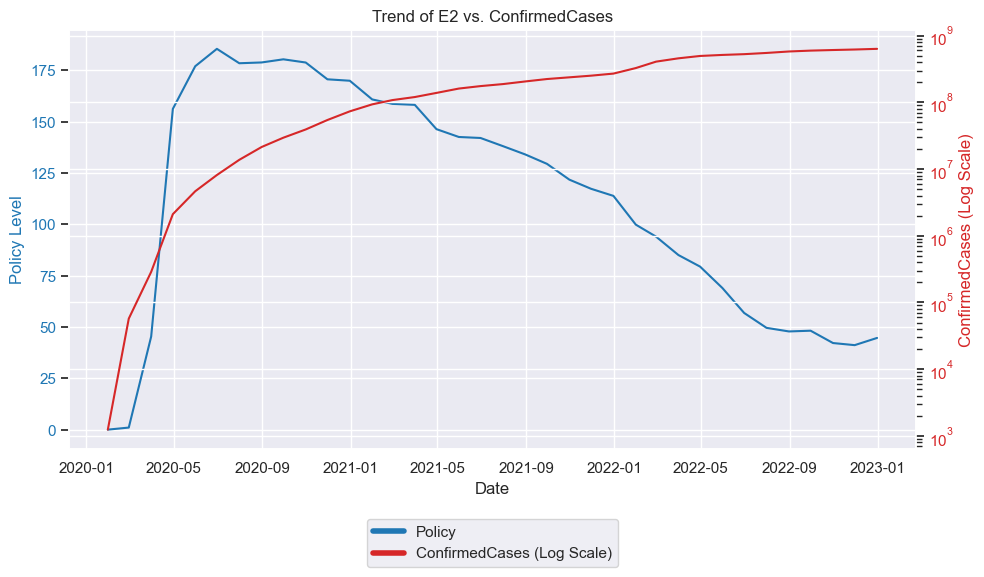

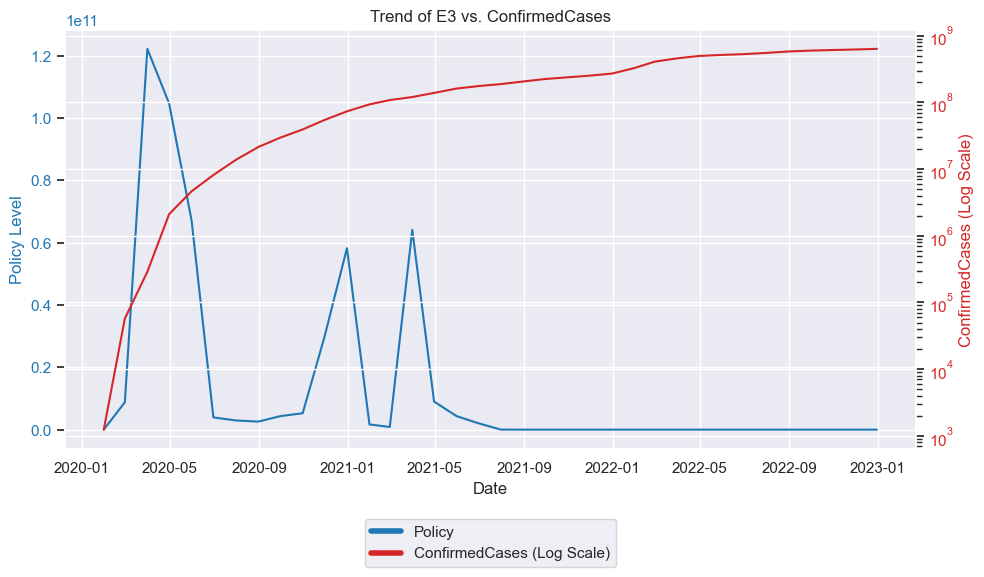

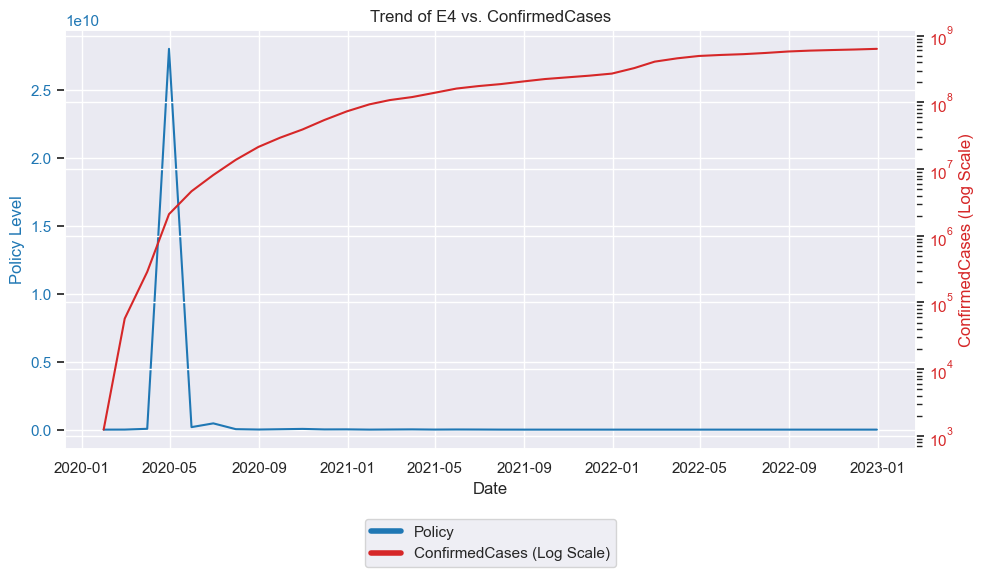

In [79]:
economic_policy_columns = ['E1', 'E2', 'E3', 'E4']

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]

for policy in economic_policy_columns:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.lineplot(data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue', ax=ax1)
    ax1.set_ylabel('Policy Level', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.lineplot(data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red', ax=ax2)
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Trend of {policy} vs. ConfirmedCases')
    plt.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', bbox_to_anchor=(0.5, -0.15))

    plt.tight_layout()
    plt.show()

In [80]:
df_monthly.head(1)

CountryCode       C1M  C1M_Flag       C2M  C2M_Flag  C3M  \
Date                                                                   
2020-01-31        150.0  1.354839  0.354839  0.903226  0.354839  1.0   

            C3M_Flag       C4M  C4M_Flag       C5M  C5M_Flag       C6M  \
Date                                                                     
2020-01-31   0.16129  1.612903   0.16129  0.580645       0.0  0.645161   

            C6M_Flag       C7M  C7M_Flag       C8EV   E1  E1_Flag   E2   E3  \
Date                                                                          
2020-01-31   0.16129  0.580645       0.0  14.064516  0.0      0.0  0.0  0.0   

             E4         H1    H1_Flag         H2         H3             H4  \
Date                                                                         
2020-01-31  0.0  26.064516  15.354839  13.612903  14.096774  580780.774194   

                     H5       H6M  H6M_Flag   H7  H7_Flag       H8M  H8M_Flag  \
Date                                                                            
2020-01-31  7966.483871  3.193548  1.354839  0.0      0.0  2.451613  1.129032   

             V1  V2A  V2B  V2C  V2D  V2E_Education  V2F  V2G   V3   V4  \
Date                                                                     
2020-01-31  0.0  0.0  0.0  0.0  0.0            0.0  0.0  0.0  1.0  0.0   

            ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  \
Date                                                              
2020-01-31     1238.516129        28.741935               150.0   

            PopulationVaccinated  StringencyIndex_Average  \
Date                                                        
2020-01-31                   0.0               200.747097   

            GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
Date                                                                          
2020-01-31                       194.452903                      222.258065   

            EconomicSupportIndex    Population  GDP_Per_Capita  \
Date                                                             
2020-01-31                   0.0  7.355623e+09     3080960.053   

            Life_Expectancy  Hospital_Beds_Per_Thousand  Mortality Rate  
Date                                                                     
2020-01-31         11075.51                      442.24        0.000021

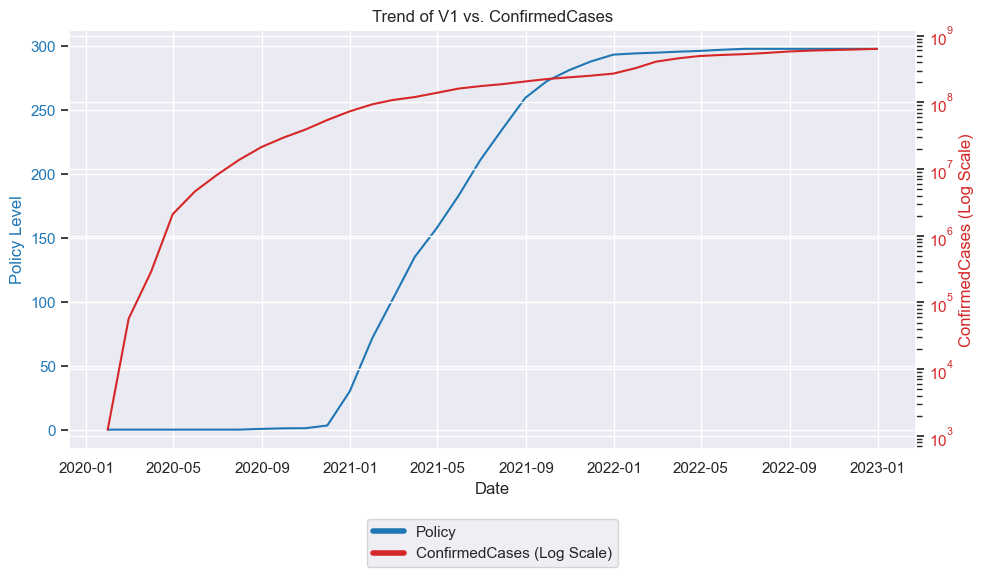

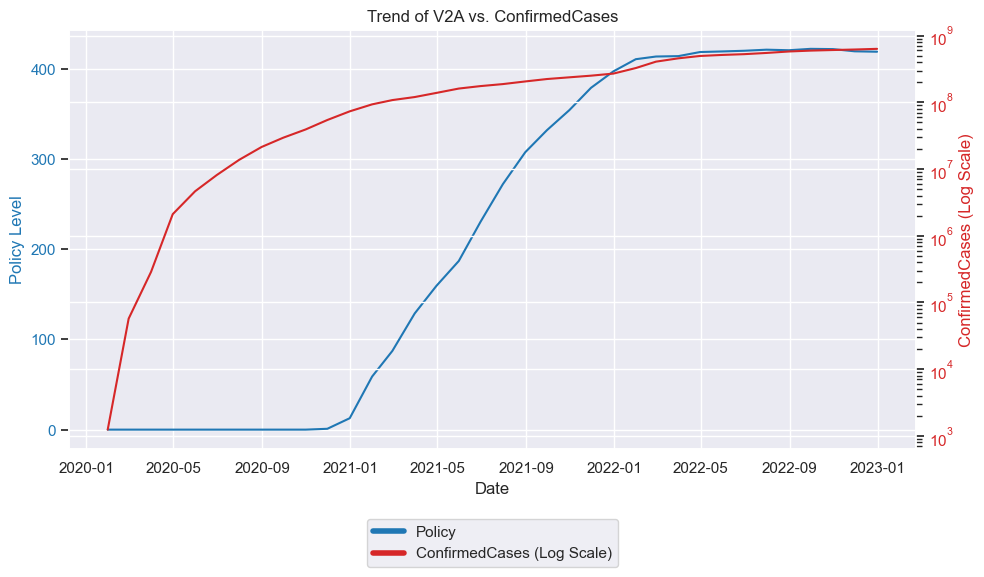

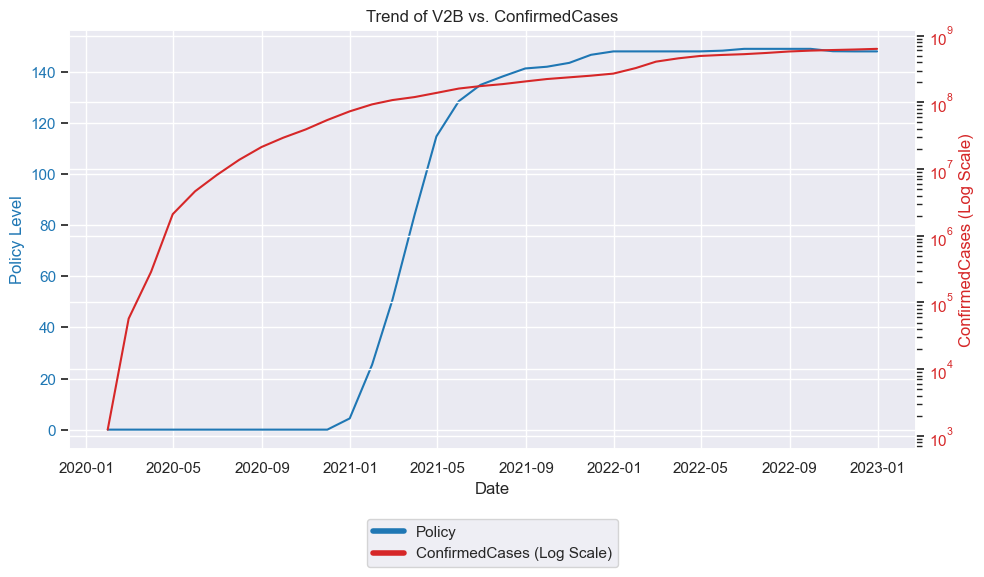

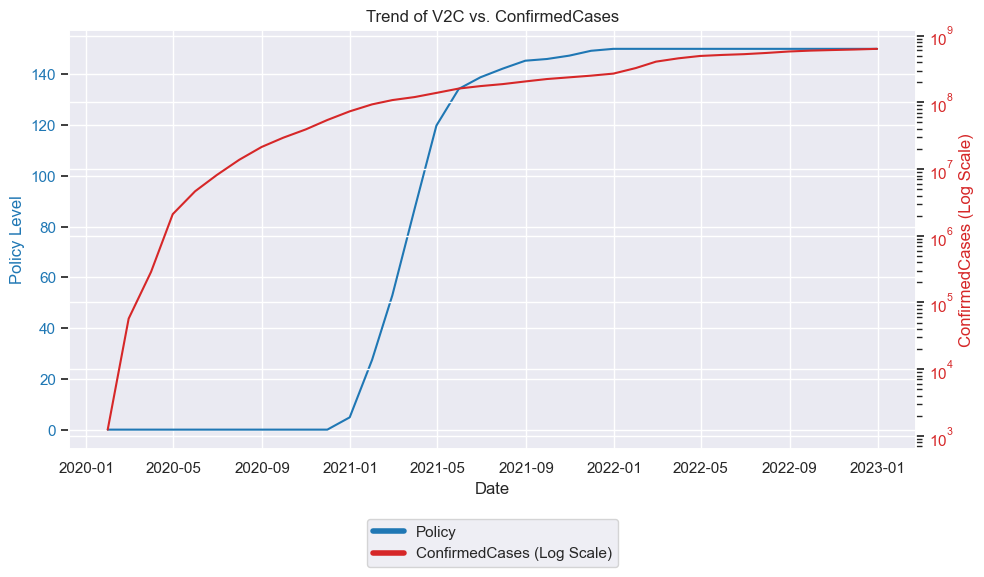

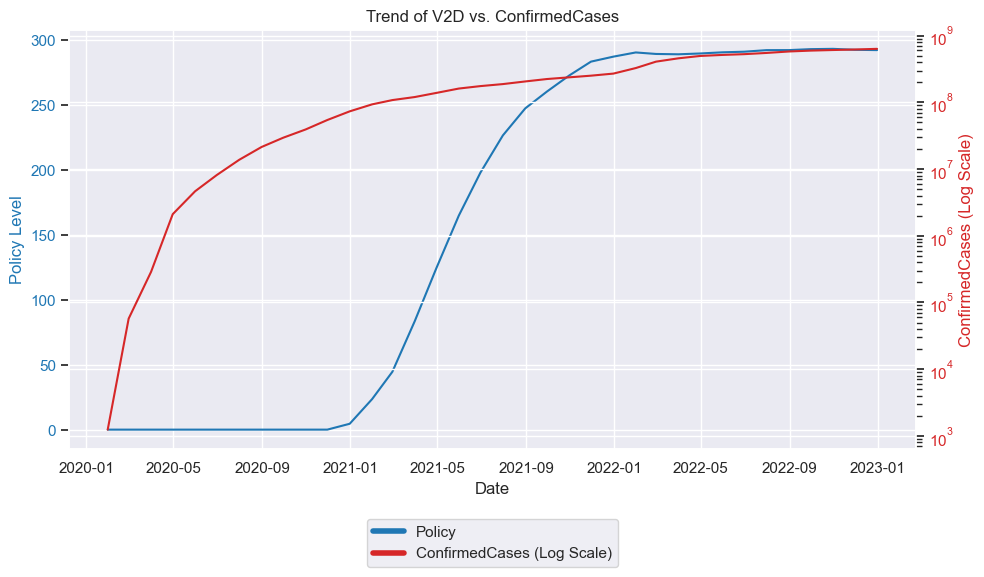

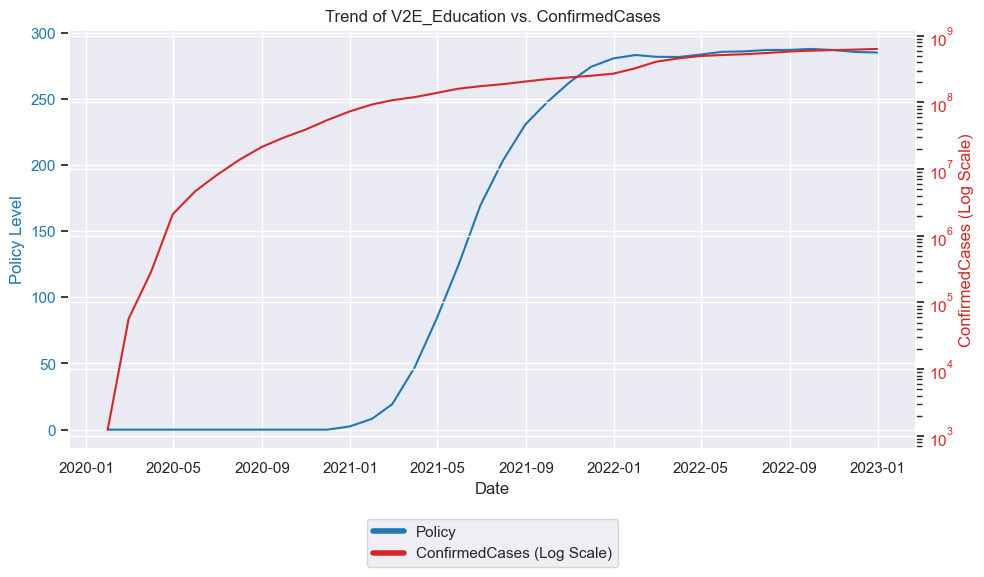

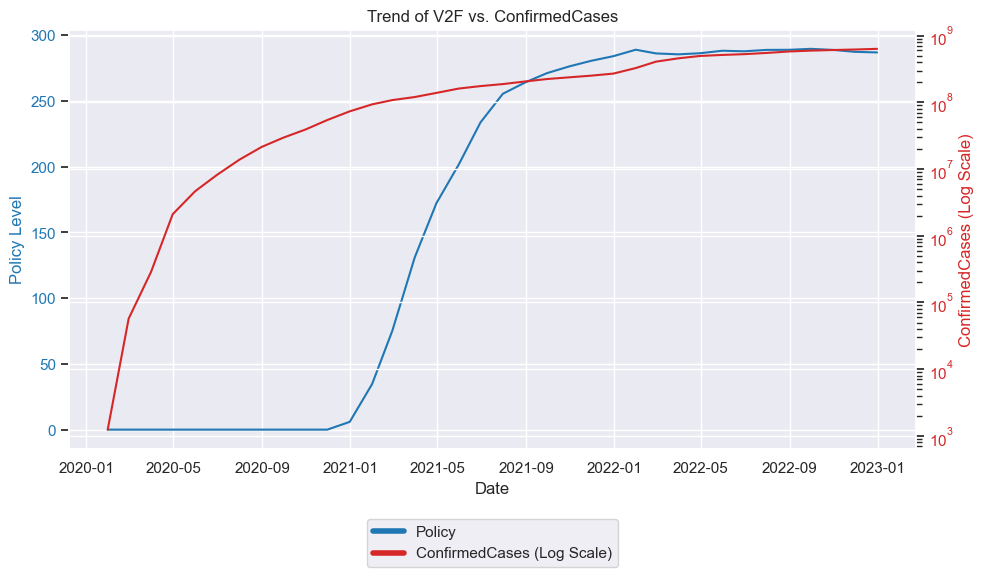

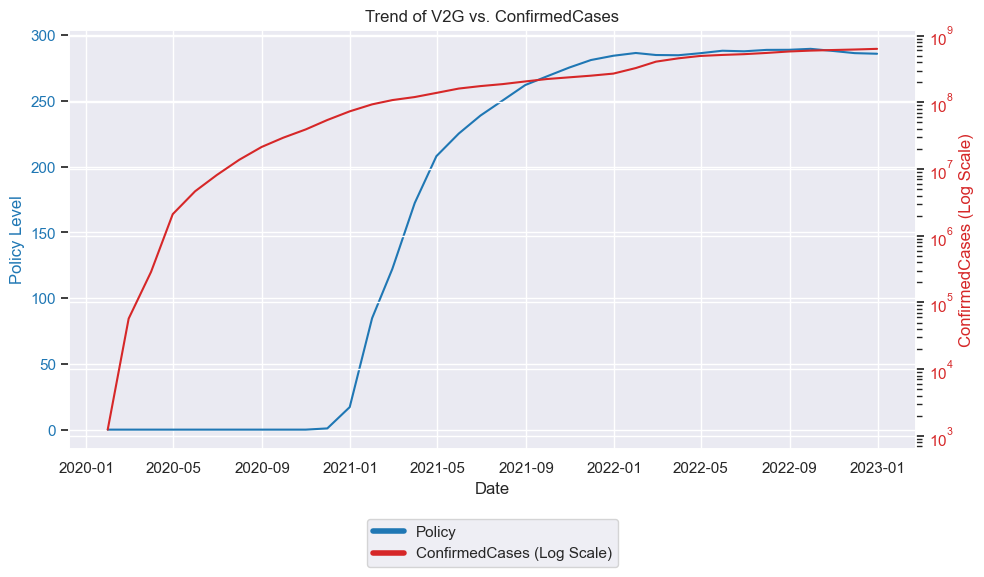

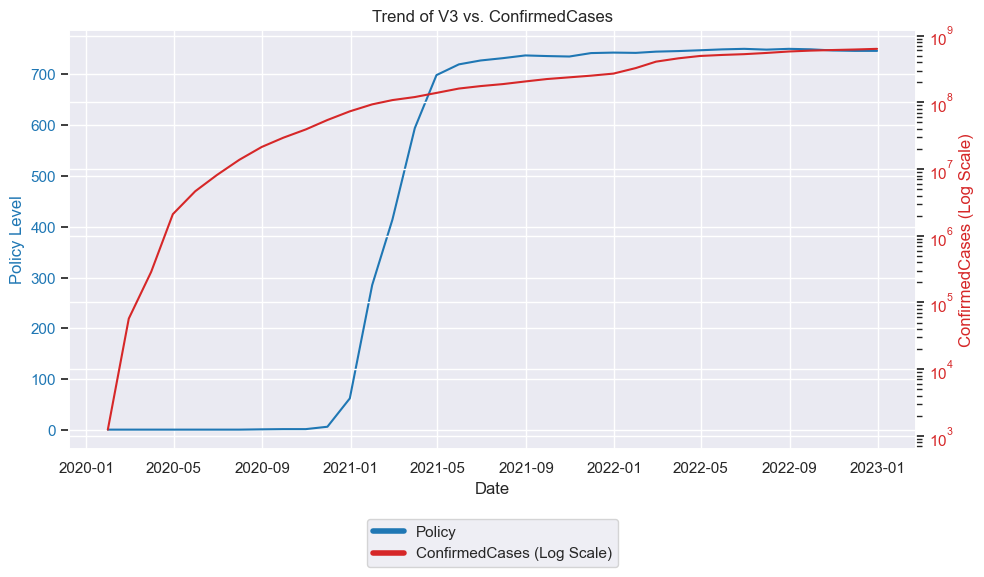

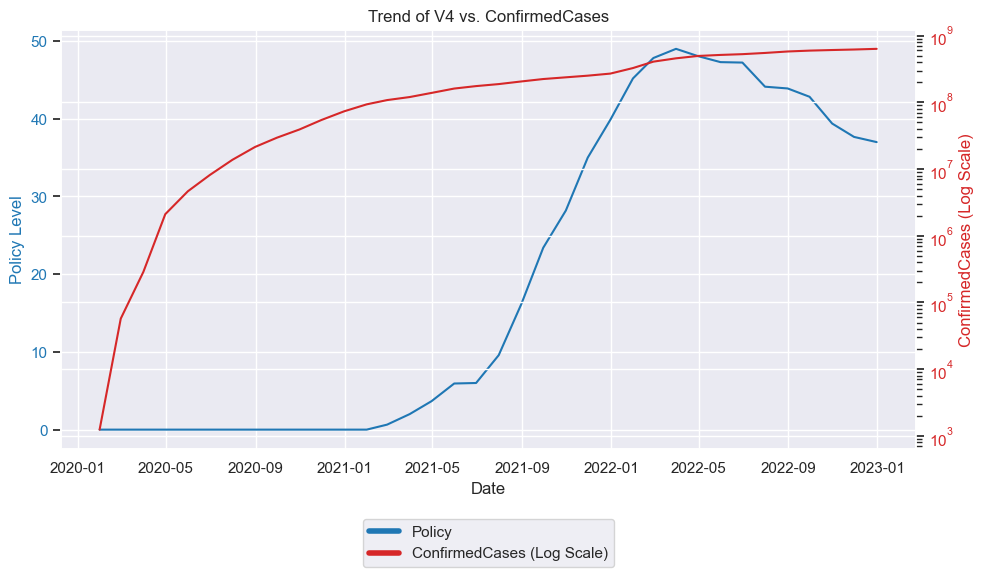

In [81]:
vaccination_policy_columns = ['V1', 'V2A', 'V2B', 'V2C', 'V2D', 'V2E_Education', 'V2F', 'V2G', 'V3', 'V4']

custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]

for policy in vaccination_policy_columns:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.lineplot(data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue', ax=ax1)
    ax1.set_ylabel('Policy Level', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    sns.lineplot(data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red', ax=ax2)
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(f'Trend of {policy} vs. ConfirmedCases')
    plt.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', bbox_to_anchor=(0.5, -0.15))

    plt.tight_layout()
    plt.show()

#### Trends with Average Indexes    

##### Confirmed Cases

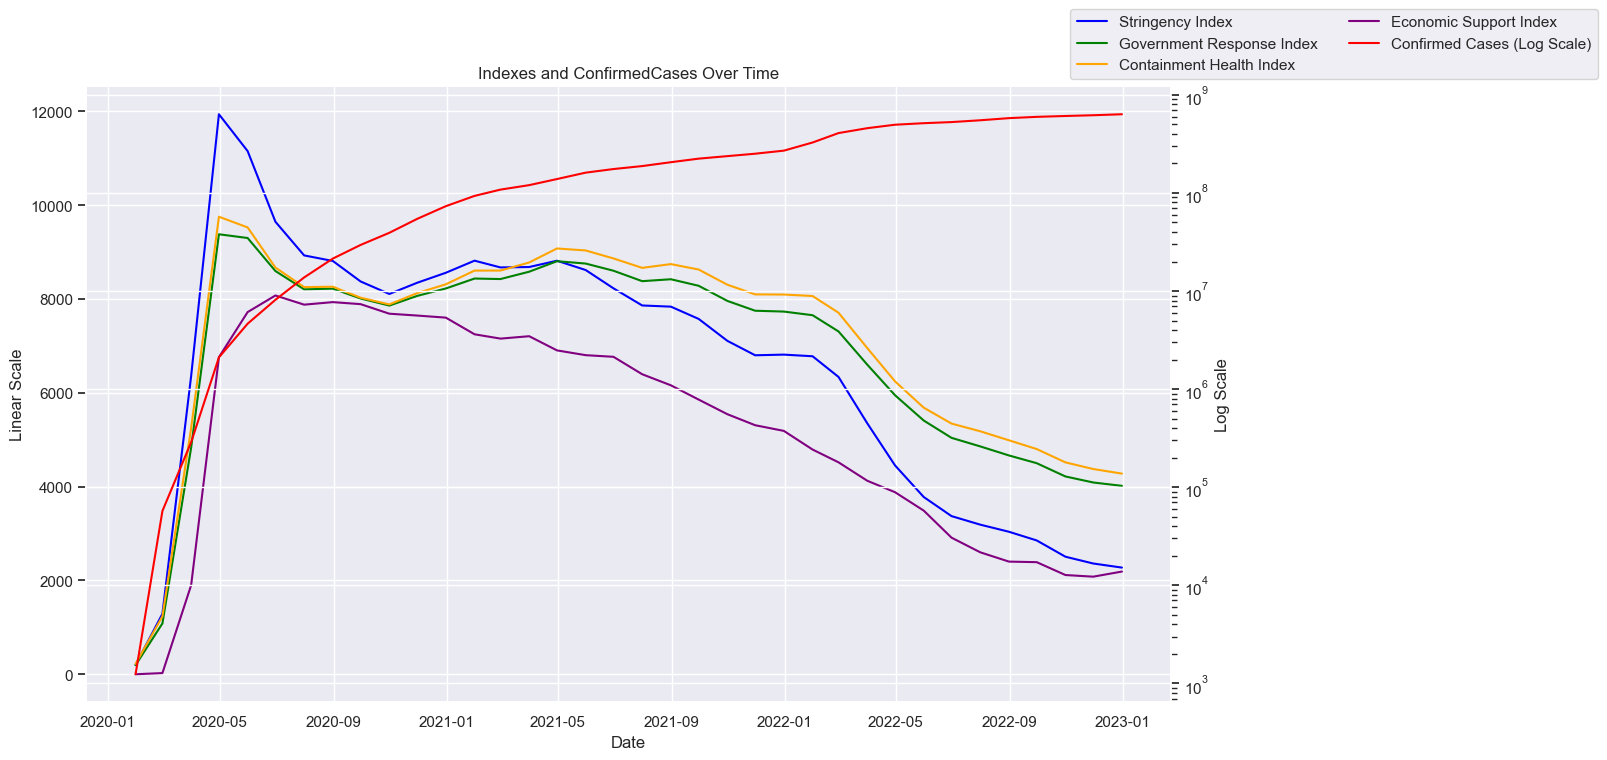

In [82]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

##### Confirmed Deaths

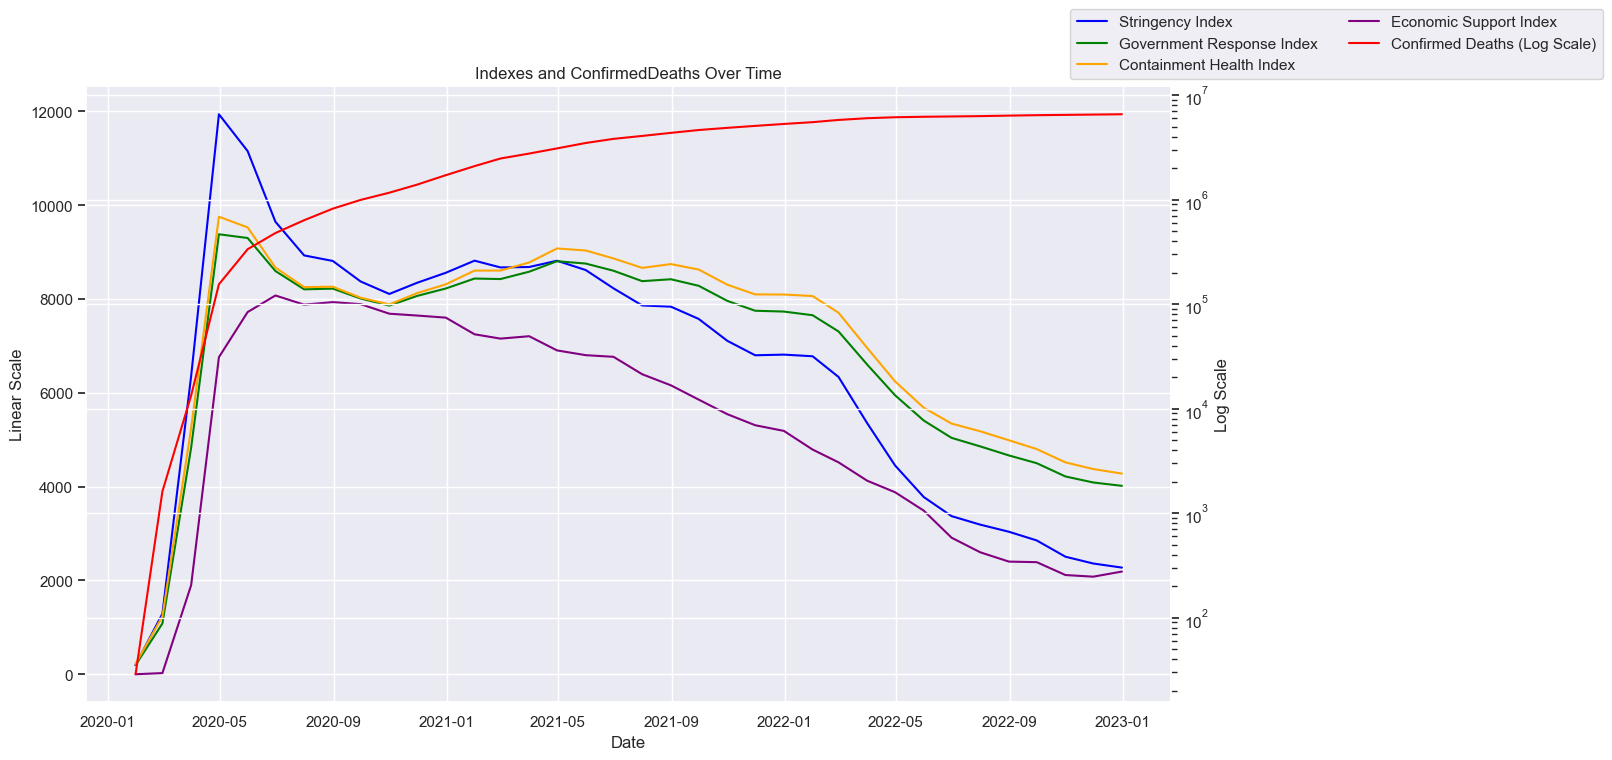

In [83]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedDeaths Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Deaths (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

##### Mortality Rate

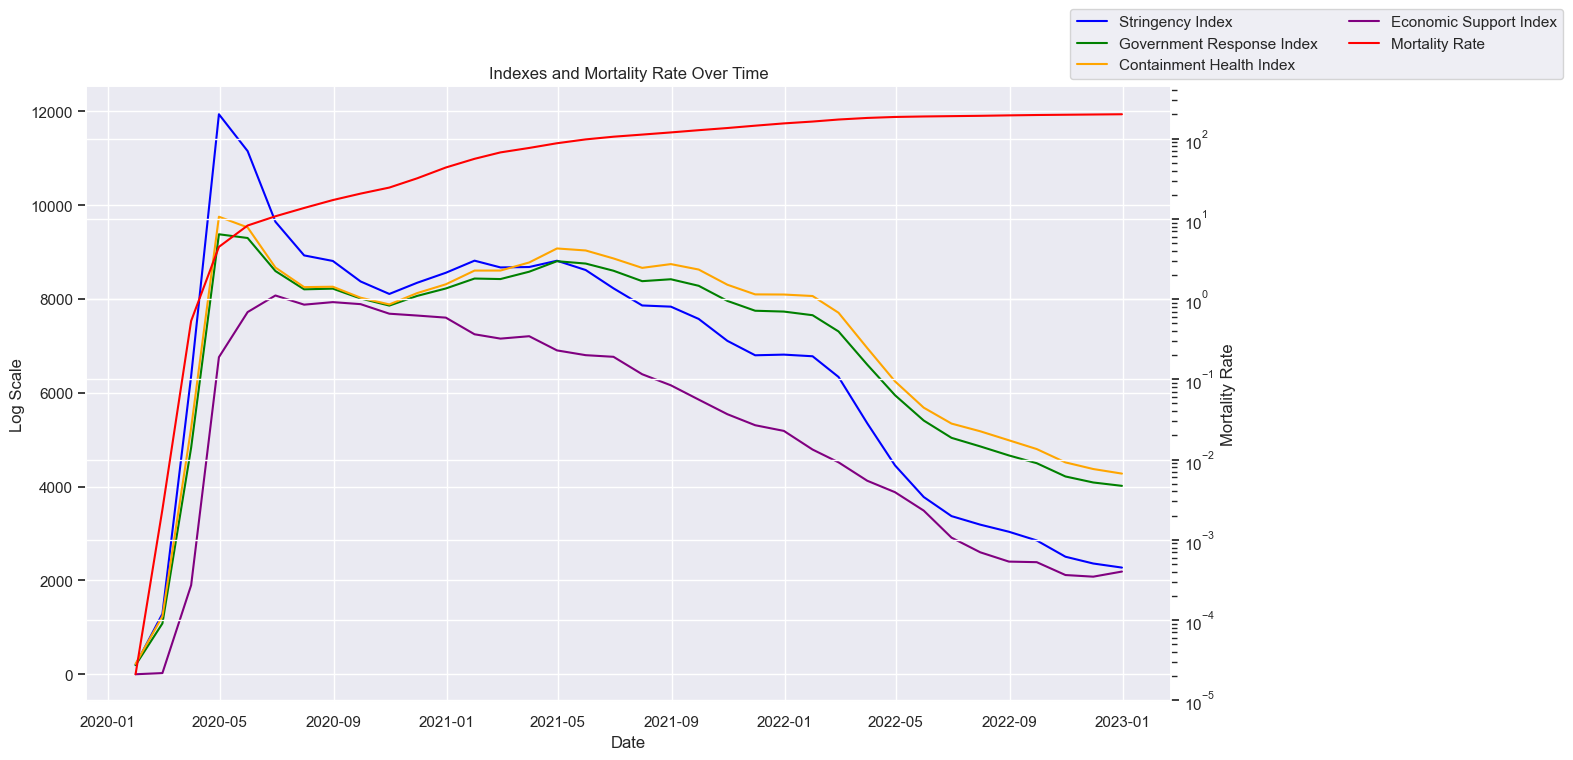

In [84]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and Mortality Rate Over Time')
ax1.set_xlabel('Date')

ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Mortality Rate', data=df_monthly, color=colors[4], ax=ax2, label='Mortality Rate', legend=None)
ax2.set_yscale('log')
ax1.set_ylabel('Log Scale')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

### GSA

In [85]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

In [86]:
orld = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)
df2.head()

C1M  C1M_Flag     C2M  C2M_Flag     C3M  C3M_Flag     C4M  \
CountryCode                                                                 
ABW             0.0       0.0     0.0       0.0     0.0       0.0     0.0   
AFG          1018.0     472.0  1629.0     254.0  1188.0     340.0   700.0   
AGO             0.0       0.0     0.0       0.0     0.0       0.0     0.0   
ALB          1370.0     800.0  1309.0     798.0  1238.0     783.0  2685.0   
AND             0.0       0.0     0.0       0.0     0.0       0.0     0.0   

             C4M_Flag    C5M  C5M_Flag     C6M  C6M_Flag    C7M  C7M_Flag  \
CountryCode                                                                 
ABW               0.0    0.0       0.0     0.0       0.0    0.0       0.0   
AFG             135.0  732.0     181.0   352.0       0.0  370.0      63.0   
AGO               0.0    0.0       0.0     0.0       0.0    0.0       0.0   
ALB             783.0  262.0      73.0  1276.0     720.0  272.0     122.0   
AND               0.0    0.0       0.0     0.0       0.0    0.0       0.0   

               C8EV     E1  E1_Flag     E2           E3           E4      H1  \
CountryCode                                                                    
ABW             0.0    0.0      0.0    0.0          0.0          0.0     0.0   
AFG          1488.0    0.0      0.0   31.0          0.0  152400000.0   756.0   
AGO             0.0    0.0      0.0    0.0          0.0          0.0     0.0   
ALB          1293.0  753.0    644.0  841.0  540068949.8          0.0  1889.0   
AND             0.0    0.0      0.0    0.0          0.0          0.0     0.0   

             H1_Flag      H2     H3           H4           H5     H6M  \
CountryCode                                                             
ABW              0.0     0.0    0.0          0.0          0.0     0.0   
AFG            531.0   705.0  396.0  248977750.0  113000000.0  2439.0   
AGO              0.0     0.0    0.0          0.0          0.0     0.0   
ALB           1052.0  2073.0  995.0   26000000.0    6900000.0  2537.0   
AND              0.0     0.0    0.0          0.0          0.0     0.0   

             H6M_Flag      H7  H7_Flag     H8M  H8M_Flag    V1   V2A  V2B  \
CountryCode                                                                 
ABW               0.0     0.0      0.0     0.0       0.0     0     0    0   
AFG             921.0  3193.0    677.0   572.0     122.0  1324  1302  625   
AGO               0.0     0.0      0.0     0.0       0.0     0     0    0   
ALB             999.0  2972.0    720.0  1648.0     810.0  1286  1651  713   
AND               0.0     0.0      0.0     0.0       0.0     0     0    0   

             V2C     V2D  V2E_Education     V2F     V2G    V3     V4  \
CountryCode                                                            
ABW            0     0.0            0.0     0.0     0.0     0    0.0   
AFG          625  1250.0         1281.0  1302.0  1302.0  3385    0.0   
AGO            0     0.0            0.0     0.0     0.0     0    0.0   
ALB          713  1086.0         1185.0  1258.0  1247.0  3600  458.0   
AND            0     0.0            0.0     0.0     0.0     0    0.0   

             ConfirmedCases  ConfirmedDeaths  MajorityVaccinated  \
CountryCode                                                        
ABW                     0.0              0.0                   0   
AFG             115803695.0        4885625.0                1096   
AGO                     0.0              0.0                   0   
ALB             162838359.0        2240822.0                1096   
AND                     0.0              0.0                   0   

             PopulationVaccinated  StringencyIndex_Average  \
CountryCode                                                  
ABW                          0.00                     0.00   
AFG                       6615.74                 30024.46   
AGO                          0.00                     0.00   
ALB                      21189.

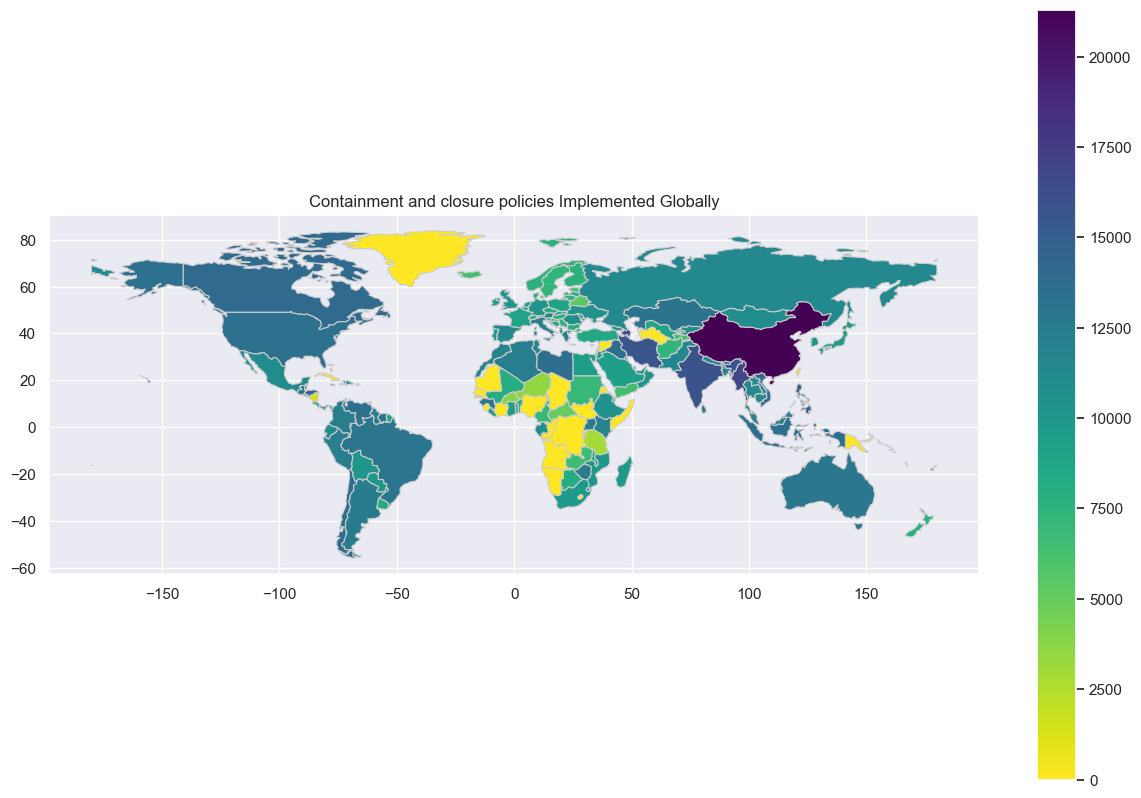

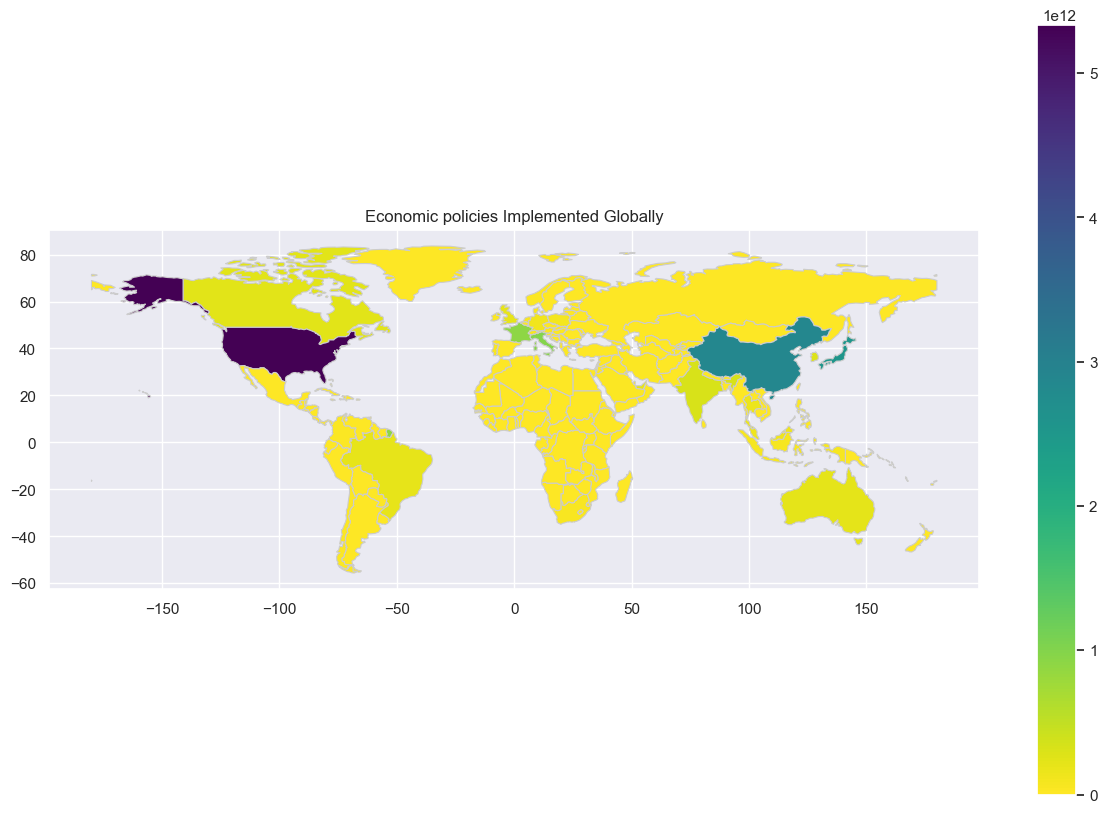

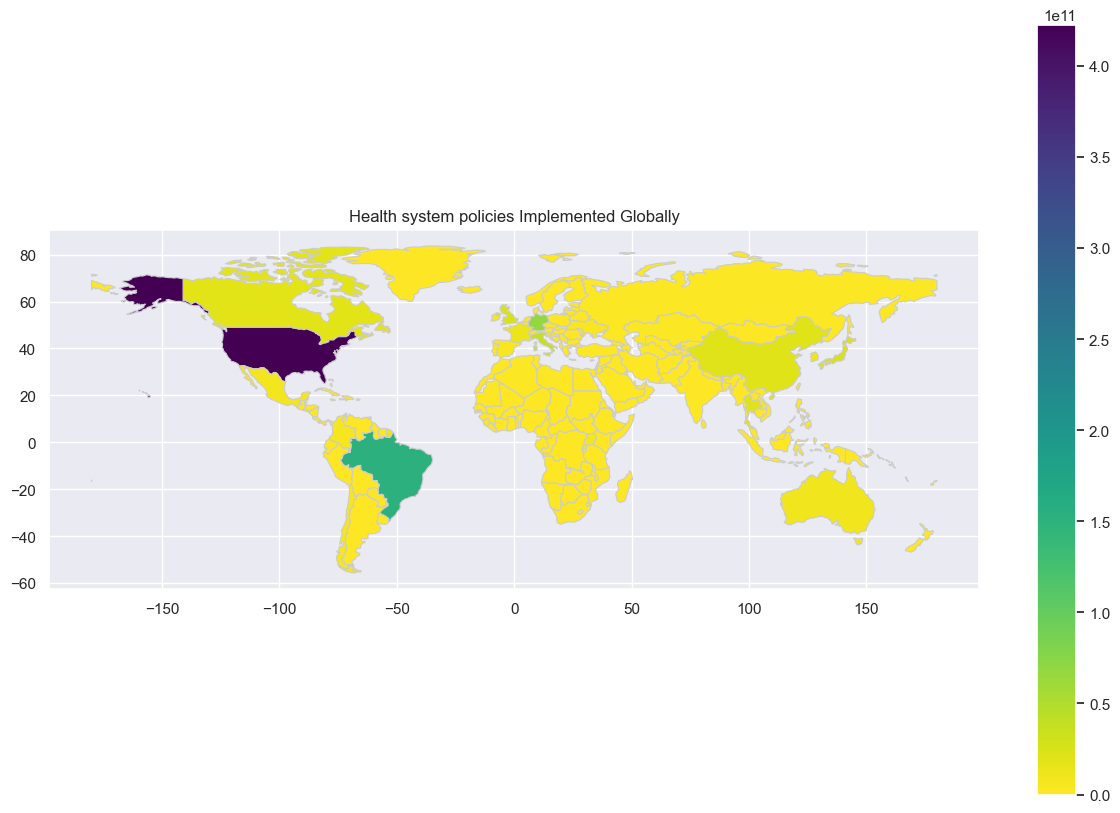

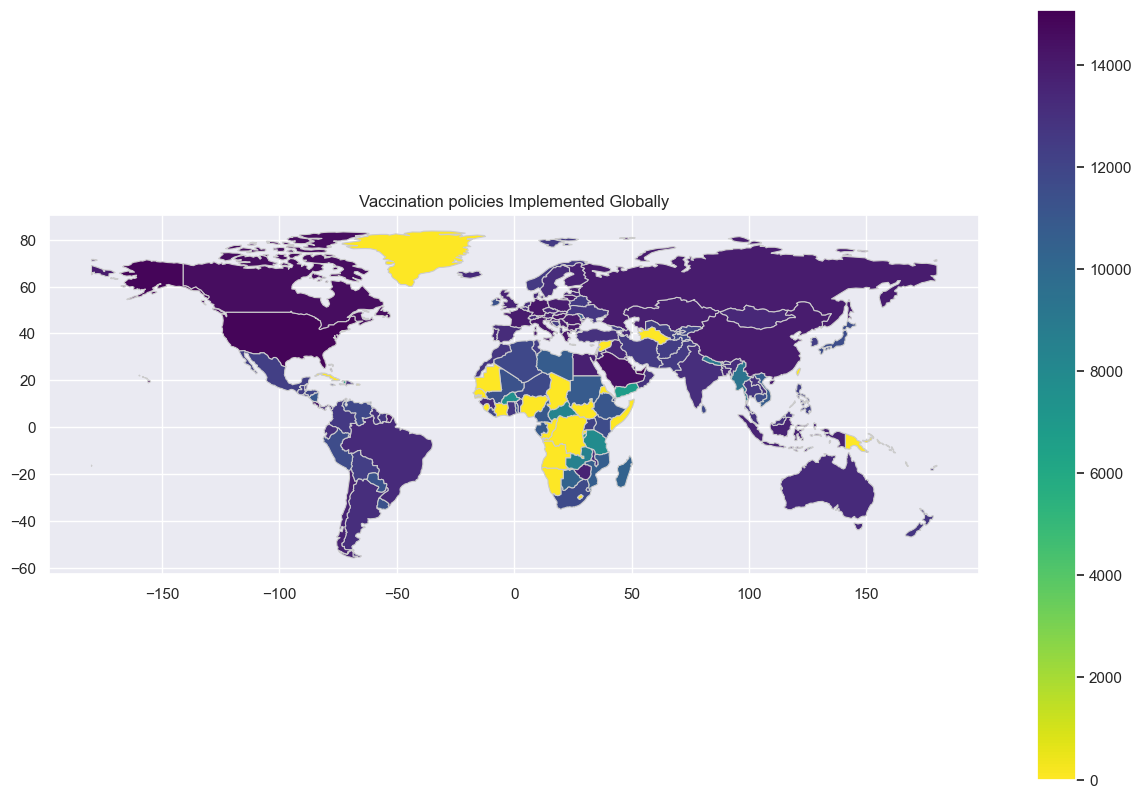

In [91]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)


df2['policy_c'] = df2[containment_policy_columns].sum(axis=1)
df2['policy_e'] = df2[economic_policy_columns].sum(axis=1)
df2['policy_h'] = df2[health_policy_columns].sum(axis=1)
df2['policy_v'] = df2[vaccination_policy_columns].sum(axis=1)

world = world.merge(df2, left_on='iso_a3', right_on='CountryCode')

policy_dict = {
    'c': ['policy_c', 'Containment and closure policies'],
    'e': ['policy_e', 'Economic policies'],
    'h': ['policy_h', 'Health system policies'],
    'v': ['policy_v', 'Vaccination policies']
}

for key, value in policy_dict.items():
  fig, ax = plt.subplots(1, 1, figsize=(15, 10))
  world.plot(column = policy_dict[key][0], cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
  ax.set_title(f'{policy_dict[key][1]} Implemented Globally')
  plt.show()


<Figure size 700x500 with 0 Axes>

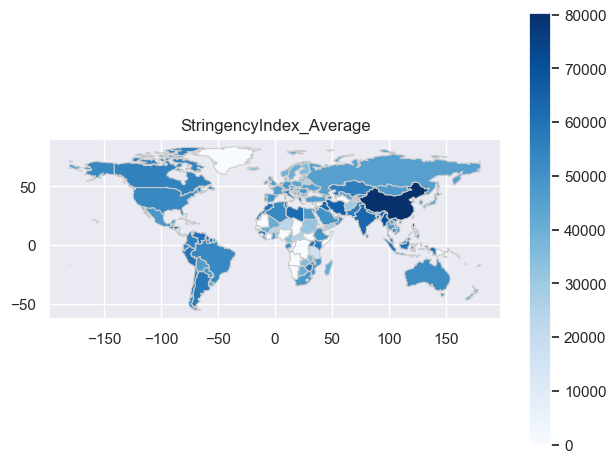

<Figure size 700x500 with 0 Axes>

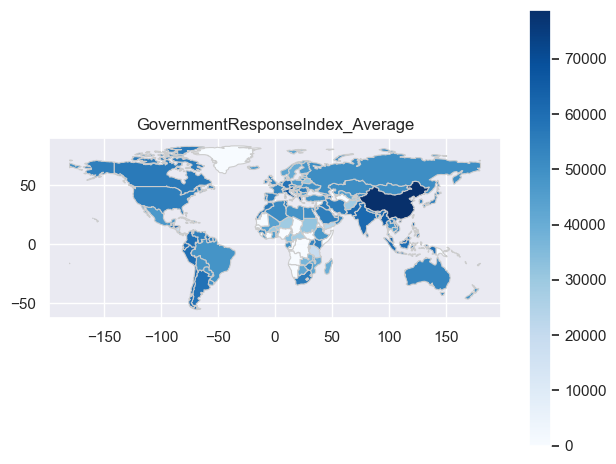

<Figure size 700x500 with 0 Axes>

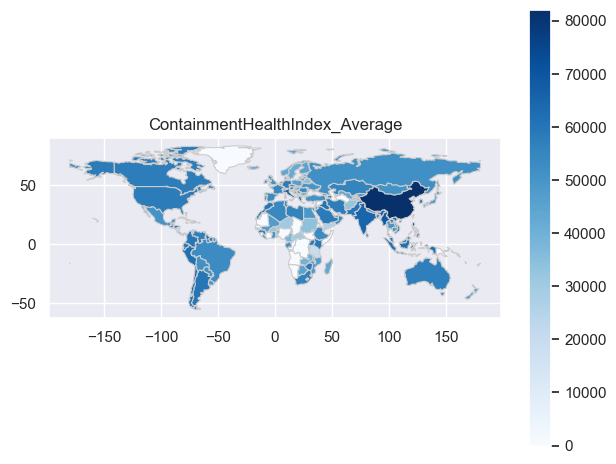

<Figure size 700x500 with 0 Axes>

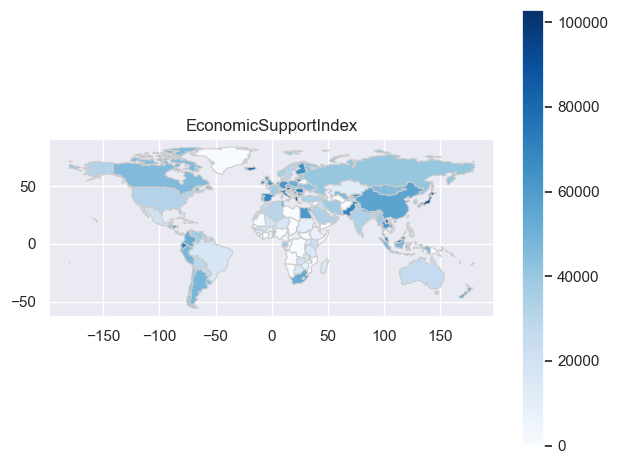

In [90]:
indices = ['StringencyIndex_Average', 'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average', 'EconomicSupportIndex']


for index in indices:
    plt.figure(figsize=(7, 5))
    world.plot(column=index, cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
    plt.title(index)
    plt.tight_layout()
    plt.show()

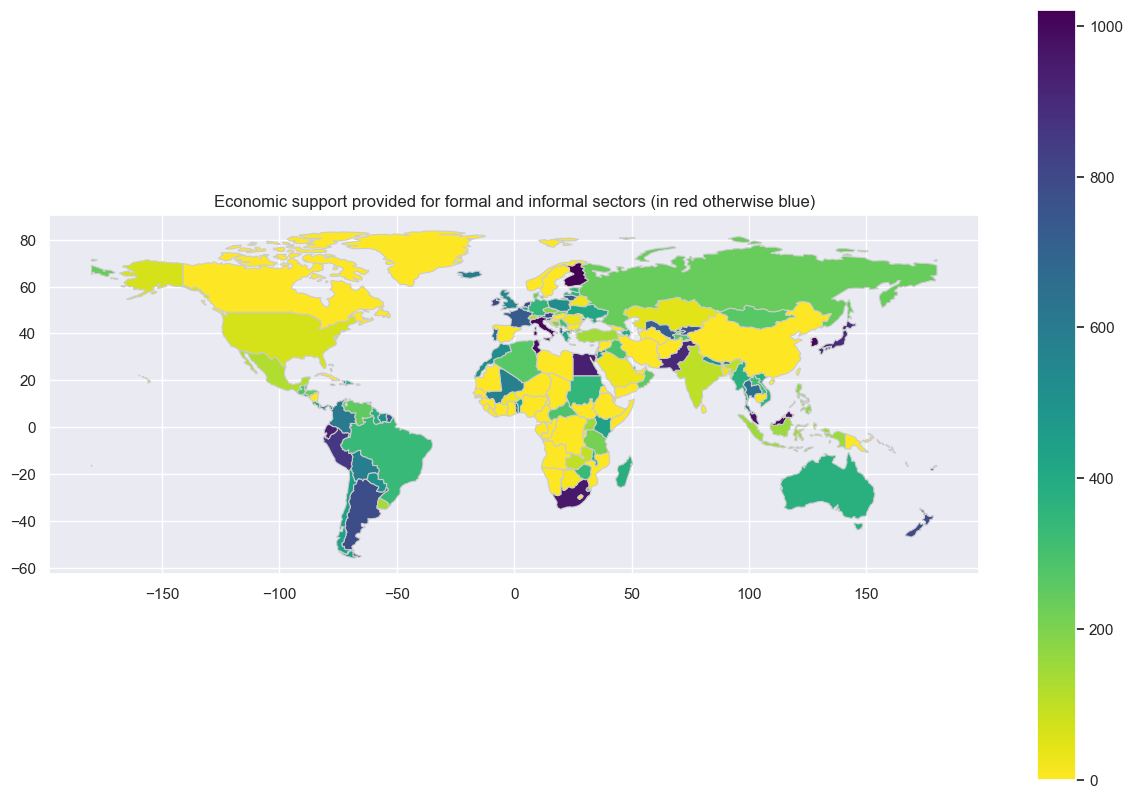

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='E1_Flag', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Economic support provided for formal and informal sectors (in red otherwise blue)')
plt.show()

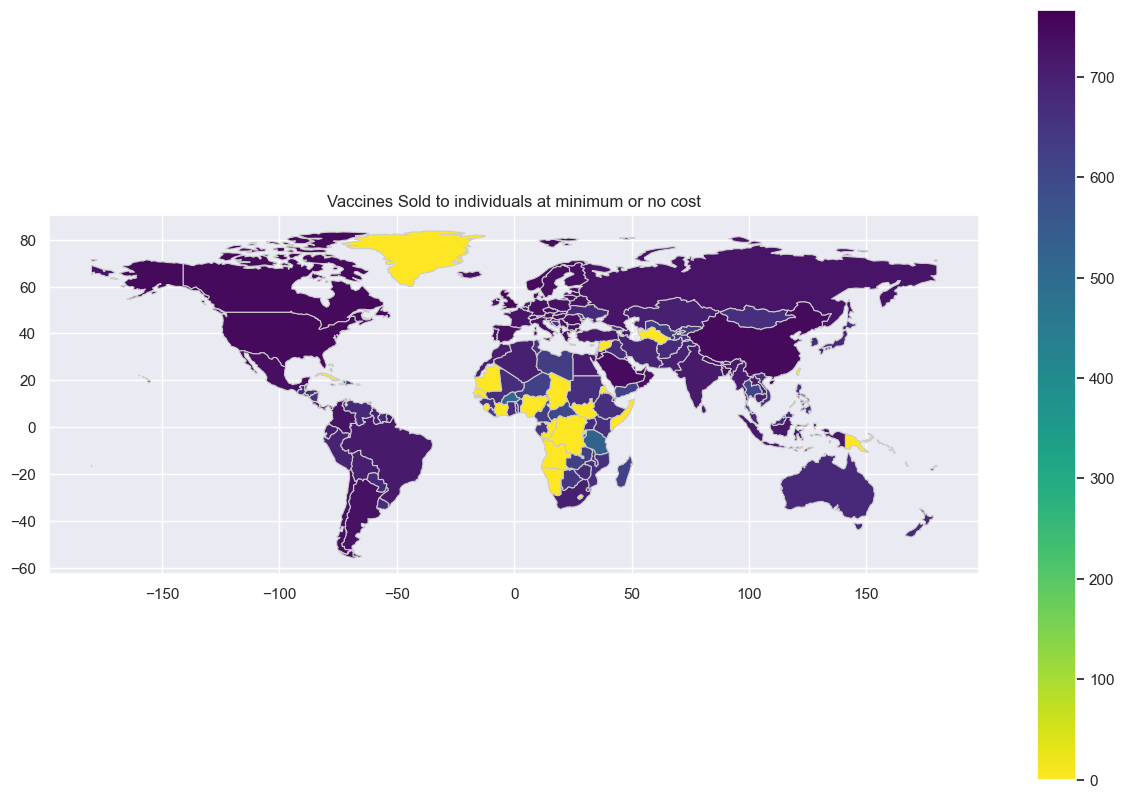

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='H7_Flag', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Vaccines Sold to individuals at minimum or no cost')
plt.show()

## Feature Selection and Engineering

In [200]:
print(df.columns)

Index(['CountryCode', 'Date', 'C1M', 'C1M_Flag', 'C2M', 'C2M_Flag', 'C3M',
       'C3M_Flag', 'C4M', 'C4M_Flag', 'C5M', 'C5M_Flag', 'C6M', 'C6M_Flag',
       'C7M', 'C7M_Flag', 'C8EV', 'E1', 'E1_Flag', 'E2', 'E3', 'E4', 'H1',
       'H1_Flag', 'H2', 'H3', 'H4', 'H5', 'H6M', 'H6M_Flag', 'H7', 'H7_Flag',
       'H8M', 'H8M_Flag', 'V1', 'V2A', 'V2B', 'V2C', 'V2D', 'V2E_Education',
       'V2F', 'V2G', 'V3', 'V4', 'ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated', 'PopulationVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'Population', 'GDP_Per_Capita',
       'Life_Expectancy', 'Hospital_Beds_Per_Thousand', 'Mortality Rate'],
      dtype='object')


* E3, E4, H4, H5, V1, V2, V3, V4 are not represented factored into the average indexes. 
* V2 - categories of people for which vaccination polcies were implmeneted in their countries.
* Too many missing values - E3, E4, H4, V4.
* H5 - investment in public vaccine dev.
* V1 - rollout plan.
* V3 - financial support for vaccination.
* V4 is superficially represented using majority vaccinated. 


In [201]:
features_considered = ['CountryCode', 'Date','ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated','StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'Population', 'GDP_Per_Capita',
       'Life_Expectancy', 'Hospital_Beds_Per_Thousand', 'Mortality Rate', 'H5', 'V1','V3']

In [202]:
requiredDf = df[features_considered]
requiredDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164400 entries, 0 to 164399
Data columns (total 17 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CountryCode                      164400 non-null  category      
 1   Date                             164400 non-null  datetime64[ns]
 2   ConfirmedCases                   164400 non-null  float64       
 3   ConfirmedDeaths                  164400 non-null  float64       
 4   MajorityVaccinated               164400 non-null  category      
 5   StringencyIndex_Average          164400 non-null  float64       
 6   GovernmentResponseIndex_Average  164400 non-null  float64       
 7   ContainmentHealthIndex_Average   164400 non-null  float64       
 8   EconomicSupportIndex             164400 non-null  float64       
 9   Population                       164400 non-null  float64       
 10  GDP_Per_Capita                   164400 non-

In [206]:
requiredDf['CountryCode'].nunique()

150

#### Correlation Matrix

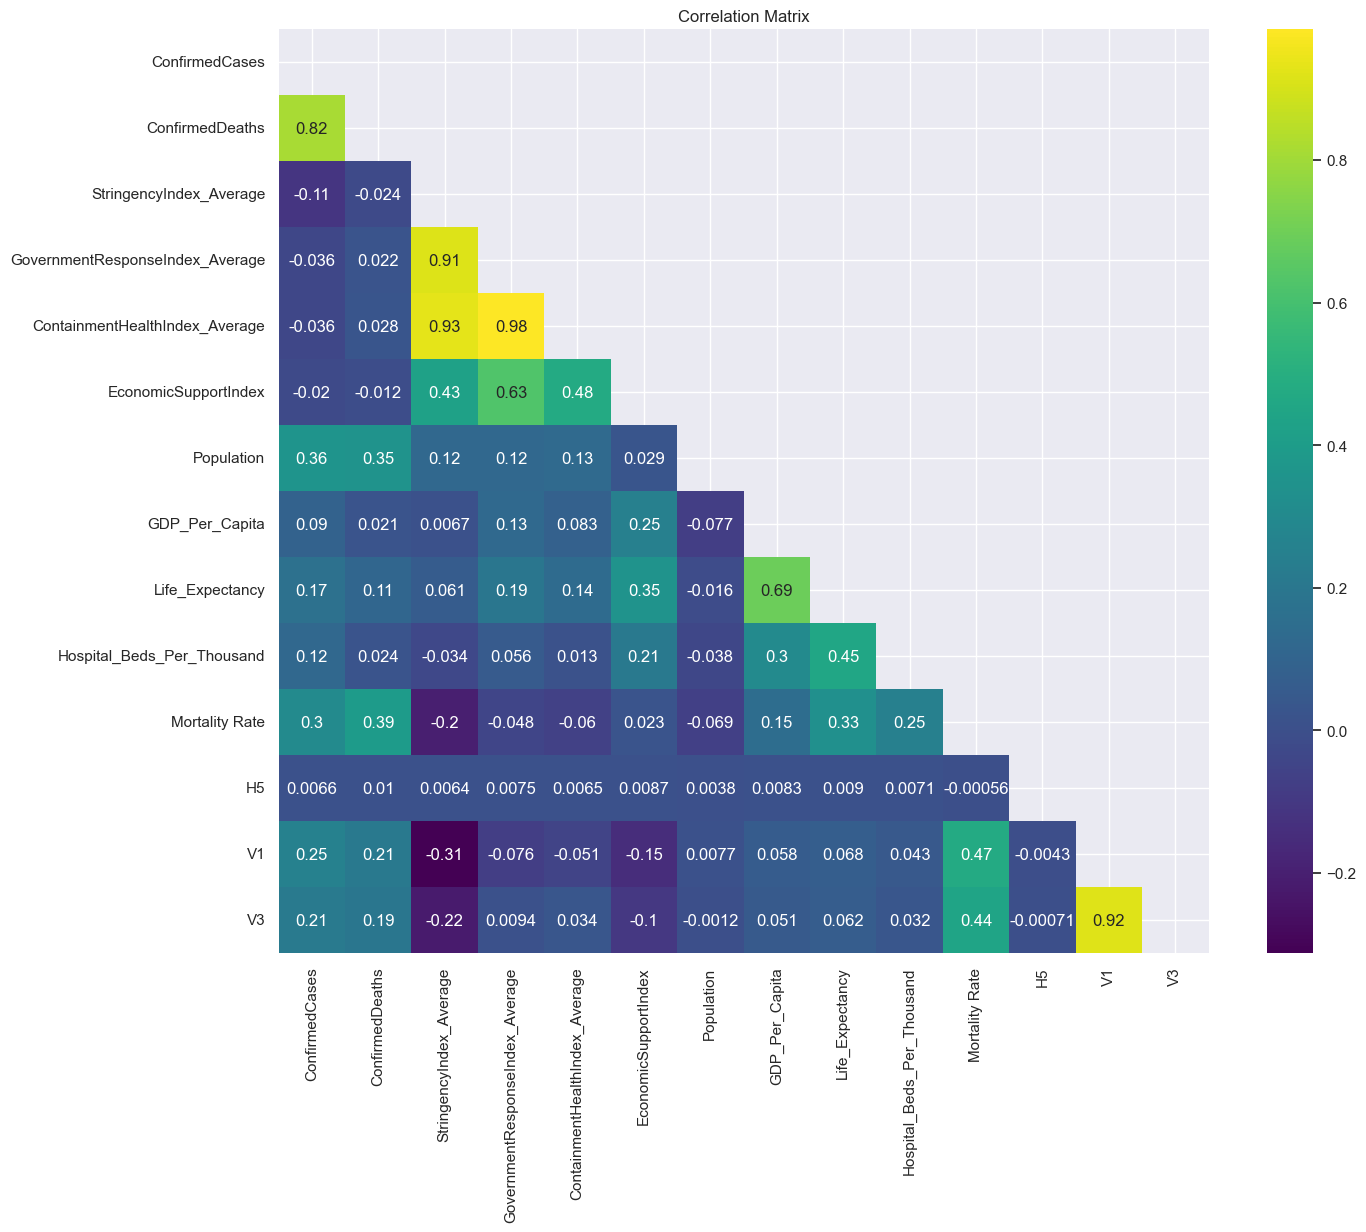

In [161]:
corr_matrix = requiredDf.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='viridis', annot=True) 
plt.title('Correlation Matrix')
plt.show()

In [207]:
print(requiredDf.columns)

Index(['CountryCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'Population', 'GDP_Per_Capita',
       'Life_Expectancy', 'Hospital_Beds_Per_Thousand', 'Mortality Rate', 'H5',
       'V1', 'V3'],
      dtype='object')


In [163]:
print(requiredDf.shape)

(161263, 17)


In [208]:
print(requiredDf['CountryCode'].unique())

['AFG', 'ALB', 'ARE', 'ARG', 'AUS', ..., 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE']
Length: 150
Categories (184, object): ['ABW', 'AFG', 'AGO', 'ALB', ..., 'YEM', 'ZAF', 'ZMB', 'ZWE']


In [209]:
requiredDf['CountryCode'] = requiredDf['CountryCode'].cat.remove_unused_categories()

In [210]:
print(requiredDf['CountryCode'].unique())

['AFG', 'ALB', 'ARE', 'ARG', 'AUS', ..., 'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE']
Length: 150
Categories (150, object): ['AFG', 'ALB', 'ARE', 'ARG', ..., 'YEM', 'ZAF', 'ZMB', 'ZWE']


In [213]:
rows_with_missing = requiredDf[requiredDf['H5'].isna()]
missing_country_codes = rows_with_missing['CountryCode']
print(missing_country_codes.unique())

['ALB', 'ARE', 'ARG', 'AUT', 'AZE', ..., 'URY', 'USA', 'UZB', 'ZAF', 'ZWE']
Length: 60
Categories (150, object): ['AFG', 'ALB', 'ARE', 'ARG', ..., 'YEM', 'ZAF', 'ZMB', 'ZWE']


In [214]:
requiredDf.sort_values('Date', inplace=True)
requiredDf.head(20)


CountryCode       Date  ConfirmedCases  ConfirmedDeaths  \
0              AFG 2020-01-01             0.0              0.0   
20824          BRA 2020-01-01             0.0              0.0   
111792         NLD 2020-01-01             0.0              0.0   
161112         ZAF 2020-01-01             0.0              0.0   
112888         NOR 2020-01-01             0.0              0.0   
19728          BOL 2020-01-01             0.0              0.0   
113984         NPL 2020-01-01             0.0              0.0   
110696         NIC 2020-01-01             0.0              0.0   
18632          BLZ 2020-01-01             0.0              0.0   
17536          BLR 2020-01-01             0.0              0.0   
116176         OMN 2020-01-01             0.0              0.0   
145768         TLS 2020-01-01             0.0              0.0   
117272         PAK 2020-01-01             0.0              0.0   
16440          BIH 2020-01-01             0.0              0.0   
118368         PAN 2020-01-01             0.0              0.0   
115080         NZL 2020-01-01             0.0              0.0   
146864         TON 2020-01-01             0.0              0.0   
21920          BRB 2020-01-01             0.0              0.0   
109600         NER 2020-01-01             0.0              0.0   
100832         MLI 2020-01-01             0.0              0.0   

       MajorityVaccinated  StringencyIndex_Average  \
0                      NV                      0.0   
20824                  NV                      0.0   
111792                 NV                      0.0   
161112                 NV                      0.0   
112888                 NV                      0.0   
19728                  NV                      0.0   
113984                 NV                      0.0   
110696                 NV                      0.0   
18632                  NV                      0.0   
17536                  NV                      0.0   
116176                 NV                      0.0   
145768                 NV                      0.0   
117272                 NV                      0.0   
16440                  NV                      0.0   
118368                 NV                      0.0   
115080                 NV                      0.0   
146864                 NV                      0.0   
21920                  NV                      0.0   
109600                 NV                      0.0   
100832                 NV                      0.0   

        GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
0                                  0.00                            0.00   
20824                              0.00                            0.00   
111792                             0.00                            0.00   
161112                             0.00                            0.00   
112888                             0.00                            0.00   
19728                              4.17                            4.76   
113984                             0.00                            0.00   
110696                             0.00                            0.00   
18632                              0.00                            0.00   
17536                              0.00                            0.00   
116176                             0.00                            0.00   
145768                             0.00                            0.00   
117272                             0.00                            0.00   
16440                              0.00                            0.00   
118368                             0.00                            0.00   
115080                             0.00                            0.00   
146864                             0.00                            0.00   
21920                              0.00                            0.00   
109600                             0.00                     

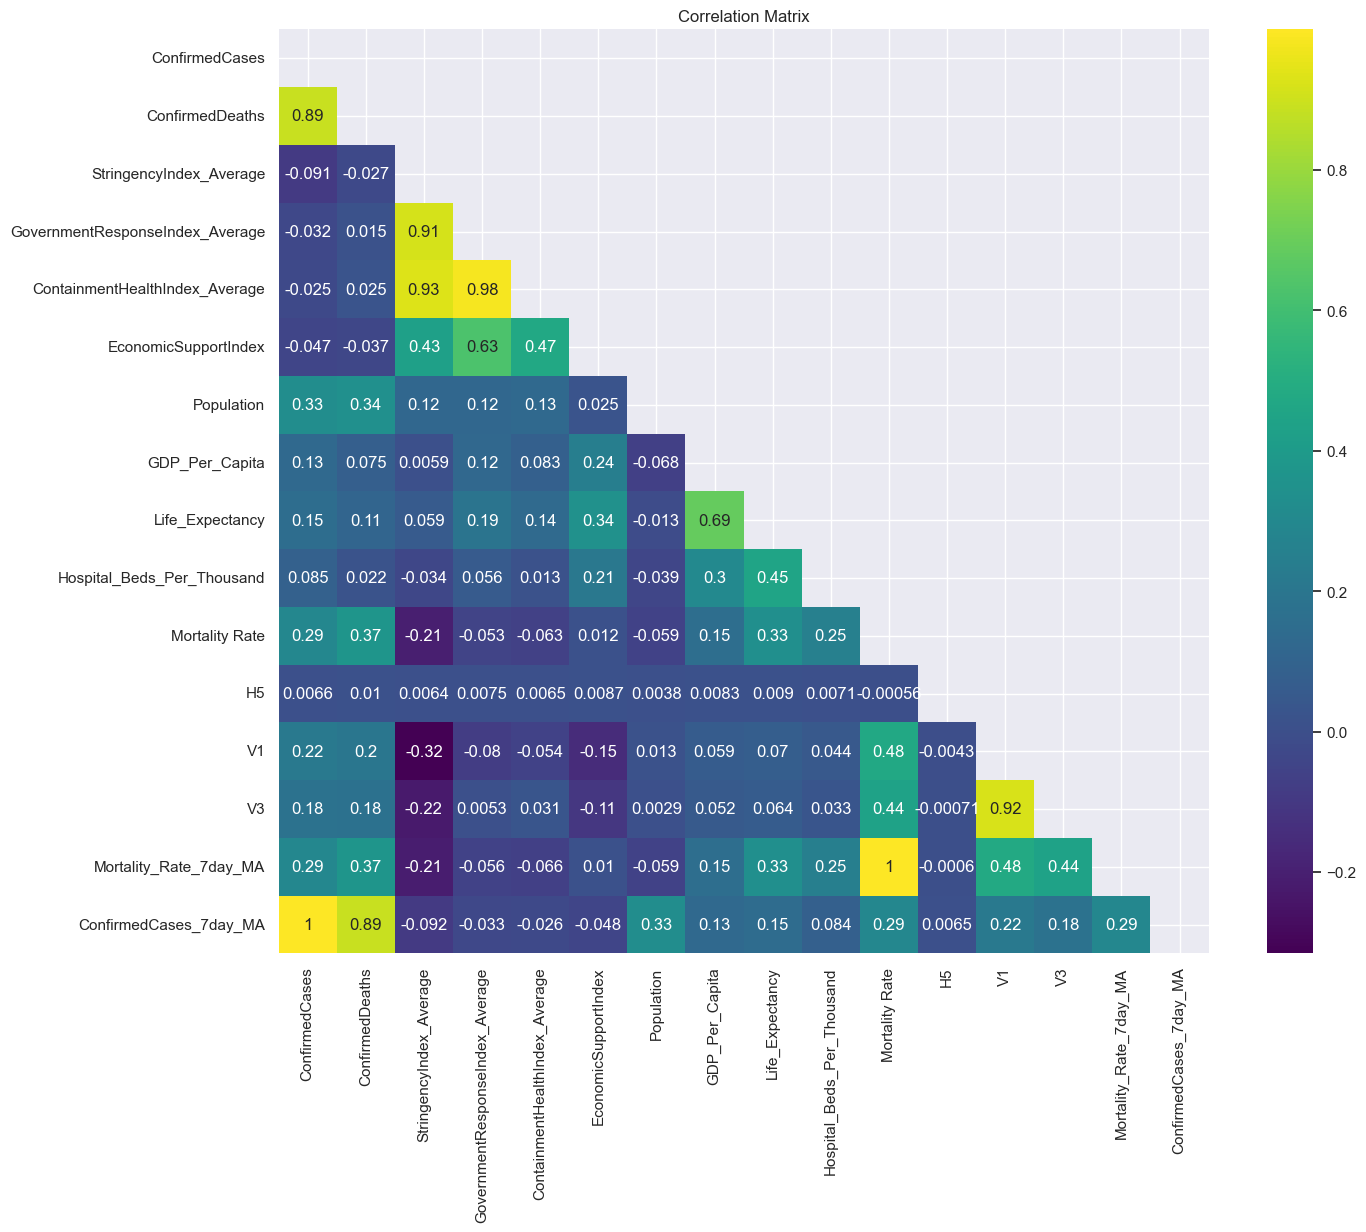

In [215]:
requiredDf['Mortality_Rate_7day_MA'] = requiredDf.groupby(['CountryCode'])['Mortality Rate'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)
requiredDf['ConfirmedCases_7day_MA'] = requiredDf.groupby(['CountryCode'])['ConfirmedCases'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)

corr_matrix = requiredDf.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='viridis', annot=True) 
plt.title('Correlation Matrix')
plt.show()

In [216]:
requiredDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164400 entries, 0 to 164399
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   CountryCode                      164400 non-null  category      
 1   Date                             164400 non-null  datetime64[ns]
 2   ConfirmedCases                   164400 non-null  float64       
 3   ConfirmedDeaths                  164400 non-null  float64       
 4   MajorityVaccinated               164400 non-null  category      
 5   StringencyIndex_Average          164400 non-null  float64       
 6   GovernmentResponseIndex_Average  164400 non-null  float64       
 7   ContainmentHealthIndex_Average   164400 non-null  float64       
 8   EconomicSupportIndex             164400 non-null  float64       
 9   Population                       164400 non-null  float64       
 10  GDP_Per_Capita                   164400 non-null 

In [217]:
requiredDf.to_csv('../Datasets/CleanedDS.csv', index=False)

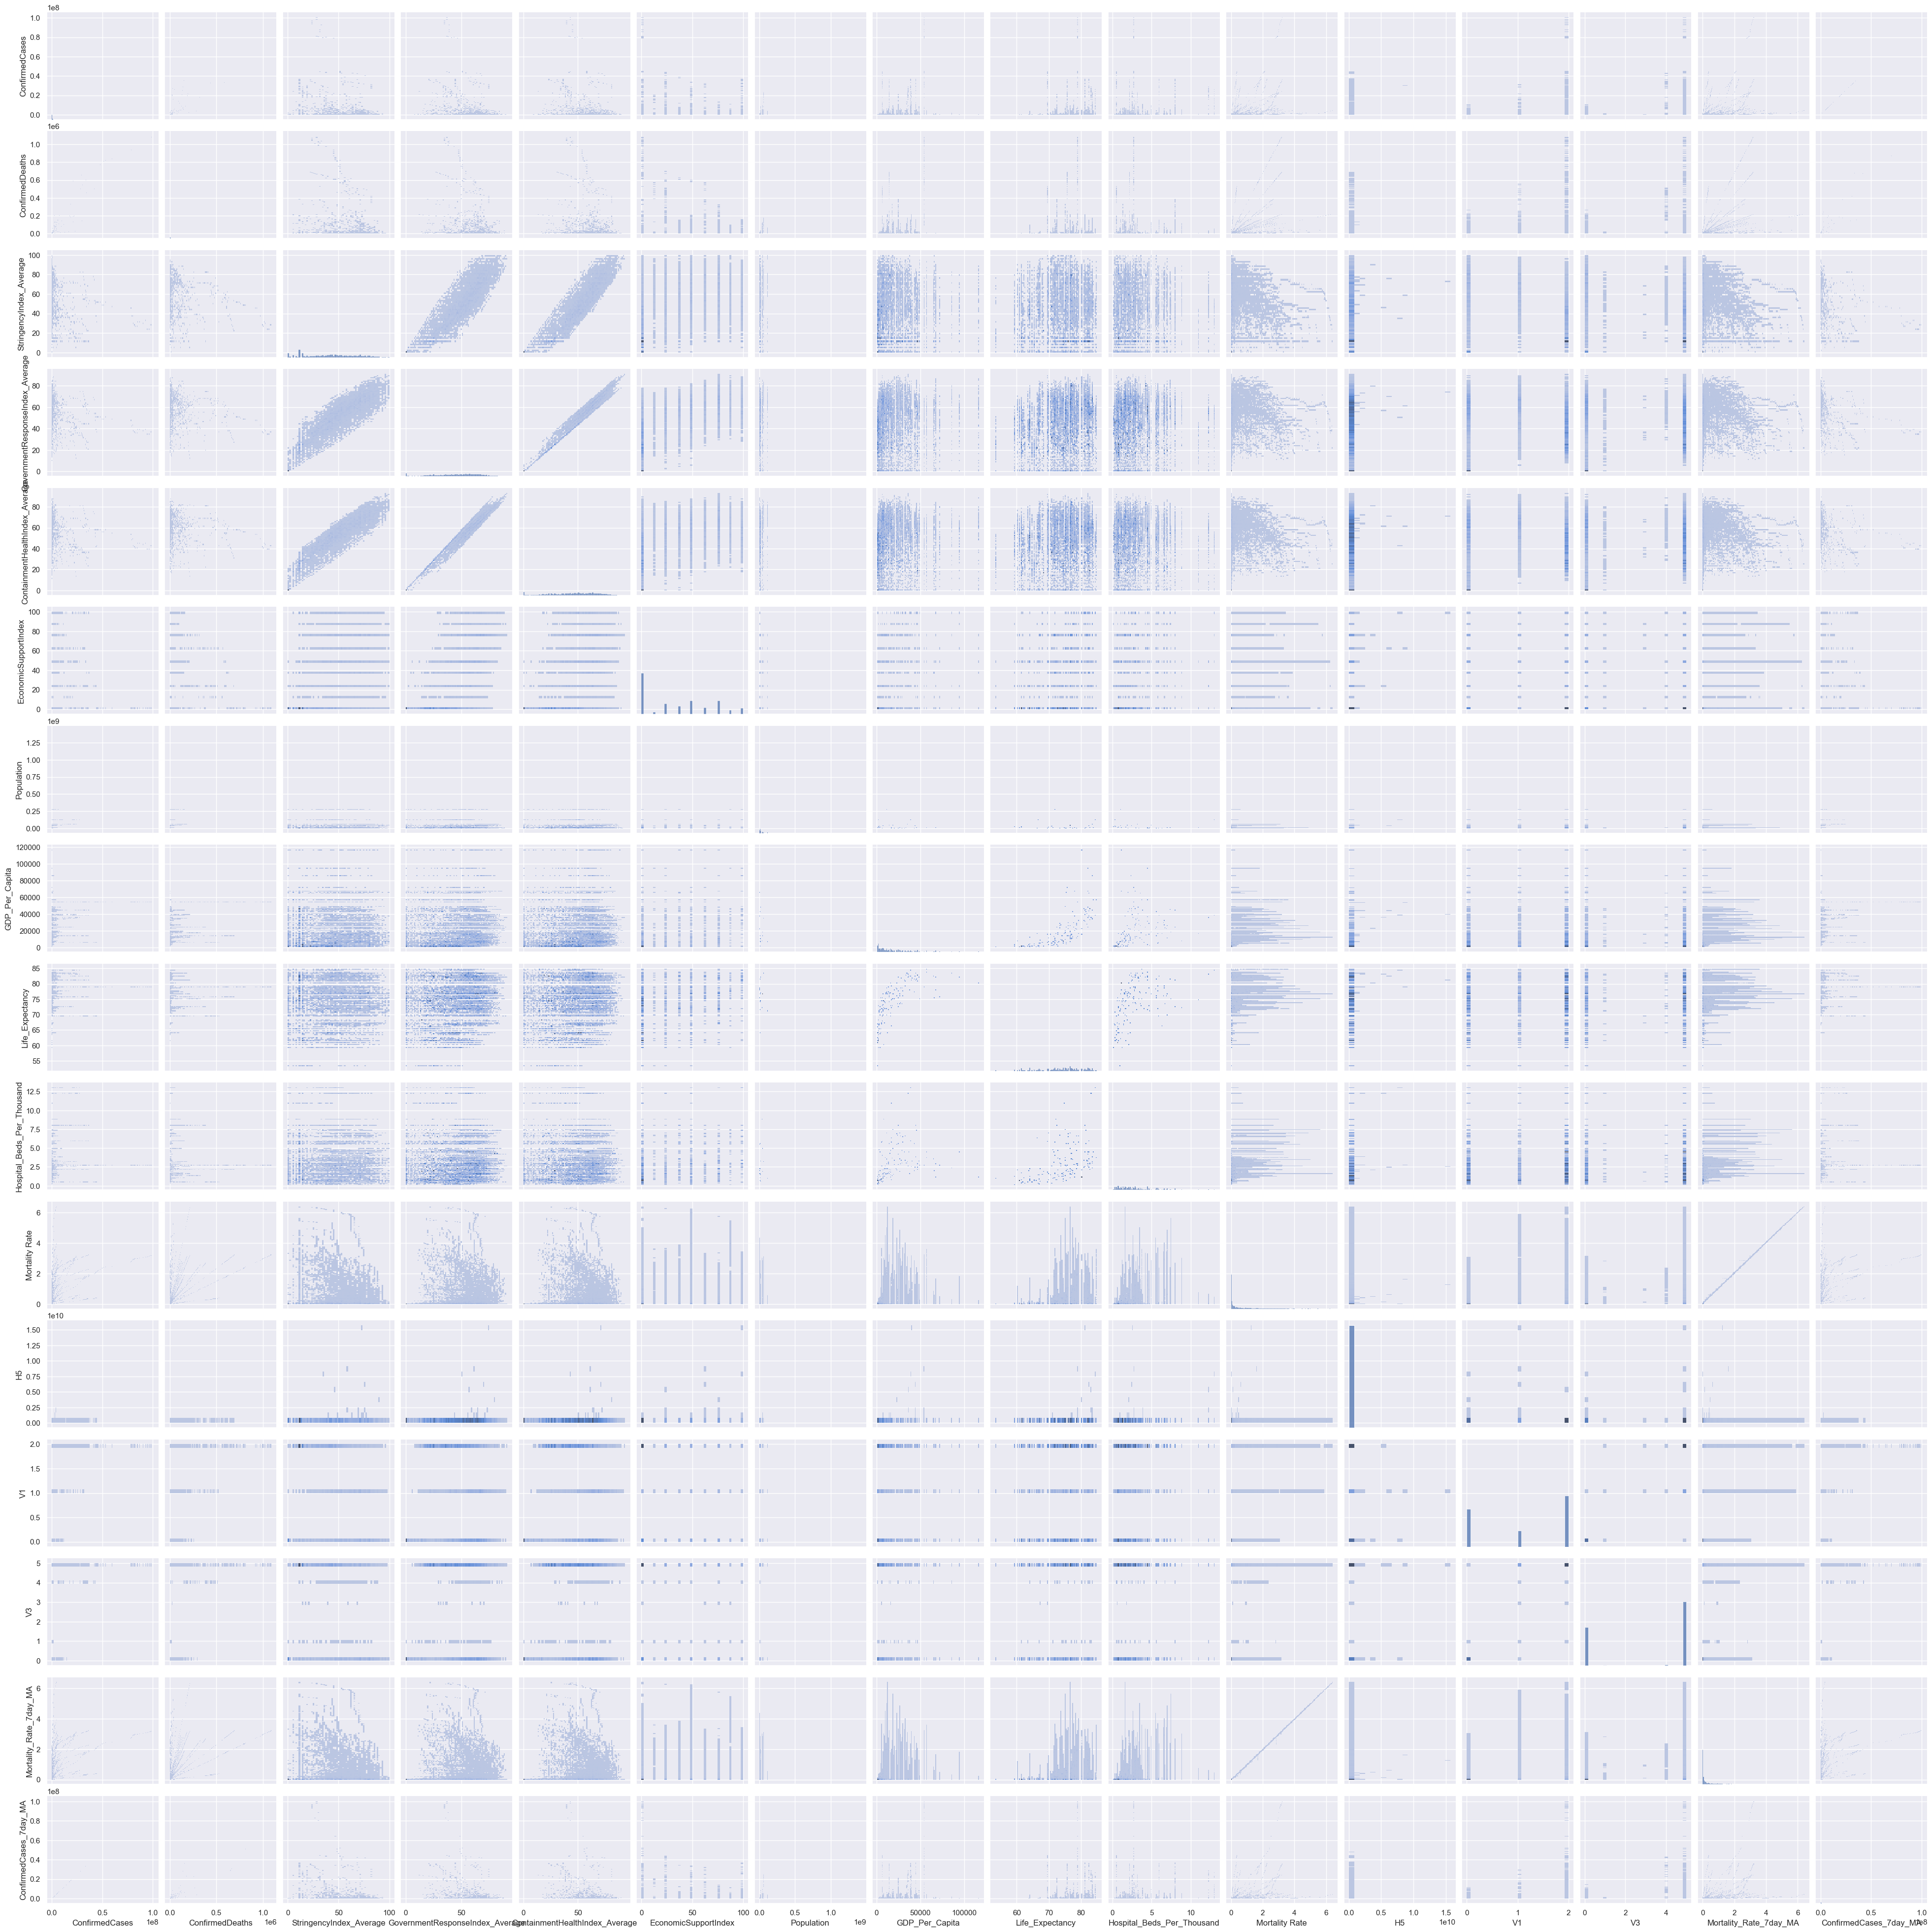

In [218]:
sns.pairplot(requiredDf, kind='hist')

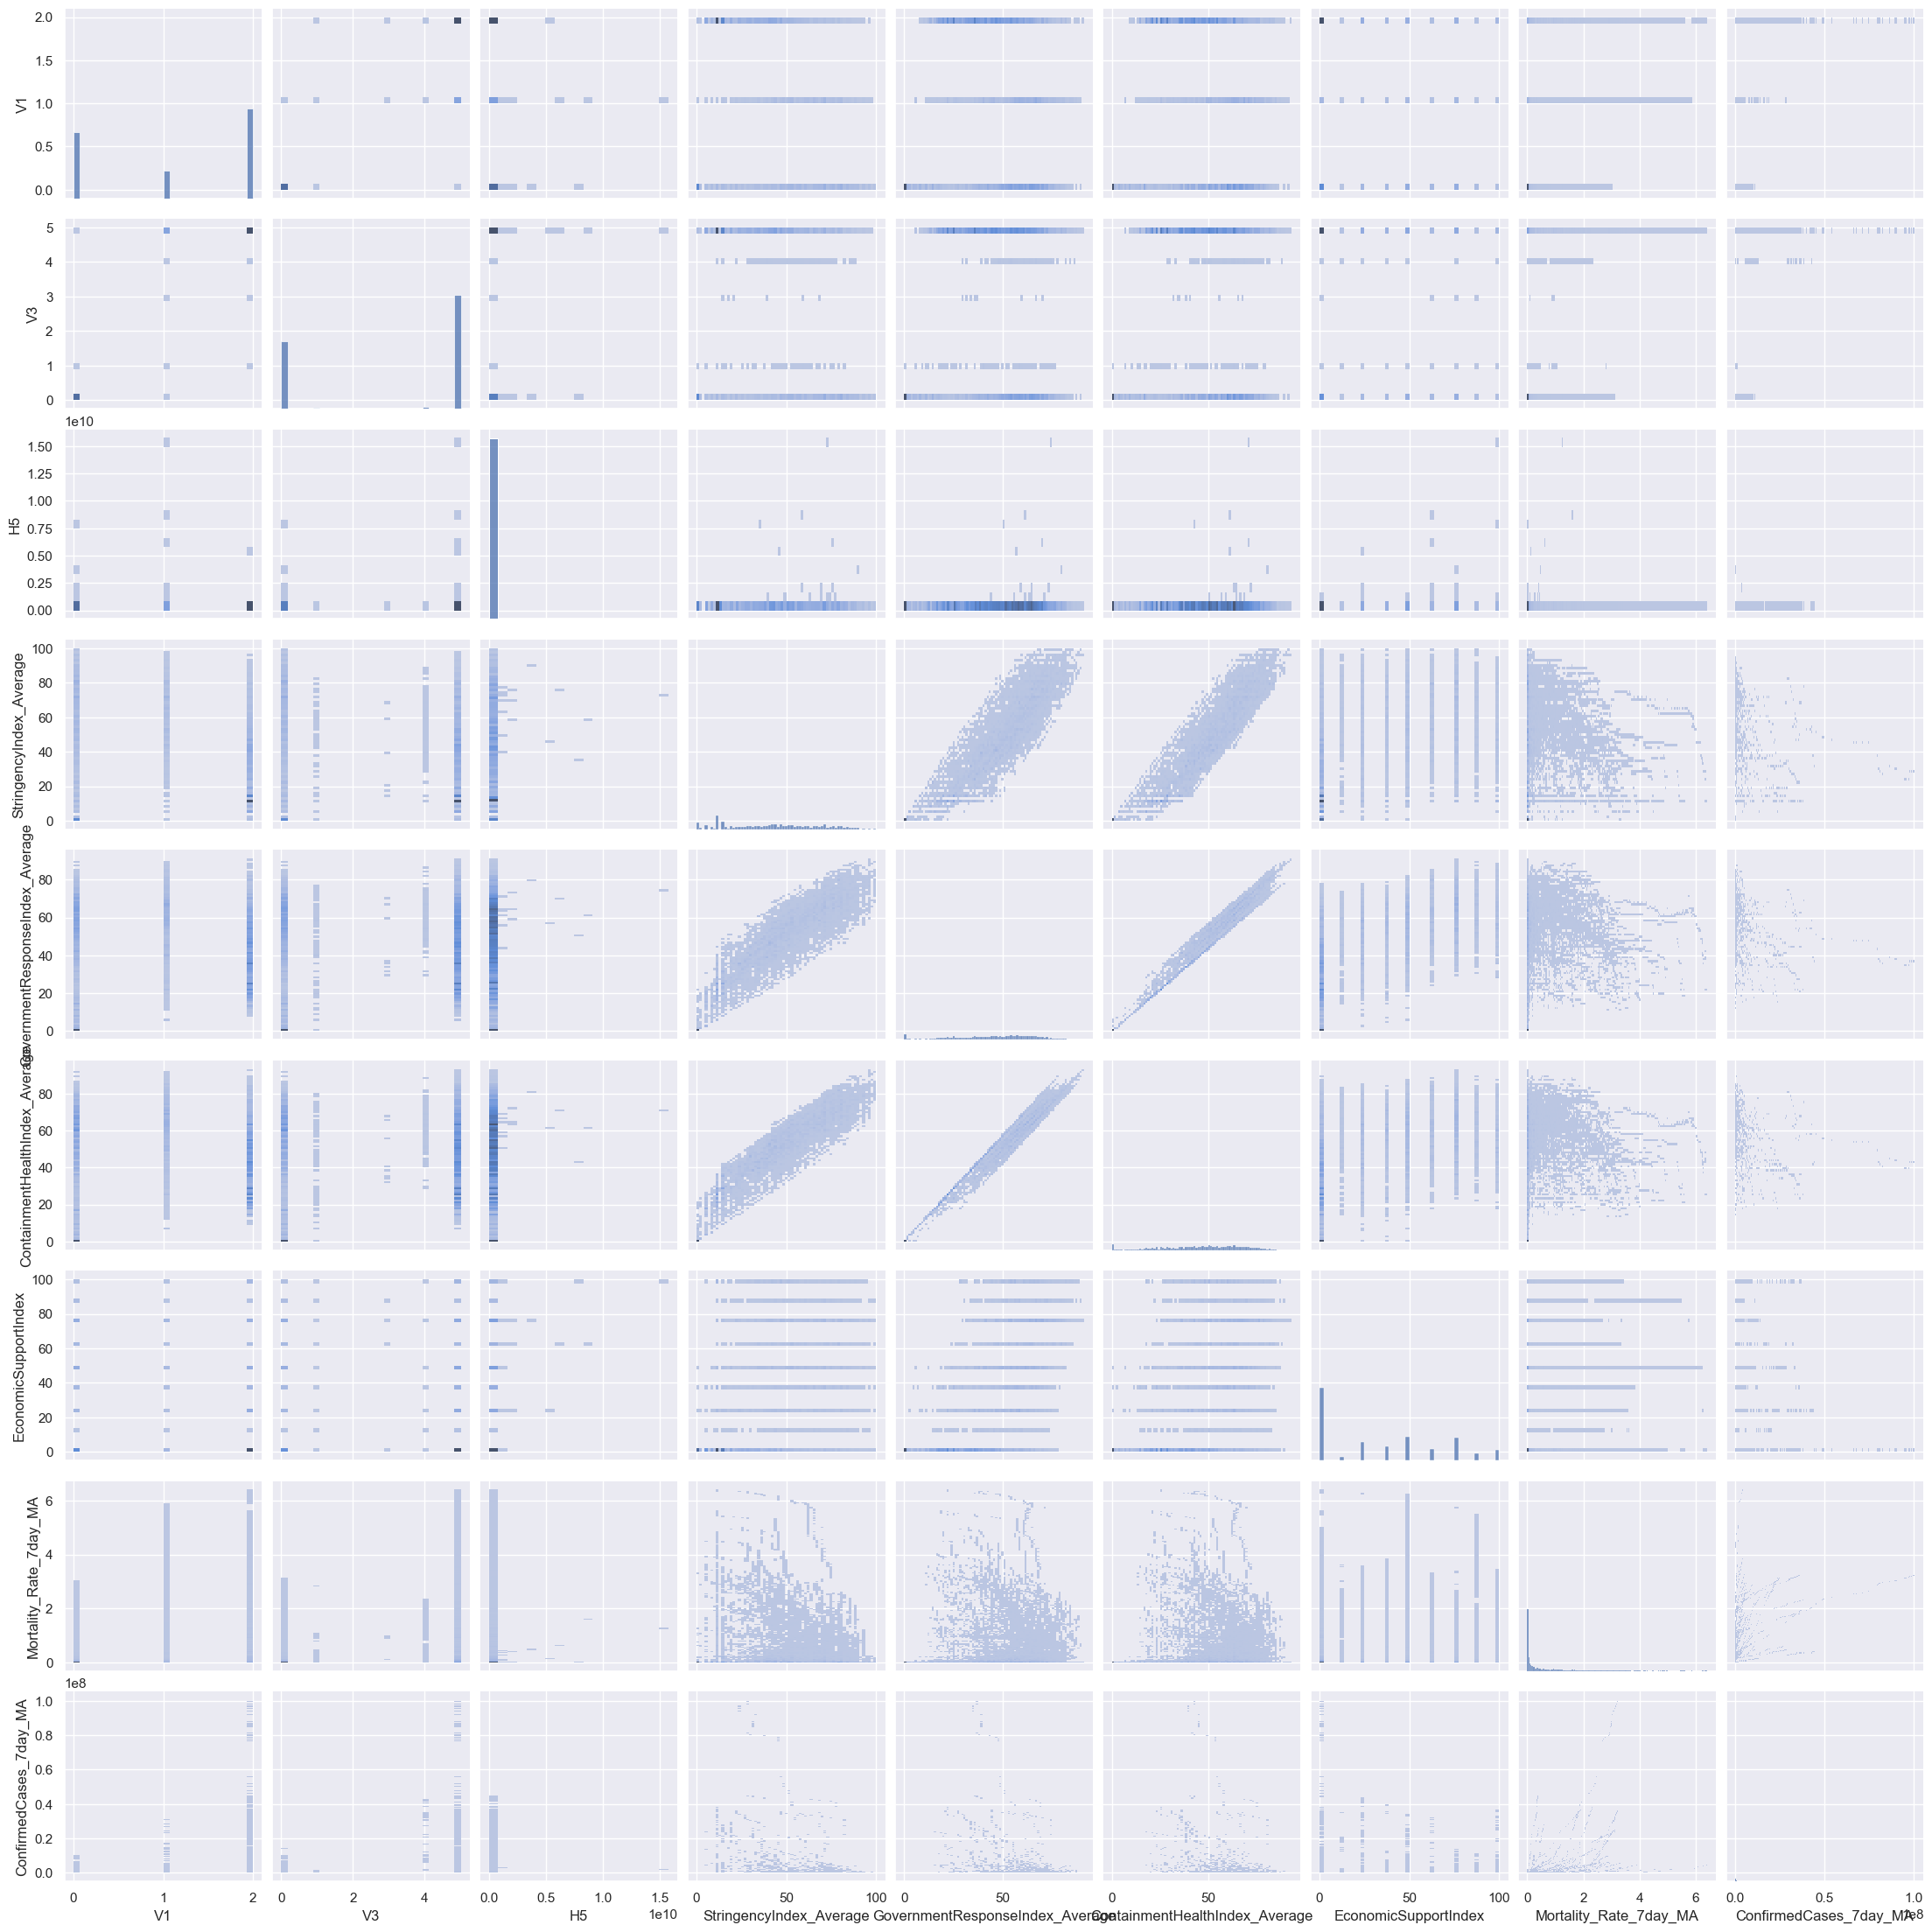

In [219]:
sns.pairplot(requiredDf, kind='hist' ,vars=['V1', 'V3', 'H5', 'StringencyIndex_Average', 'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average', 'EconomicSupportIndex', 'Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA'])



In [220]:
requiredDf.groupby(['CountryCode'])[['V1','V3']].agg(pd.Series.mode)

V1  V3
CountryCode        
AFG           2   5
ALB           2   5
ARE           2   5
ARG           2   5
AUS           2   5
...          ..  ..
VNM           0   5
YEM           1   5
ZAF           2   5
ZMB           0   5
ZWE           2   5

[150 rows x 2 columns]

In [221]:
requiredDf.drop(columns=['Date'], inplace=True, axis=1)

In [222]:
agg_df = requiredDf.groupby('CountryCode').agg({   
    'Population': 'mean',
    'GDP_Per_Capita': 'mean',
    'Hospital_Beds_Per_Thousand': 'mean',
    'Life_Expectancy': 'mean',
    'StringencyIndex_Average': 'mean',
    'GovernmentResponseIndex_Average': 'mean',
    'ContainmentHealthIndex_Average': 'mean',
    'EconomicSupportIndex': 'mean',
    'Mortality Rate': 'mean',
    'H5': 'sum',
    'V1': pd.Series.mode,
    'V3': pd.Series.mode,
    'ConfirmedCases': 'sum',
    'ConfirmedDeaths': 'sum'
})

In [223]:
indices = ['StringencyIndex_Average', 'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average', 'EconomicSupportIndex']

extreme_countries = pd.DataFrame(columns=['Min_Country', 'Max_Country'], index=indices)

# Find min and max countries for each index
for index in indices:
    min_country = agg_df[index].idxmin()
    max_country = agg_df[index].idxmax()
    extreme_countries.loc[index, 'Min_Country'] = min_country
    extreme_countries.loc[index, 'Max_Country'] = max_country

# Display the result
print(extreme_countries)

                                Min_Country Max_Country
StringencyIndex_Average                 NIC         CHN
GovernmentResponseIndex_Average         NIC         CHN
ContainmentHealthIndex_Average          TZA         CHN
EconomicSupportIndex                    LBY         CYP


In [224]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Apply discretizer and create categorical combinations
for index in indices:
    agg_df[f'{index}_Category'] = discretizer.fit_transform(agg_df[[index]]).astype(int)

# Create a unique category identifier combining both indices
agg_df['Combined_Category'] = agg_df.apply(lambda x: f'SI{x["StringencyIndex_Average_Category"]}_GI{x["GovernmentResponseIndex_Average_Category"]}_CI{x["ContainmentHealthIndex_Average_Category"]}_EI{x["EconomicSupportIndex_Category"]}', axis=1)



In [225]:
agg_df

Population  GDP_Per_Capita  Hospital_Beds_Per_Thousand  \
CountryCode                                                           
AFG          41128772.0        1803.987                        0.50   
ALB           2842318.0       11803.431                        2.89   
ARE           9441138.0       67293.483                        1.20   
ARG          45510324.0       18933.907                        5.00   
AUS          26177410.0       44648.710                        3.84   
...                 ...             ...                         ...   
VNM          98186856.0        6171.884                        2.60   
YEM          33696612.0        1479.147                        0.70   
ZAF          59893884.0       12294.876                        2.32   
ZMB          20017670.0        3689.251                        2.00   
ZWE          16320539.0        1899.775                        1.70   

             Life_Expectancy  StringencyIndex_Average  \
CountryCode                                             
AFG                    64.83                27.394580   
ALB                    78.57                41.782108   
ARE                    77.97                44.236423   
ARG                    76.67                52.429097   
AUS                    83.44                47.197026   
...                      ...                      ...   
VNM                    75.40                54.682801   
YEM                    66.12                25.444097   
ZAF                    64.13                43.855292   
ZMB                    63.89                31.791533   
ZWE                    61.49                53.751405   

             GovernmentResponseIndex_Average  ContainmentHealthIndex_Average  \
CountryCode                                                                    
AFG                                26.088869                       29.713878   
ALB                                44.866277                       46.193239   
ARE                                48.785502                       52.141889   
ARG                                53.550757                       54.905547   
AUS                                48.600128                       52.189498   
...                                      ...                             ...   
VNM                                52.780776                       57.801870   
YEM                                20.958914                       23.954507   
ZAF                                50.916214                       51.304115   
ZMB                                33.798002                       36.022792   
ZWE                                48.025903                       53.817518   

             EconomicSupportIndex  Mortality Rate            H5  V1  V3  \
CountryCode                                                               
AFG                      0.707117        0.108384  1.130000e+08   2   5   
ALB                     35.583942        0.719323  6.900000e+06   2   5   
ARE                     25.296533        0.151440  5.000000e+06   2   5   
ARG                     44.069343        1.647406  1.000000e+08   2   5   
AUS                     23.471715        0.150883  4.703230e+09   2   5   
...                           ...             ...           ...  ..  ..   
VNM                     17.632299        0.169810  5.396600e+04   0   5   
YEM                      0.000000        0.037059  2.800000e+06   1   5   
ZAF                     48.197993        0.975800  4.800000e+08   2   5   
ZMB                     18.225365        0.107418  0.000000e+00   0   5   
ZWE                      7.481752        0.171984  1.000000e+08   2   5   

             ConfirmedCases  ConfirmedDeaths  \
CountryCode                                    
AFG            1.158037e+08        4885625.0   
ALB            1.628384e+08        2240822.0   
ARE            5.821679e+08        1567028.0   
ARG            4.943786e+09       82171480.0   
AUS            2.740590e+09        4328901

In [226]:
agg_df.to_csv('../Datasets/DtDs.csv')

In [227]:
print(agg_df['GovernmentResponseIndex_Average_Category'].value_counts())

GovernmentResponseIndex_Average_Category
0    30
2    30
3    30
4    30
1    30
Name: count, dtype: int64


In [228]:
print(agg_df['StringencyIndex_Average_Category'].value_counts())

StringencyIndex_Average_Category
0    30
1    30
2    30
4    30
3    30
Name: count, dtype: int64


In [229]:
print(agg_df['ContainmentHealthIndex_Average_Category'].value_counts())

ContainmentHealthIndex_Average_Category
0    30
1    30
3    30
4    30
2    30
Name: count, dtype: int64


In [230]:
print(agg_df['EconomicSupportIndex_Category'].value_counts())

EconomicSupportIndex_Category
0    30
2    30
1    30
3    30
4    30
Name: count, dtype: int64


In [231]:
agg_df.loc['CHN']

Population                                             1425887360.0
GDP_Per_Capita                                            15308.712
Hospital_Beds_Per_Thousand                                     4.34
Life_Expectancy                                               76.91
StringencyIndex_Average                                   73.313212
GovernmentResponseIndex_Average                           71.922755
ContainmentHealthIndex_Average                            74.880119
EconomicSupportIndex                                      51.220347
Mortality Rate                                             0.003273
H5                                                              0.0
V1                                                                2
V3                                                                5
ConfirmedCases                                          359689491.0
ConfirmedDeaths                                           5114665.0
StringencyIndex_Average_Category                

In [232]:
# Display the new data frame structure
print(agg_df[['Combined_Category']].head(10))

                   Combined_Category
CountryCode                         
AFG          SI0.0_GI0.0_CI0.0_EI0.0
ALB          SI1.0_GI2.0_CI1.0_EI2.0
ARE          SI2.0_GI3.0_CI3.0_EI1.0
ARG          SI4.0_GI4.0_CI4.0_EI3.0
AUS          SI3.0_GI2.0_CI3.0_EI1.0
AUT          SI3.0_GI4.0_CI4.0_EI4.0
AZE          SI4.0_GI4.0_CI4.0_EI1.0
BDI          SI0.0_GI0.0_CI0.0_EI0.0
BEL          SI1.0_GI3.0_CI2.0_EI3.0
BEN          SI0.0_GI0.0_CI0.0_EI2.0
